## CREDIT EDA FOR RISK ANALYSIS IN BANK AND FINANCIAL SERVICES

In [1]:
# importing all the necessary libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Analysis of Application Data

In [2]:
# importing the application data
data = pd.read_csv("file:///C:/Users/lenovo/Downloads/.ipynb_checkpoints/application_data.csv")
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

#### Checking the basic structure of data like the size of the dataset, datatypes of the all the columns and information of data understanding the numerical columns and categorical columns

In [3]:
# Checking the shape of data
data.shape

(307511, 122)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# this code will desplay all the rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


In [6]:
# checking for null values if any in the columns
data.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
# checking the percentage of null values in each and every column
(data.isnull().sum()/data.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
# It Shows all columns whose data type is integer.
data.describe().T

count           mean            std  \
SK_ID_CURR                    307511.0  278180.518577  102790.175348   
TARGET                        307511.0       0.080729       0.272419   
CNT_CHILDREN                  307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL              307511.0  168797.919297  237123.146279   
AMT_CREDIT                    307511.0  599025.999706  402490.776996   
AMT_ANNUITY                   307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE               307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE    307511.0       0.020868       0.013831   
DAYS_BIRTH                    307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                 307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION             307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH               307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                   104582.0      12.061091      11.944812   
FLAG_MOBIL                    307511.0       0.999997       0.001803   
FLAG_EMP_PHONE                307511.0       0.819889       0.384280   
FLAG_WORK_PHONE               307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE              307511.0       0.998133       0.043164   
FLAG_PHONE                    307511.0       0.281066       0.449521   
FLAG_EMAIL                    307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS               307509.0       2.152665       0.910682   
REGION_RATING_CLIENT          307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY   307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START       307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION    307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION    307511.0       0.050769       0.219526   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.040659       0.197499   
REG_CITY_NOT_LIVE_CITY        307511.0       0.078173       0.268444   
REG_CITY_NOT_WORK_CITY        307511.0       0.230454       0.421124   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.179555       0.383817   
EXT_SOURCE_1                  134133.0       0.502130       0.211062   
EXT_SOURCE_2                  306851.0       0.514393       0.191060   
EXT_SOURCE_3                  246546.0       0.510853       0.194844   
APARTMENTS_AVG                151450.0       0.117440       0.108240   
BASEMENTAREA_AVG              127568.0       0.088442       0.082438   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.977735       0.059223   
YEARS_BUILD_AVG               103023.0       0.752471       0.113280   
COMMONAREA_AVG                 92646.0       0.044621       0.076036   
ELEVATORS_AVG                 143620.0       0.078942       0.134576   
ENTRANCES_AVG                 152683.0       0.149725       0.100049   
FLOORSMAX_AVG                 154491.0       0.226282       0.144641   
FLOORSMIN_AVG                  98869.0       0.231894       0.161380   
LANDAREA_AVG                  124921.0       0.066333       0.081184   
LIVINGAPARTMENTS_AVG           97312.0       0.100775       0.092576   
LIVINGAREA_AVG                153161.0       0.107399       0.110565   
NONLIVINGAPARTMENTS_AVG        93997.0       0.008809       0.047732   
NONLIVINGAREA_AVG             137829.0       0.028358       0.069523   
APARTMENTS_MODE               151450.0       0.114231       0.107936   
BASEMENTAREA_MODE             127568.0       0.087543       0.084307   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.977065       0.064575   
YEARS_BUILD_MODE              103023.0       0.759637       0.110111   
COMMONAREA_MODE                92646.0       0.042553       0.074445   
ELEVATORS_MODE                143620.0       0.074490       0.132256   
ENTRANCES_MODE                152683.0       0.145193       0.100977   
FLOORSMAX_MODE                154491.0       0.222315       0.143709   
FLOORSMIN_MODE                 98869.0       0.228058       0.161160   
L

# Cleaning the datasets
### Handling the null values 
#### dropping the column more than 45% of null values


In [9]:
data.drop(["TOTALAREA_MODE", "WALLSMATERIAL_MODE", "NONLIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "LIVINGAPARTMENTS_MEDI","FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "LANDAREA_MEDI", "FLOORSMIN_MEDI", "FLOORSMAX_MEDI", "ENTRANCES_MEDI","ELEVATORS_MEDI","COMMONAREA_MEDI","YEARS_BUILD_MEDI","YEARS_BEGINEXPLUATATION_MEDI","BASEMENTAREA_MEDI","APARTMENTS_MEDI","NONLIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","LIVINGAPARTMENTS_MODE", "LANDAREA_MODE","FLOORSMIN_MODE","FLOORSMAX_MODE","ENTRANCES_MODE","ELEVATORS_MODE","COMMONAREA_MODE","YEARS_BUILD_MODE","YEARS_BEGINEXPLUATATION_MODE","BASEMENTAREA_MODE","APARTMENTS_MODE","NONLIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","LIVINGAPARTMENTS_AVG","LANDAREA_AVG","FLOORSMIN_AVG","FLOORSMAX_AVG","ENTRANCES_AVG","ELEVATORS_AVG","COMMONAREA_AVG","YEARS_BUILD_AVG","YEARS_BEGINEXPLUATATION_AVG","BASEMENTAREA_AVG","APARTMENTS_AVG","REGION_POPULATION_RELATIVE", "EMERGENCYSTATE_MODE"], axis=1, inplace=True)


In [10]:
data.drop(["OWN_CAR_AGE"], axis = 1, inplace = True)
data.drop(["EXT_SOURCE_1"], axis = 1, inplace = True)

#### Again checking the whole dataset how many null values is remaning

In [11]:
# Again Checking the shape
data.shape

(307511, 72)

In [12]:
#We use the shape[0] for the len tof the row in shape it tells the size of row and column for finding the percentage we need to find the size of Row that why size[0]
(data.isnull().sum()/data.shape[0])*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE      

#### Now checking columwise for null values

In [13]:
#checking Occupation Type column
(data.OCCUPATION_TYPE.value_counts(dropna=False) / data.shape[0]) * 100

NaN                      31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [14]:
# checking the null values for female
data[(data.OCCUPATION_TYPE.isnull()) & (data.CODE_GENDER == "F")]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
30          100035       0         Cash loans           F            N   
38          100045       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307483      456227       0         Cash loans           F            N   
307486      456230       0         Cash loans           F            Y   
307500      456244       0         Cash loans           F            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112500.000   1019610.0   
11                   Y             0         38419.155    148365.0   
23                   Y             0         83250.000    239850.0   
30                   Y             0        292500.000    665892.0   
38                   Y             0         99000.000    247275.0   
...                ...           ...               ...         ...   
307483               Y             0         99000.000    247275.0   
307486               Y             1        292500.000    355536.0   
307500               Y             0        261000.000   1303812.0   
307505               Y             0        112500.000    225000.0   
307507               Y             0         72000.000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children             Pensioner   
11          10678.5         135000.0        Children             Pensioner   
23          23850.0         225000.0   Unaccompanied             Pensioner   
30          24592.5         477000.0   Unaccompanied  Commercial associate   
38          17338.5         225000.0   Unaccompanied             Pensioner   
...             ...              ...             ...                   ...   
307483      16479.0         225000.0   Unaccompanied             Pensioner   
307486      18283.5         270000.0   Unaccompanied  Commercial associate   
307500      35982.0        1138500.0   Unaccompanied               Working   
307505      22050.0         225000.0   Unaccompanied             Pensioner   
307507      12001.5         225000.0   Unaccompanied             Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
30      Secondary / secondary special        Civil marriage   
38      Secondary / secondary special               Married   
...                               ...                   ...   
307483  Secondary / secondary special             Separated   
307486               Higher education        Civil marriage   
307500               Higher education               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
8       House / apartment      -20099         365243            -7427.0   
11      House / apartment      -20417         365243            -5246.0   
23      House / apartment      -24827         365243            -9012.0   
30      House / apartment      -15280          -2668            -5266.0   
38      House / apartment      -23920         365243            -9817.0   
...                   ...         ...            ...                ...   
307483  House / apartment      -24911         365243       

In [15]:
# checking the null values for female
data[(data.OCCUPATION_TYPE.isnull()) & (data.CODE_GENDER == "M") ]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
28          100033       0         Cash loans           M            Y   
44          100051       0         Cash loans           M            N   
52          100060       0         Cash loans           M            Y   
54          100062       0         Cash loans           M            Y   
62          100073       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
307405      456138       0         Cash loans           M            N   
307421      456154       0         Cash loans           M            Y   
307423      456156       0         Cash loans           M            N   
307433      456171       1         Cash loans           M            N   
307487      456231       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
28                   Y             0          270000.0    790830.0   
44                   Y             0          202500.0    661702.5   
52                   N             0           76500.0    454500.0   
54                   N             0           81000.0    675000.0   
62                   Y             0          324000.0   1130760.0   
...                ...           ...               ...         ...   
307405               Y             0           49500.0    432661.5   
307421               Y             0          157500.0    144000.0   
307423               N             0           90000.0    119448.0   
307433               Y             0           50400.0    113760.0   
307487               Y             0          117000.0   1071909.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
28          57676.5         675000.0   Unaccompanied    State servant   
44          48280.5         598500.0   Unaccompanied          Working   
52          14661.0         454500.0   Unaccompanied          Working   
54          32472.0         675000.0   Unaccompanied        Pensioner   
62          40189.5         810000.0   Unaccompanied        Pensioner   
...             ...              ...             ...              ...   
307405      26419.5         373500.0   Unaccompanied        Pensioner   
307421       9751.5         144000.0   Unaccompanied          Working   
307423       7632.0          94500.0   Unaccompanied          Working   
307433       7731.0          90000.0   Unaccompanied        Pensioner   
307487      31473.0         936000.0   Unaccompanied        Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
28                   Higher education  Single / not married   
44      Secondary / secondary special        Civil marriage   
52      Secondary / secondary special               Married   
54      Secondary / secondary special               Married   
62                   Higher education        Civil marriage   
...                               ...                   ...   
307405  Secondary / secondary special               Married   
307421  Secondary / secondary special               Married   
307423  Secondary / secondary special  Single / not married   
307433                Lower secondary  Single / not married   
307487  Secondary / secondary special               Married   

          NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
28        House / apartment       -9994          -1796            -4668.0   
44        House / apartment       -9827           -758            -4166.0   
52        House / apartment      -12282           -778            -1824.0   
54        House / apartment      -18611         365243            -6936.0   
62        House / apartment      -22843         365243            -1042.0   
...                     ...         ...            ...                ...   
307405    House / apartment      -20411         365243            -9617.0   
307421    House / apartment 

#### We can fill the occupation type with most frequent value.  
- we don't know the exact occupation type we leave this column with null values  

In [16]:
# now check the AMT_REQ_CREDIT_BUREAU_HOUR column
data.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(dropna = False)


0.0    264366
NaN     41519
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [17]:
# check the mean median and mode of the column
data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [18]:
# this is used th check whether data in the column is normally distributed or not
data.AMT_REQ_CREDIT_BUREAU_HOUR.skew()

14.534062061826708

Text(0.5, 1.0, 'AMT_REQ_CREDIT_BUREAU_HOUR SKEW GRAPH')

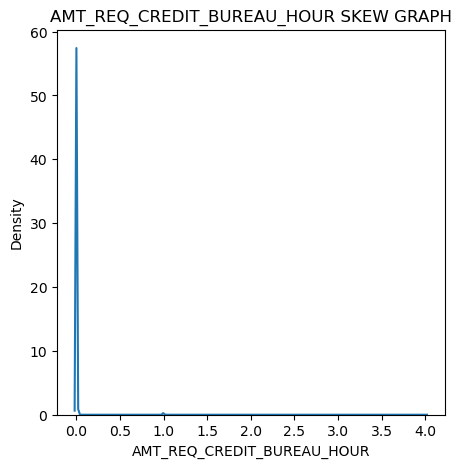

In [19]:
# We can visualize the same
plt.figure(figsize = (5,5))
sns.distplot( data['AMT_REQ_CREDIT_BUREAU_HOUR'],hist=False);
plt.title("AMT_REQ_CREDIT_BUREAU_HOUR SKEW GRAPH")

#### we can see AMT_REQ_CREDIT_BUREAU_HOUR is numerical column we can use use statistical measure (mean, median or mode) or we can impute with 0. 

In [20]:
col = ["AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in col:
    print (data[i].skew())

27.043504708921265
9.293572551814966
7.804848087437468
134.3657760491256
1.243590004141659


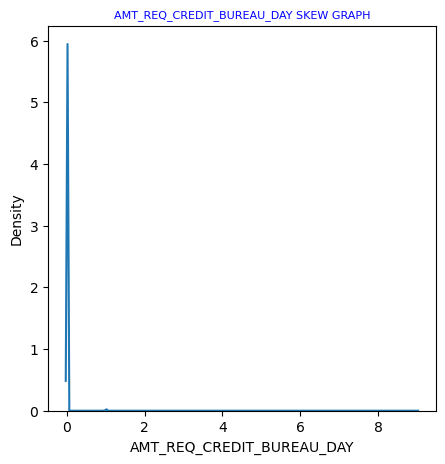

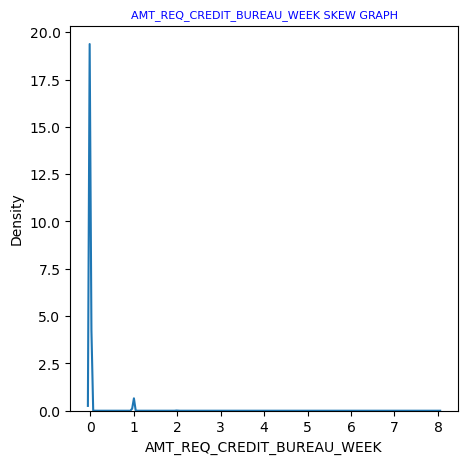

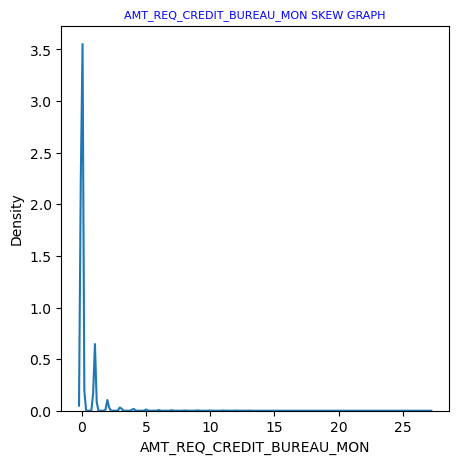

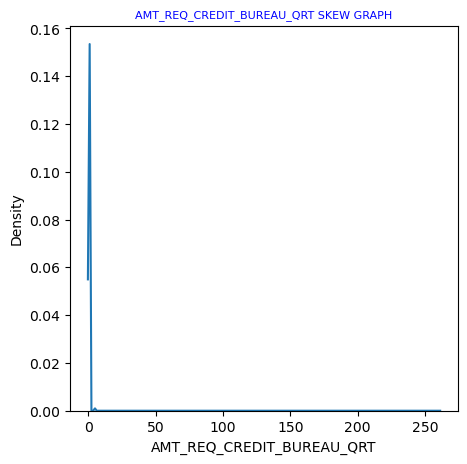

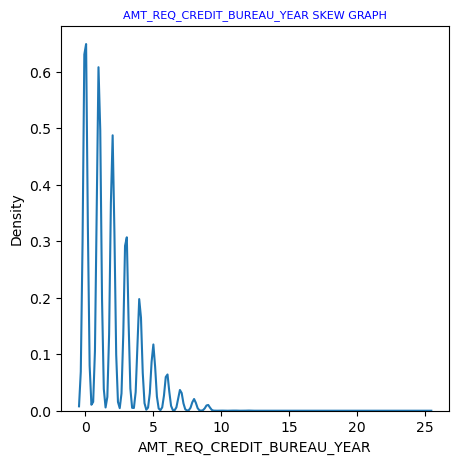

In [21]:
for plot in col:
    plt.figure(figsize = (5,5))
    sns.distplot( data[plot],hist=False)
    plt.title(f"{plot} SKEW GRAPH",fontsize=8, color='blue')
    

- Now we can see the all this column AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR data is not normally distributed and the distribution is highly  left skewed so mode might be a better representation.


In [22]:
# Imputing all this columns with mode
data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0], inplace = True)
data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0], inplace = True)
data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0], inplace = True)
data.AMT_REQ_CREDIT_BUREAU_MON.fillna(data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0], inplace = True)
data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0], inplace = True)
data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace = True)

In [23]:
# checking for null values
((data.isnull().sum()/data.shape[0]) * 100)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE      

#### we can drop 0.003902%,0.090403%,0.420148%,0.214626% of data it cannot effect on EDA

In [24]:
data1 = data[~(data["AMT_ANNUITY"].isnull() | data["AMT_GOODS_PRICE"].isnull()| data["NAME_TYPE_SUITE"].isnull() | data["EXT_SOURCE_2"].isnull())]

In [25]:
#checking the size of new dataframe
data1.shape

(305548, 72)

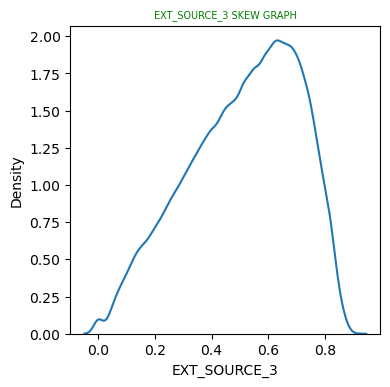

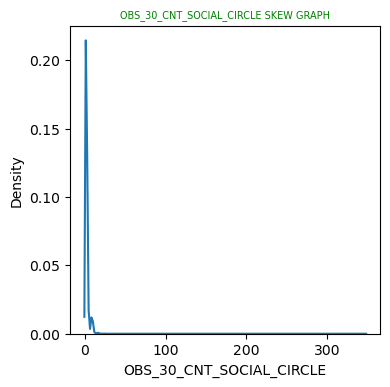

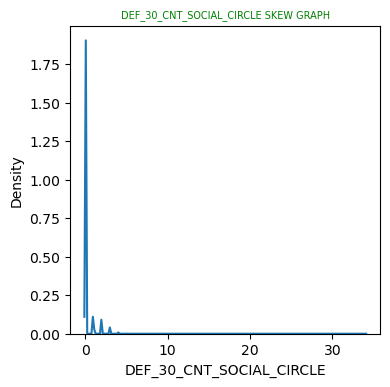

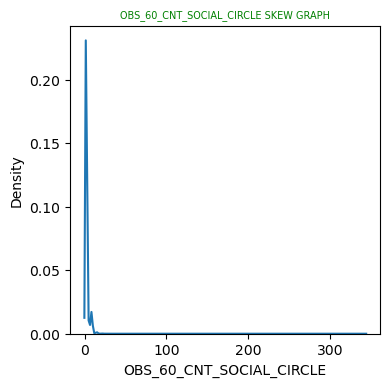

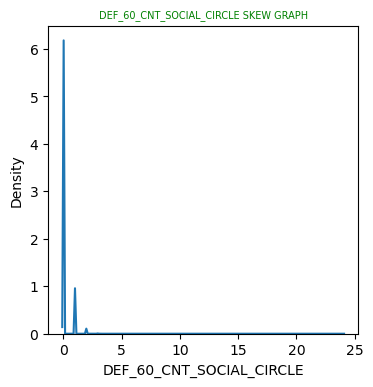

In [26]:
col = ["EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
for plot in col:
    plt.figure(figsize = (4,4))
    sns.distplot( data[plot],hist=False)
    plt.title(f"{plot} SKEW GRAPH",fontsize=7, color='green')
    

- Now we can see the all this column EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE   is not normally distributed and the distribution is highly  left skewed so mode might be a better representation.


In [27]:
data1.EXT_SOURCE_3.fillna(data1.EXT_SOURCE_3.mode()[0], inplace = True)
data1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(data1.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0], inplace = True)
data1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(data1.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0], inplace = True)
data1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(data1.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0], inplace = True)
data1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(data1.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0], inplace = True)


##### All the Null values is taken care of

In [28]:
data1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                95759
C

In [29]:
# Checking for Duplicates
data1[data1.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

### Univariate Analysis

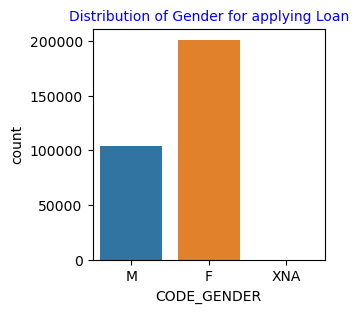

In [30]:
# Checking the distribution of Gender
plt.figure(figsize = (3,3))
sns.countplot(x = "CODE_GENDER",data = data1)
plt.title("Distribution of Gender for applying Loan",fontsize=10, color='blue')
plt.show()

In [31]:
# Here XNA also implying null values so we ignore XNA
Gender = data1[(data1.CODE_GENDER == "M") | (data1.CODE_GENDER == "F")]

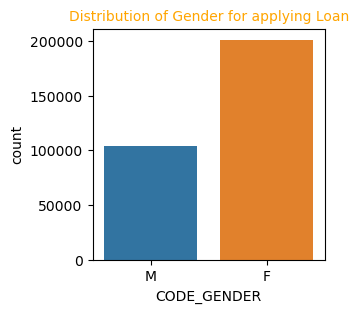

In [32]:
plt.figure(figsize = (3,3))
sns.countplot(x = "CODE_GENDER", data = Gender)
plt.title("Distribution of Gender for applying Loan",fontsize=10, color='orange')
plt.show()

###### We can say that female loan applicants are more than male applicants in other words are female are more applying for loan


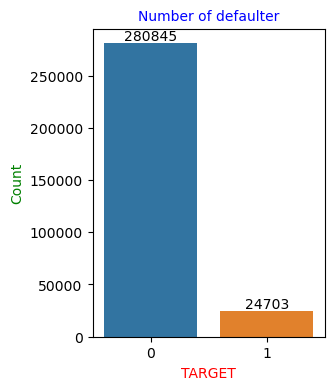

In [33]:
# checking the defaulters 
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "TARGET", data = data1)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of defaulter",fontsize=10, color='blue')
ax.set_xlabel("TARGET", color='red')
ax.set_ylabel("Count", color='green')
plt.show()

### Data Imbalance

In [34]:
data_imbalance = (data1.TARGET.value_counts(normalize = True)*100).reset_index()
data_imbalance

index     TARGET
0      0  91.915182
1      1   8.084818

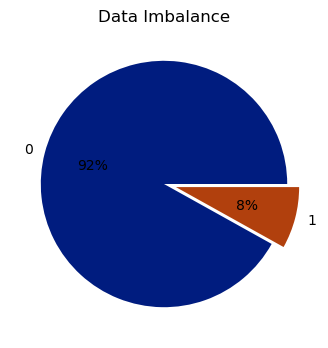

In [35]:
plt.figure(figsize = (4,4))
explode = [0, 0.1]
palette_color = sns.color_palette('dark') 

plt.pie(data_imbalance['TARGET'], labels=data_imbalance['index'], colors=palette_color, explode=explode, autopct='%.0f%%')

plt.title('Data Imbalance')
plt.show()


###  Imbalance Ratio

In [36]:
# finding the imbalance Ratio
imbalance_ratio = (data1.TARGET.value_counts(normalize = True)*100)
imbalance_ratio1 = imbalance_ratio[0] /imbalance_ratio[1]
print(f" Imbalance ration is {imbalance_ratio1:.2f}")

 Imbalance ration is 11.37


In [37]:
# checking what percentage of the client owns a car 
(data1.FLAG_OWN_CAR.value_counts()/data1.shape[0])*100

N    65.968031
Y    34.031969
Name: FLAG_OWN_CAR, dtype: float64

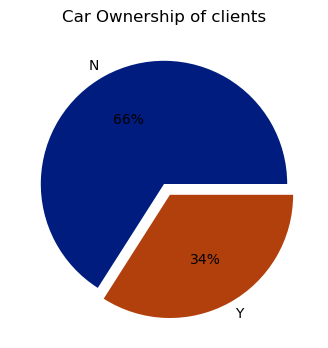

In [38]:
Own_car = data1.FLAG_OWN_CAR.value_counts().reset_index()
plt.figure(figsize = (4,4))
explode = [0, 0.1]
palette_color = sns.color_palette('dark') 

plt.pie(Own_car['FLAG_OWN_CAR'], labels=Own_car['index'], colors=palette_color, explode=explode, autopct='%.0f%%')

plt.title('Car Ownership of clients')
plt.show()



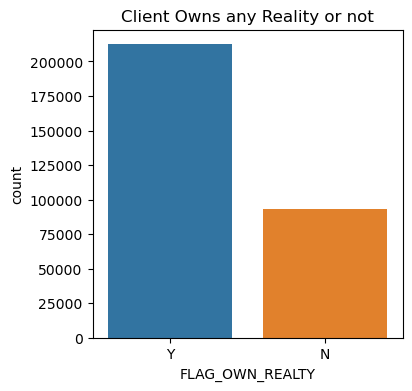

In [39]:
# checking if client owns a house or flat
plt.figure(figsize =(4,4))
sns.countplot(data1, x = "FLAG_OWN_REALTY")
plt.title("Client Owns any Reality or not")
plt.show()

#### we can see larger proportion of client having there own house or flat 

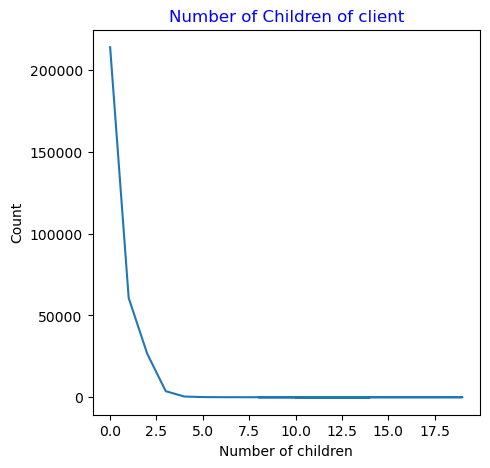

In [40]:
# Number of Children of client
plt.figure(figsize =(5,5))
child_count = data1.CNT_CHILDREN.value_counts()
plt.plot(child_count)
plt.title("Number of Children of client", color = "blue")
plt.xlabel("Number of children")
plt.ylabel("Count")
plt.show()

In [41]:
# calculating the percentage of childrean client have
data1.CNT_CHILDREN.value_counts(normalize = True) *100

0     70.041041
1     19.870855
2      8.700106
3      1.207012
4      0.139749
5      0.027492
6      0.006873
7      0.002291
14     0.000982
8      0.000655
9      0.000655
12     0.000655
10     0.000655
19     0.000655
11     0.000327
Name: CNT_CHILDREN, dtype: float64

#### Outlier analysis

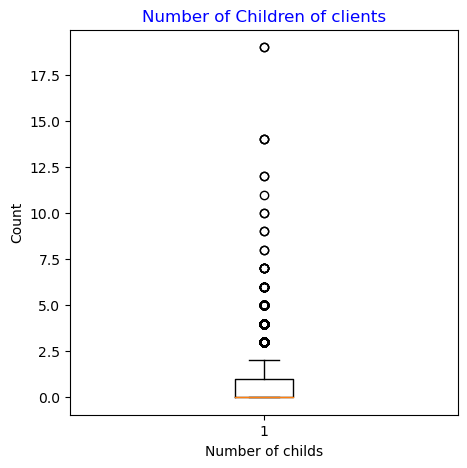

In [42]:
# Number of Childrean client Has
plt.figure(figsize =(5,5))
plt.boxplot(data1.CNT_CHILDREN)
plt.title("Number of Children of clients", color = "blue")
plt.xlabel("Number of childs")
plt.ylabel("Count")
plt.show()

- most of the client having no children around 70% of client is having no child
- very few people have children more than 4
- It is very evident in box plot 
- More than 4 children is outlier
- Children more than 3 are outlier. lets checks how many rows having more than 3 children
- data1[data1["CNT_CHILDREN"] > 3].shape = (553, 72)
- data1[data1["CNT_CHILDREN"] > 4].shape = (126, 72)
-data1[data1["CNT_CHILDREN"] > 6].shape = (21,72)
-data1[data1["CNT_CHILDREN"] > 8].shape = (12,72)
-data1[data1["CNT_CHILDREN"] > 8].shape = (12,72)

In [43]:
# checking AMT_INCOME_TOTAL column
data1.AMT_INCOME_TOTAL.describe()

count    3.055480e+05
mean     1.688326e+05
std      2.377474e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

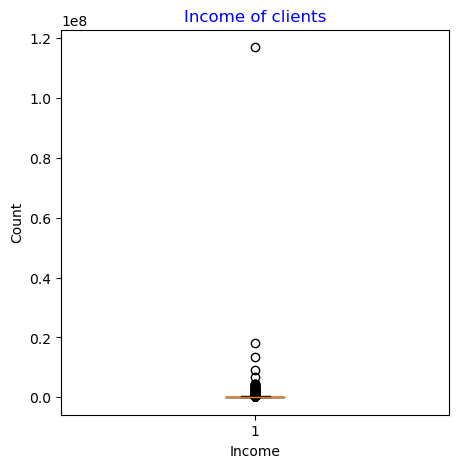

In [44]:
# Number of Childrean client Has
plt.figure(figsize =(5,5))
plt.boxplot(data1.AMT_INCOME_TOTAL)
plt.title("Income of clients", color = "blue")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

- Income above 20,000,000 is outlier
- Income above 10,000,000 is potential outlier
- data[(data.AMT_INCOME_TOTAL > 10000000)] we have 2 rows like this

## Sanity Checks
#### Checking for outliers

In [45]:
data1[(data1.AMT_INCOME_TOTAL > 40000000)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840      114967       1         Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840               Y             1       117000000.0    562491.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
12840      26194.5         454500.0   Unaccompanied          Working   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840  Secondary / secondary special            Married  House / apartment   

       DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
12840      -12615           -922            -6762.0            -3643   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
12840           1               1                0                 1   

       FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
12840           0           0        Laborers              3.0   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
12840                     2                            2   

      WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
12840                    TUESDAY                       14   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
12840                           0                           0   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
12840                            0                       0   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
12840                       0                        0   

            ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
12840  Business Entity Type 3      0.113161      0.145543   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
12840                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
12840                     0.0                0                1   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
12840                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
12840                0                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
12840                 0                 0                 0                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
12840                 0                 0                         0.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
12840                        0.0                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
12840                        0.0                        0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  
12840                         1.0

In [46]:
data1 = data1[~(data1.AMT_INCOME_TOTAL > 40000000)]

- In this above data is a little fishy because income is very high but occupation type is labour
- Dropping this row from dataframe is suggested.


In [47]:
data1[(data1.AMT_INCOME_TOTAL > 10000000)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
203693      -15704          -4961            -3338.0            -4728   
246858      -13551           -280            -3953.0            -4972   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
203693           1               1                0                 1   
246858           1               1                1                 1   

        FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
203693           0           0             NaN              4.0   
246858           0           0             NaN              2.0   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
203693                     2                            2   
246858                     2                            2   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
203693                   THURSDAY                       22   
246858                     SUNDAY                       12   

        REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
203693                           0                           0   
246858                           0                           0   

        LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
203693                            0                       0   
246858                            0                       0   

        REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
203693                       0                        0   
246858                       0                        0   

             ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
203693  Business Entity Type 3      0.788606        0.7463   
246858  Business Entity Type 3      0.713507        0.7463   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
203693                       1.0                       0.0   
246858                       0.0                       0.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
203693                       1.0                       0.0   
246858                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
203693                 -1133.0                0                1   
246858                   -13.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
203693                0                0                0                0   
246858                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
203693                0                0                 0                 0   
246858                0                1                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
203693                 0                 0                 0   
246858                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
203693                

###### Correcting age columns in the given data set age is given in days.There are other columns which needs to convert from days to year such as Days_Employed, Days_Registration, Days_ID_Publish

In [48]:
data1["DAYS_BIRTH"] = data1.DAYS_BIRTH.apply(lambda x: int(abs(x) // 365.25))
data1["DAYS_REGISTRATION"] = data1.DAYS_REGISTRATION.apply(lambda x: abs(x) // 365.25)
data1["DAYS_EMPLOYED"] = data1.DAYS_EMPLOYED.apply(lambda x: abs(x) // 365.25)
data1["DAYS_ID_PUBLISH"] = data1.DAYS_ID_PUBLISH.apply(lambda x: abs(x) // 365.25)


- abs function convert negative number into postive number for eg -45 using abs(-45) it give output 45
- we use 365.25 rather than 365 days because there is leap year also so we took average
- then covert the columns into integer because age is never in floating type

In [49]:
data1["DAYS_REGISTRATION"] = data1["DAYS_REGISTRATION"].astype(int)
data1["DAYS_EMPLOYED"] = data1.DAYS_EMPLOYED.astype(int)
data1["DAYS_ID_PUBLISH"] = data1.DAYS_ID_PUBLISH.astype(int)


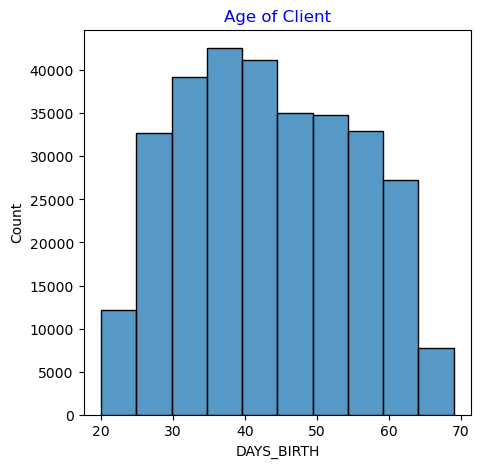

In [50]:
# plot a histrogram for watching the distribution of age in application data
plt.figure(figsize = (5,5))
sns.histplot(data1['DAYS_BIRTH'], bins=10, kde=False)
plt.title('Age of Client', color = "blue")
plt.show()

###### What we can infer from this histogram 
- we can clearly see the people with age category 35 to 40 are applying more for loans
- Age group between 40-45 are the second most common demographic for applying the loan
- Age Group between 65 -70 represent the lowest demographic for applying loan

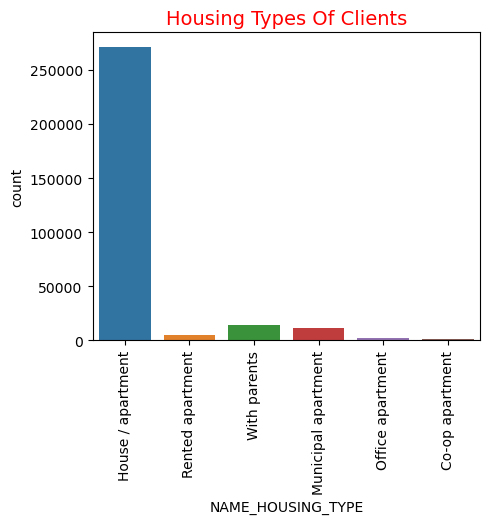

In [51]:
# Check the housing types of client
ax = plt.subplots(figsize=(5, 4))
sns.countplot(x = data1.NAME_HOUSING_TYPE, data = data1)
plt.title("Housing Types Of Clients", fontdict={'color': 'Red', 'fontsize': 14})
plt.xticks(rotation = 90)
plt.show()

- Most of the client is having there own house/apartment
- Very few client live in co-op apartments


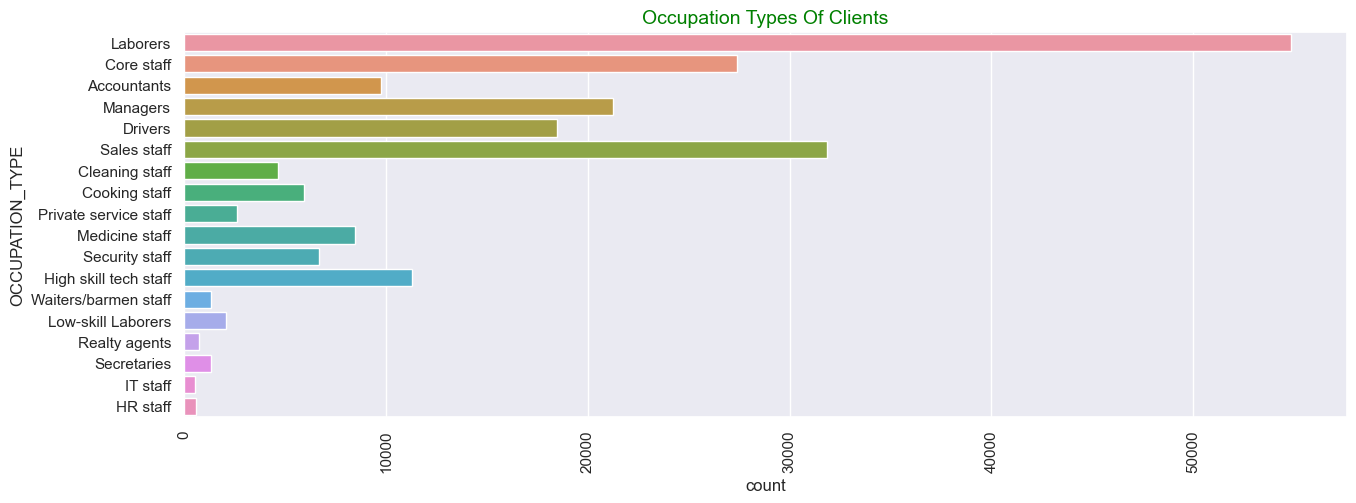

In [52]:
# Checking the occupation types o client
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(y = data1.OCCUPATION_TYPE, data = data1)
plt.title("Occupation Types Of Clients", fontdict={'color': 'Green', 'fontsize': 14})
plt.xticks(rotation = 90)
plt.show()

- Most people who are applying for loans are laborers
- very few hr staff are or applying for loan

In [53]:
#Changing the style option
plt.style.use("ggplot")

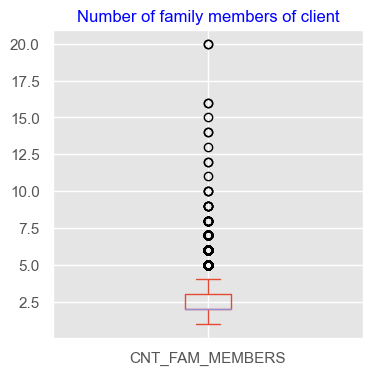

In [54]:
# Checking the number o aily memer of client and checking for outlier also
plt.figure(figsize=(4,4))
data1["CNT_FAM_MEMBERS"].plot.box()
plt.title("Number of family members of client", fontsize = 12, color= "blue")
plt.show()
# Data is in continous manner 

In [55]:
data1["CNT_FAM_MEMBERS"].describe()

count    305547.000000
mean          2.152834
std           0.910601
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

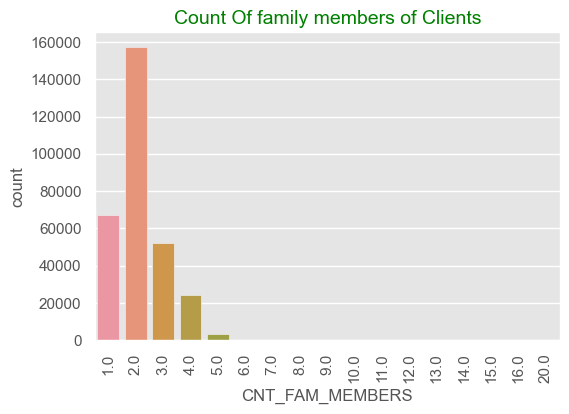

In [56]:
#count of family members of client
ax = plt.subplots(figsize=(6, 4))
sns.countplot(x = data1.CNT_FAM_MEMBERS, data = data1)
plt.title("Count Of family members of Clients", fontdict={'color': 'Green', 'fontsize': 14})
plt.xticks(rotation = 90)
plt.show()

In [57]:
# Setting style to default
plt.style.use("default")

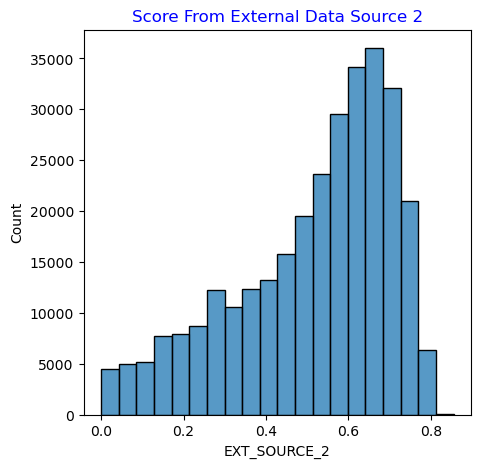

In [58]:
# Checking the distribution of score of client from external data source 2
plt.figure(figsize =(5,5))
sns.histplot(data1.EXT_SOURCE_2, bins = 20)
plt.title("Score From External Data Source 2", fontsize = 12 , color = "blue")
plt.show()

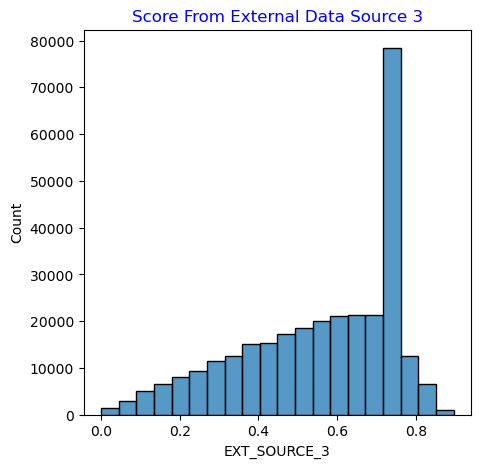

In [59]:
# Checking the distribution of score of client from external data source 3

plt.figure(figsize =(5,5))
sns.histplot(data1.EXT_SOURCE_3, bins = 20)
plt.title("Score From External Data Source 3", fontsize = 12 , color = "blue")
plt.show()

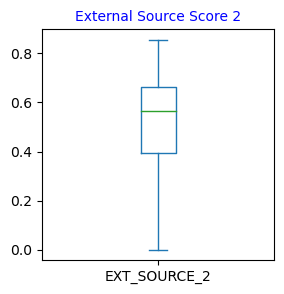

In [60]:
#checking the outlier for EXT_SOURCE_2 and EXT_SOURCE_3
plt.figure(figsize =(3,3))
data1.EXT_SOURCE_2.plot.box()
plt.title("External Source Score 2",fontsize = 10, color = "blue")
plt.show()


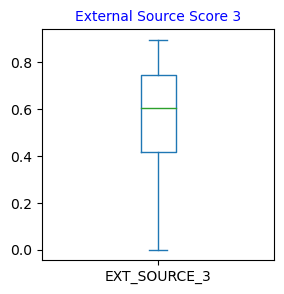

In [61]:
#checking the outlier for EXT_SOURCE_3
plt.figure(figsize =(3,3))
data1.EXT_SOURCE_3.plot.box()
plt.title("External Source Score 3" ,fontsize = 10, color = "blue")
plt.show()



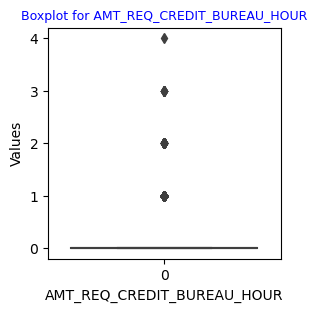

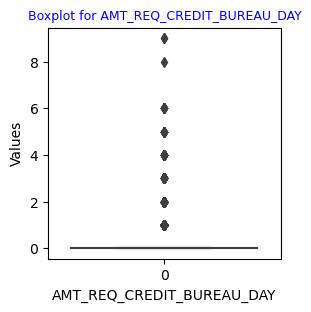

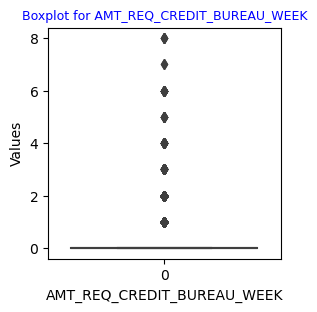

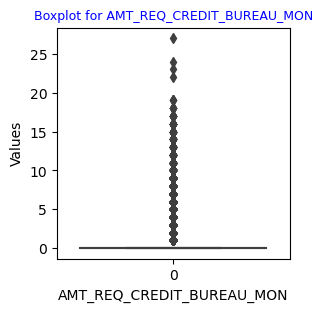

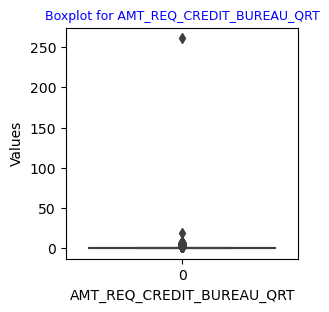

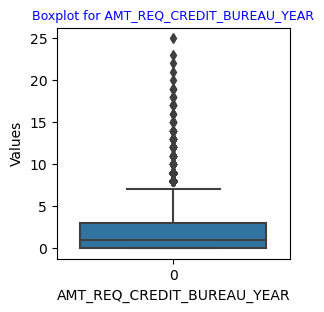

In [62]:
# Checking for outlier in columns 
col2 = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in col2:
    plt.figure(figsize=(3, 3))
    sns.boxplot(data1[i])
    plt.title(f'Boxplot for {i}',fontsize = 9, color = "blue")
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.show()


- Across all the box plots, the distance between the upper fence and values exceeding the fence is relatively small, suggesting   that these values may not be significant outliers or potential anomalies.

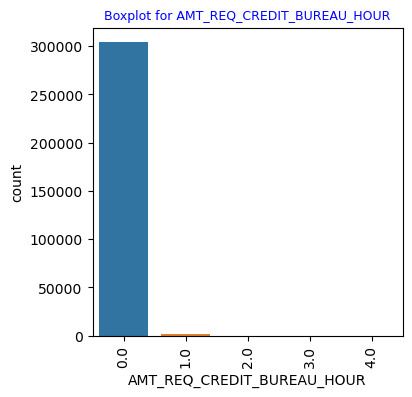

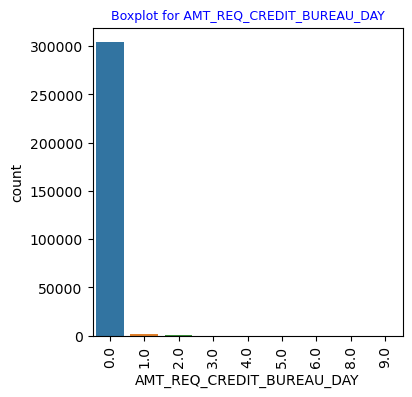

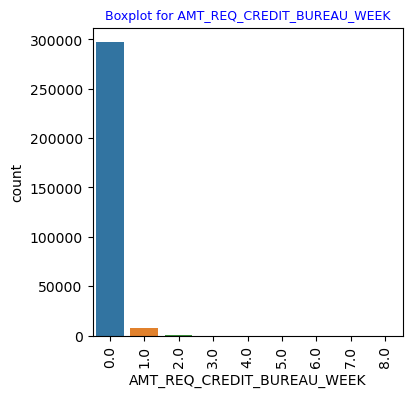

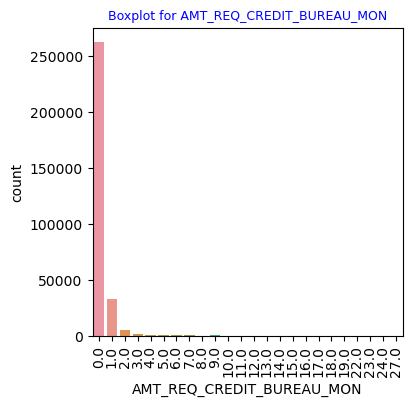

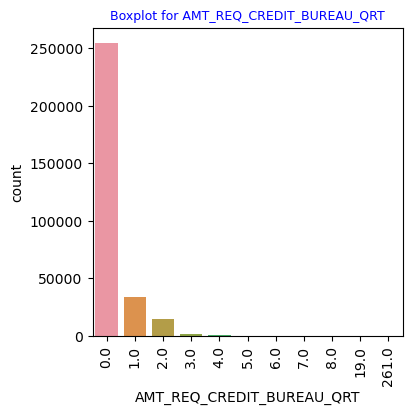

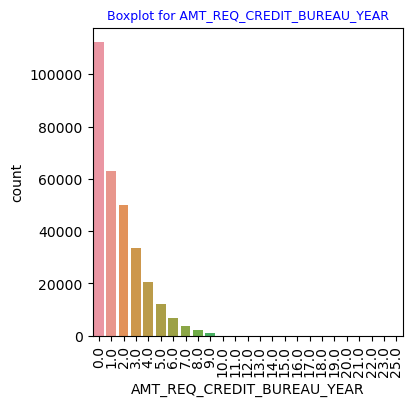

In [63]:
# More analysing of this columns using count plot
col2 = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in col2:
    plt.figure(figsize=(4, 4))
    sns.countplot(x = i, data = data1)
    plt.title(f'Boxplot for {i}',fontsize = 9, color = "blue")
    plt.xticks(rotation = 90)
    plt.show()


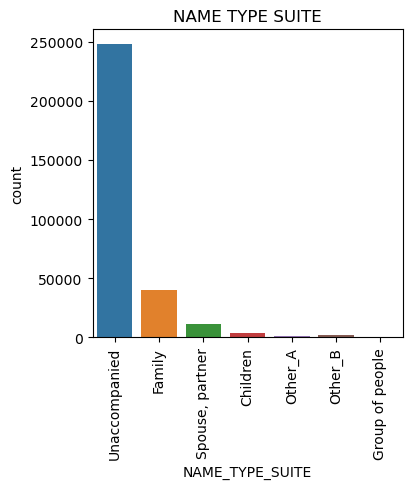

In [64]:
# Analysing name type suite(Who was accompanying client when he was applying for the loan)
plt.figure(figsize=(4, 4))
sns.countplot(x = data1.NAME_TYPE_SUITE, data = data1)
plt.xticks(rotation = 90)
plt.title("NAME TYPE SUITE")
plt.show()
# Most of client came on there own nobody accompanying them.

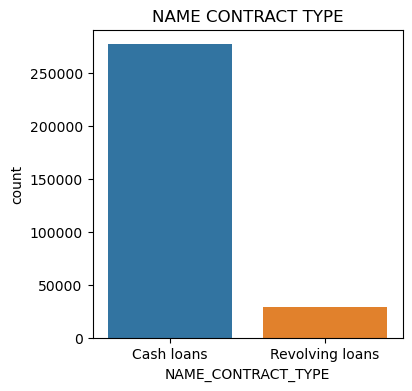

In [65]:
# Analysing NAME CONTRACT TYPE(loan is cash or revolving)

plt.figure(figsize=(4, 4))
sns.countplot(x = "NAME_CONTRACT_TYPE", data = data1)
plt.title("NAME CONTRACT TYPE")
plt.show()
# Most of the client have contract type is cash loans

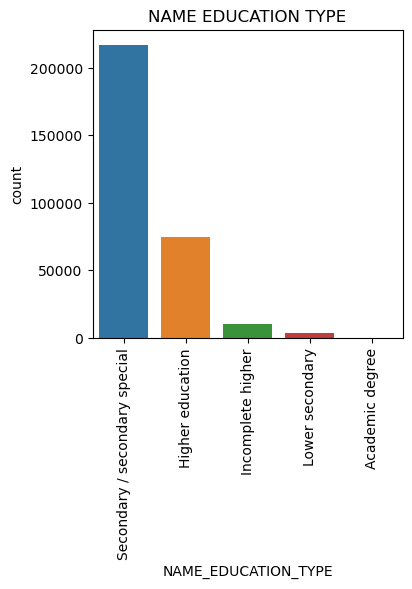

In [66]:
# Analysing the types of education client have

plt.figure(figsize=(4, 4))
sns.countplot(x = "NAME_EDUCATION_TYPE", data = data1)
plt.title("NAME EDUCATION TYPE")
plt.xticks(rotation=90)
plt.show()
# Most of the client have education type is secondary/secondary special

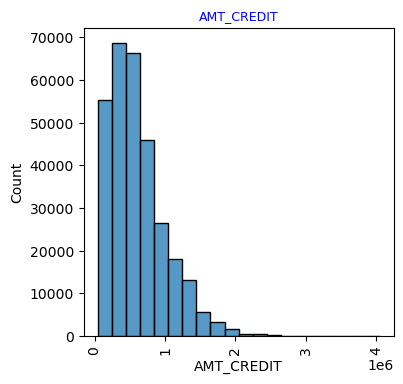

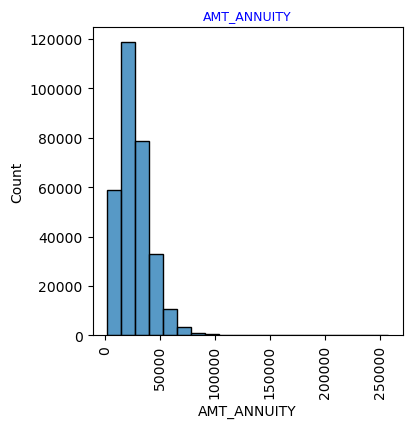

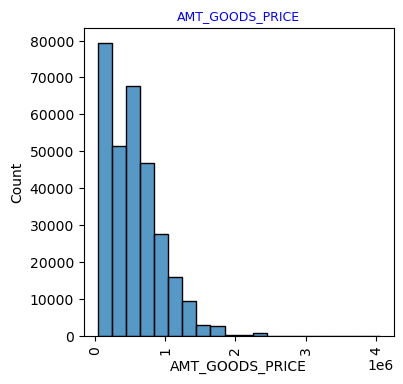

In [67]:
# Checkin the distribution in this columns NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS by using histograms
col2 = ["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]
for i in col2:
    plt.figure(figsize=(4, 4))
    sns.histplot(x = i, data = data1, bins = 20)
    plt.title(f'{i}',fontsize = 9, color = "blue")
    plt.xticks(rotation = 90)
    plt.show()


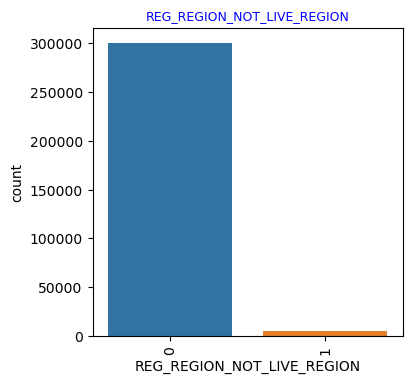

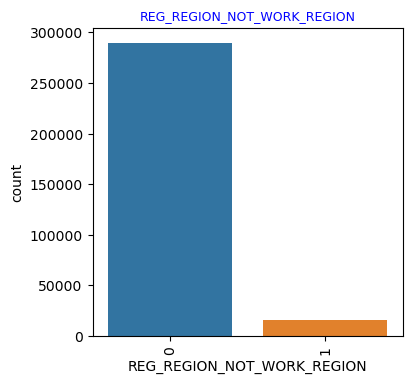

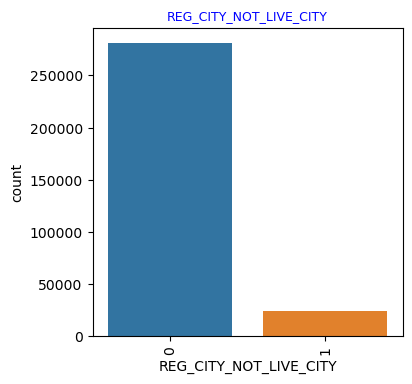

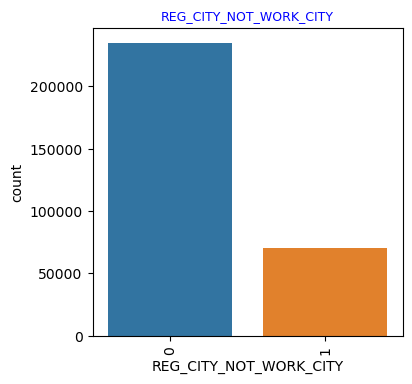

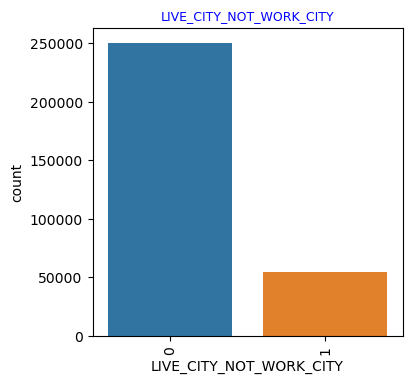

In [68]:
# More analysing of this columns using count plot this all columns contains categorical values 0 or 1
col3 = ["REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY", ]
for i in col3:
    plt.figure(figsize=(4, 4))
    sns.countplot(x = i, data = data1)
    plt.title(f'{i}',fontsize = 9, color = "blue")
    plt.xticks(rotation = 90)
    plt.show()


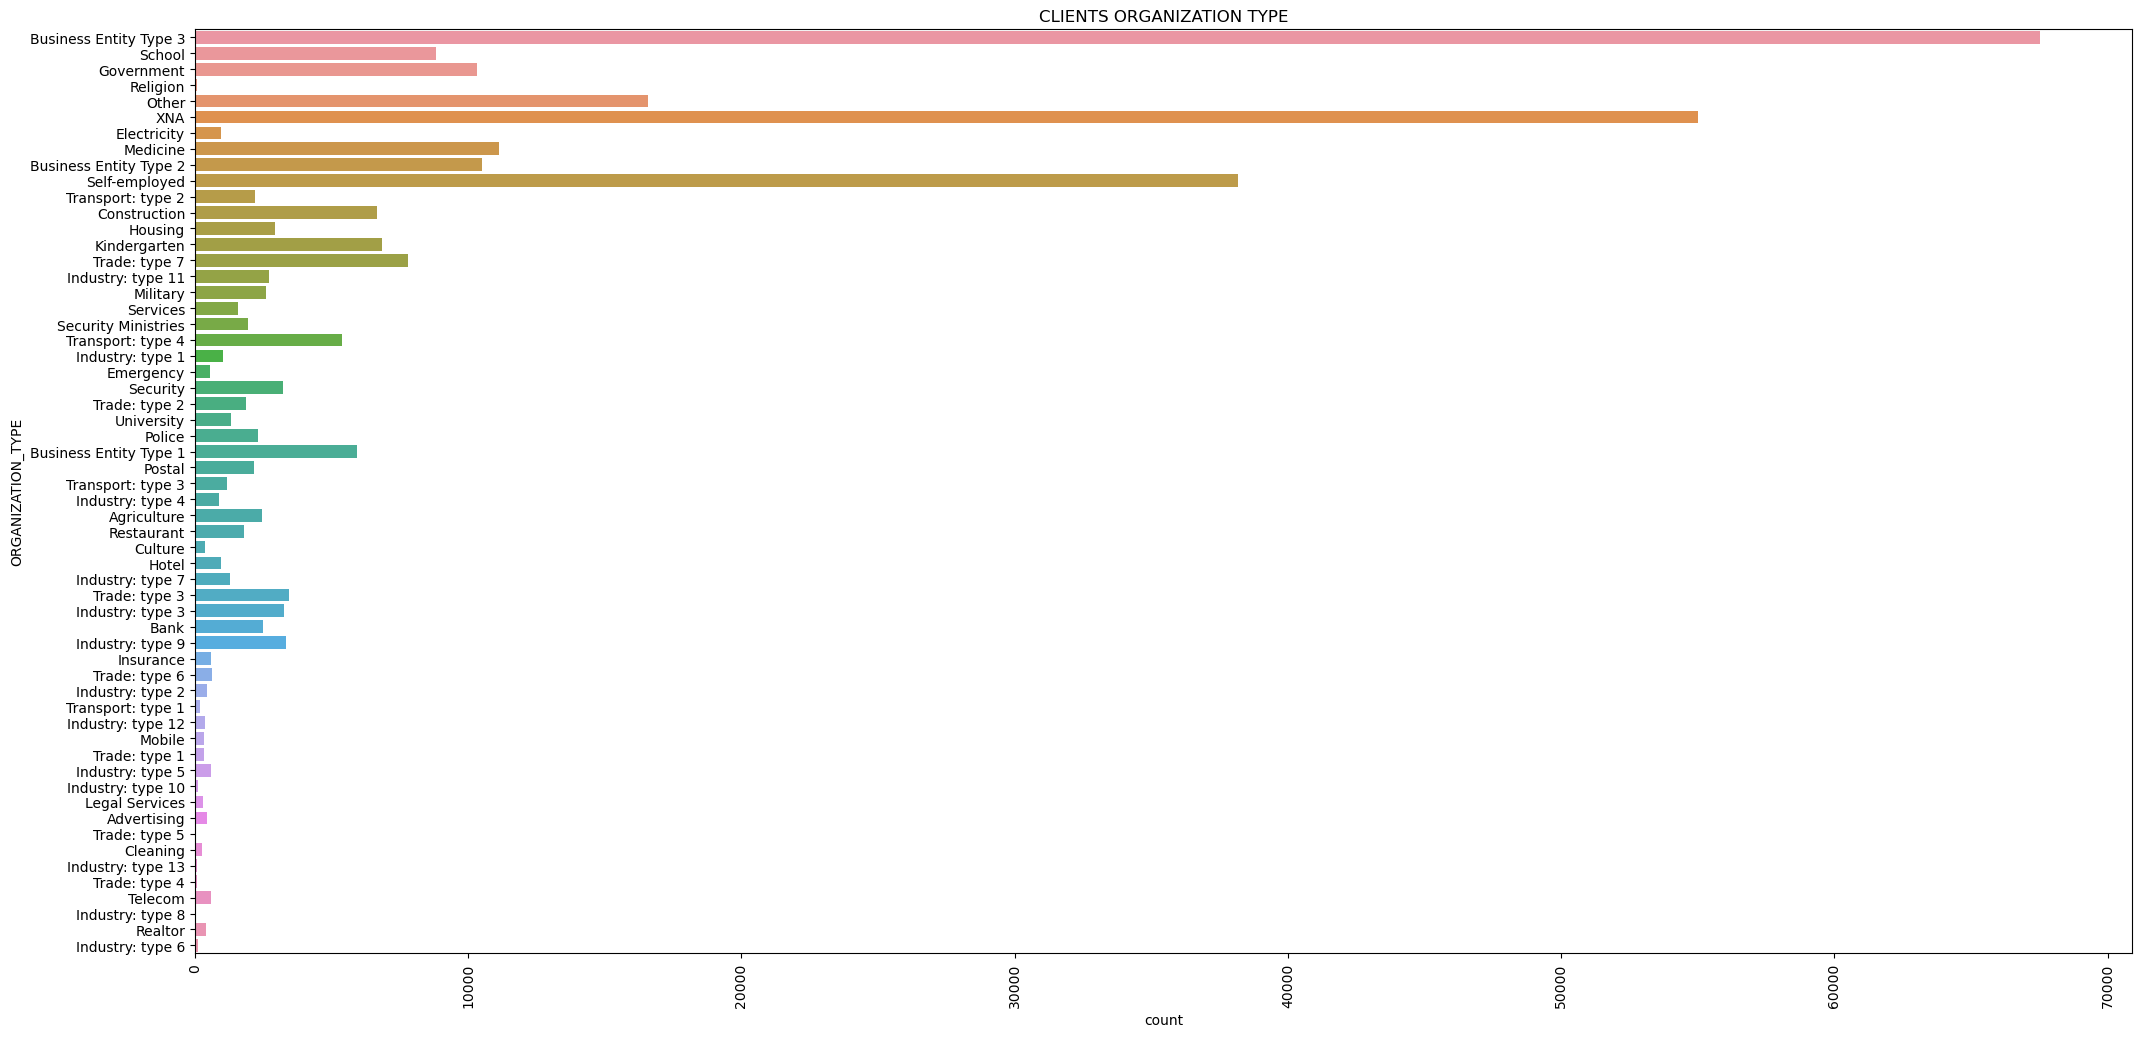

In [69]:
# Analysing the types of Organisation client work

plt.figure(figsize=(25,12))
sns.countplot(y = "ORGANIZATION_TYPE", data = data1)
plt.title("CLIENTS ORGANIZATION TYPE")
plt.xticks(rotation=90)
plt.show()


### What We Infer From above Univariate analysis
- Females are taking more loans compared to men.
- 92% of clients repay their loans, while 8% default.
- Data imbalance ratio is 11.37
- 66% of clients owns a car 34% of clents don't own a car
- larger proportion of client having there own house or flat
- 70% of clients have no children
- people with age category 35 to 40 are applying more for loan.
- Most client have organisation type is business Entity 3
- least organisation type is industry type 8
- we can verify by using this code below
- data1.ORGANIZATION_TYPE.value_counts()

# Bivariate and Multivariate Analysis

In [70]:
# Here XNA also implying null values so we ignore XNA
Gender = data1[(data1.CODE_GENDER == "M") | (data1.CODE_GENDER == "F")]

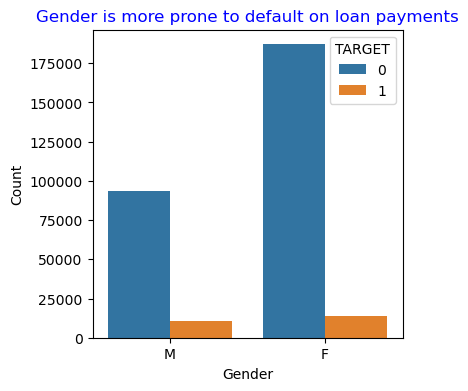

In [71]:
# Assessing which gender is more prone to default on loan payments.
plt.figure(figsize =(4,4))
sns.countplot(x='CODE_GENDER', hue='TARGET', data= Gender)
plt.title('Gender is more prone to default on loan payments', color = "blue")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


- We can see that from graph that females are more prone to default in loan payments in comparison of men.

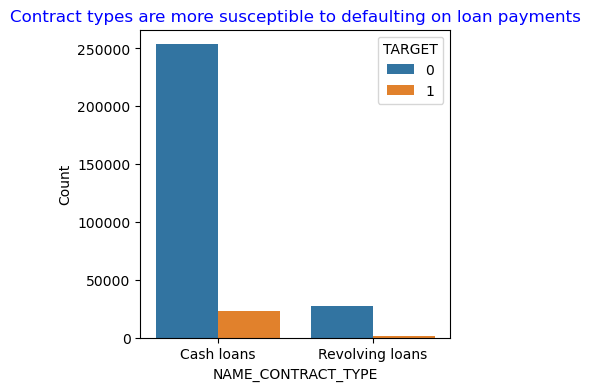

In [72]:
# Assessing which Contract type is more prone to default on loan payments.
plt.figure(figsize =(4,4))
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data= Gender)
plt.title('Contract types are more susceptible to defaulting on loan payments',color = "blue")
plt.xlabel('NAME_CONTRACT_TYPE')
plt.ylabel('Count')
plt.show()
#We can see that from graph that contract type cash loan are having high default in loan payments.


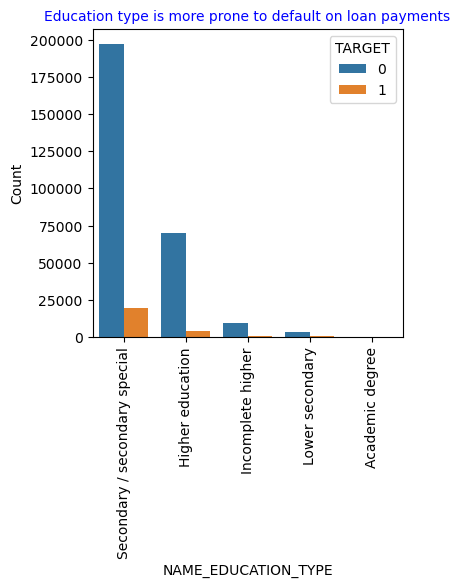

In [73]:
# Assessing which Education type is more prone to default on loan payments.
plt.figure(figsize =(4,4))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data= Gender)
plt.title('Education type is more prone to default on loan payments',fontsize = 10, color ="blue")
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()
# Education type secondary/secondary special are more default in paying loan



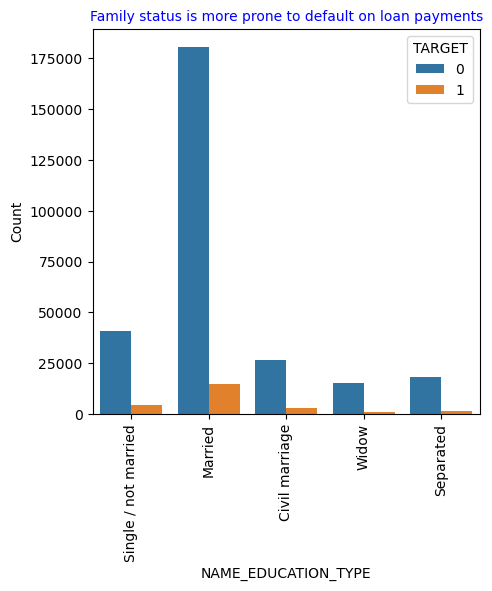

In [74]:
# Assessing which type of family status is more prone to default on loan payments.
plt.figure(figsize =(5,5))
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data= Gender)
plt.title('Family status is more prone to default on loan payments',fontsize = 10, color ="blue")
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()
# Individuals with a family status of "married" exhibit a higher tendency to default on loan payments.

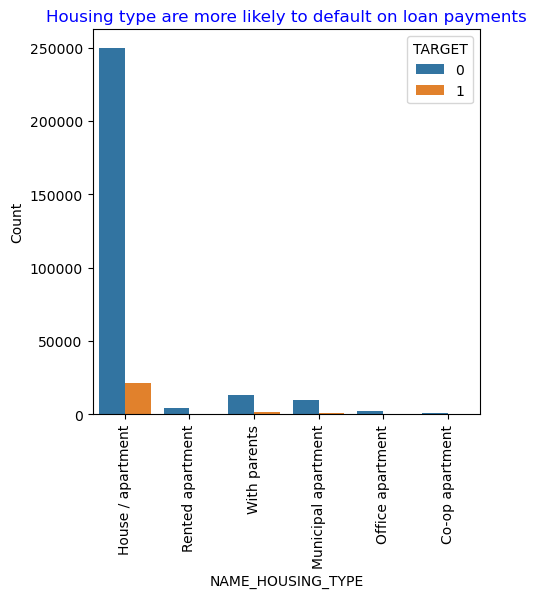

In [75]:
# Assessing which Housing type is more prone to default on loan payments.
plt.figure(figsize =(5,5))
sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data= Gender)
plt.title('Housing type are more likely to default on loan payments',color ="blue")
plt.xlabel('NAME_HOUSING_TYPE')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()
# Individuals who own a house are more prone to default on loan payments.

In [76]:
Gender = Gender[~(Gender["ORGANIZATION_TYPE"] == "XNA")]

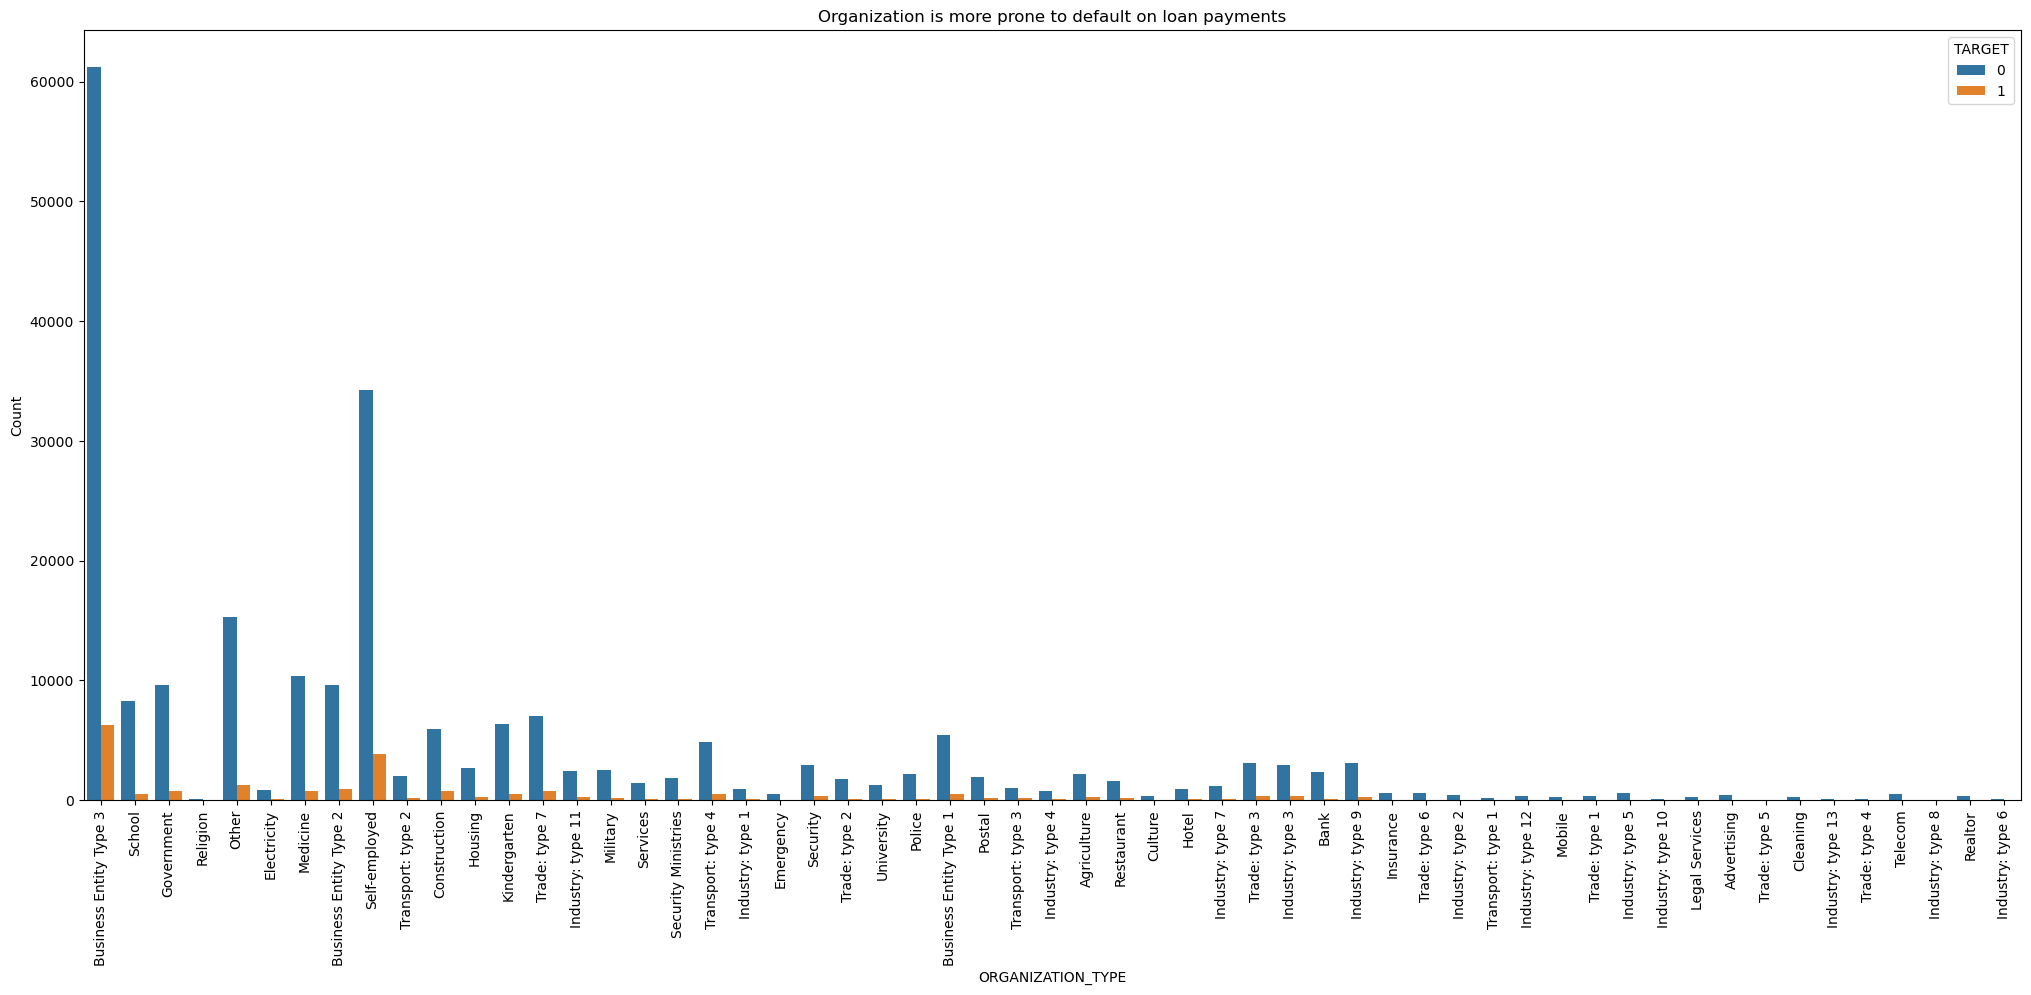

In [77]:
# Assessing which Organization type is more prone to default on loan payments.
plt.figure(figsize =(25,10))
sns.countplot(x ='ORGANIZATION_TYPE', hue='TARGET', data= Gender)
plt.title('Organization is more prone to default on loan payments')
plt.xlabel('ORGANIZATION_TYPE')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


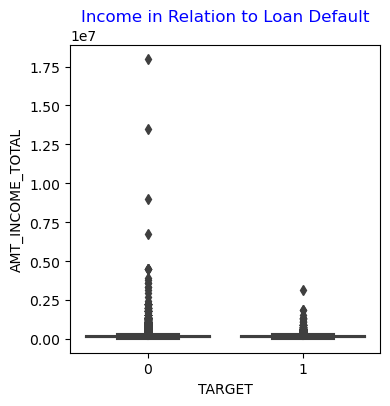

In [78]:
#Analysing income of clients in relation to loan default using box plot
plt.figure(figsize = (4,4))
sns.boxplot(data = data1, x = "TARGET", y = "AMT_INCOME_TOTAL")
plt.title("Income in Relation to Loan Default", color = "blue")
plt.show()

- Individuals with lower income often face challenges in meeting loan payments, as those with higher salaries are more likely to repay loans

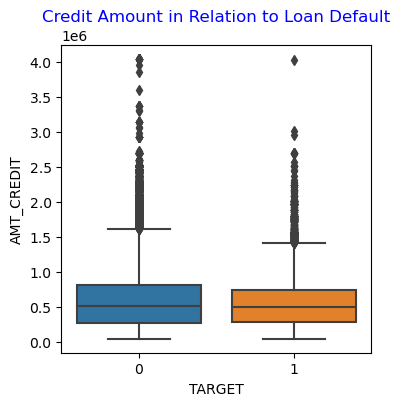

In [79]:
#Analysing credit amount in relation to loan default using box plot
plt.figure(figsize = (4,4))
sns.boxplot(data = data1, x = "TARGET", y = "AMT_CREDIT")
plt.title("Credit Amount in Relation to Loan Default", color = "blue")
plt.show()

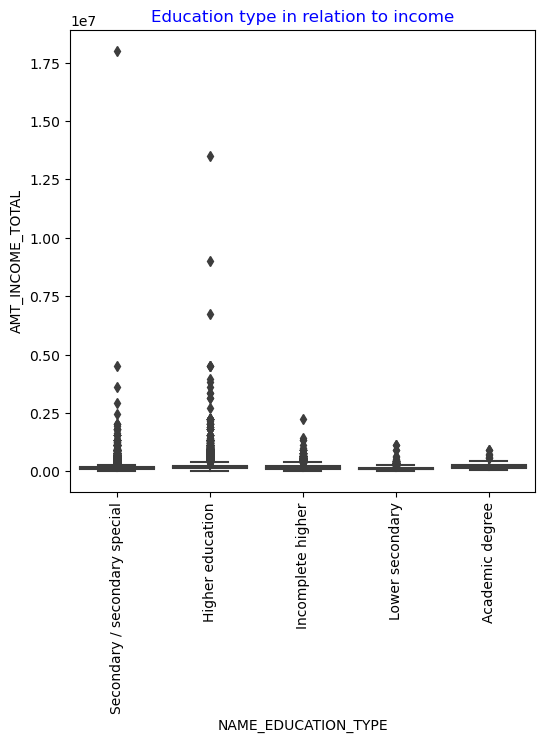

In [80]:
#Analysing Education type in relation to income using box plot
plt.figure(figsize = (6,6))
sns.boxplot(data = data1, x = "NAME_EDUCATION_TYPE", y = "AMT_INCOME_TOTAL")
plt.title("Education type in relation to income", color = "blue")
plt.xticks(rotation = 90)
plt.show()

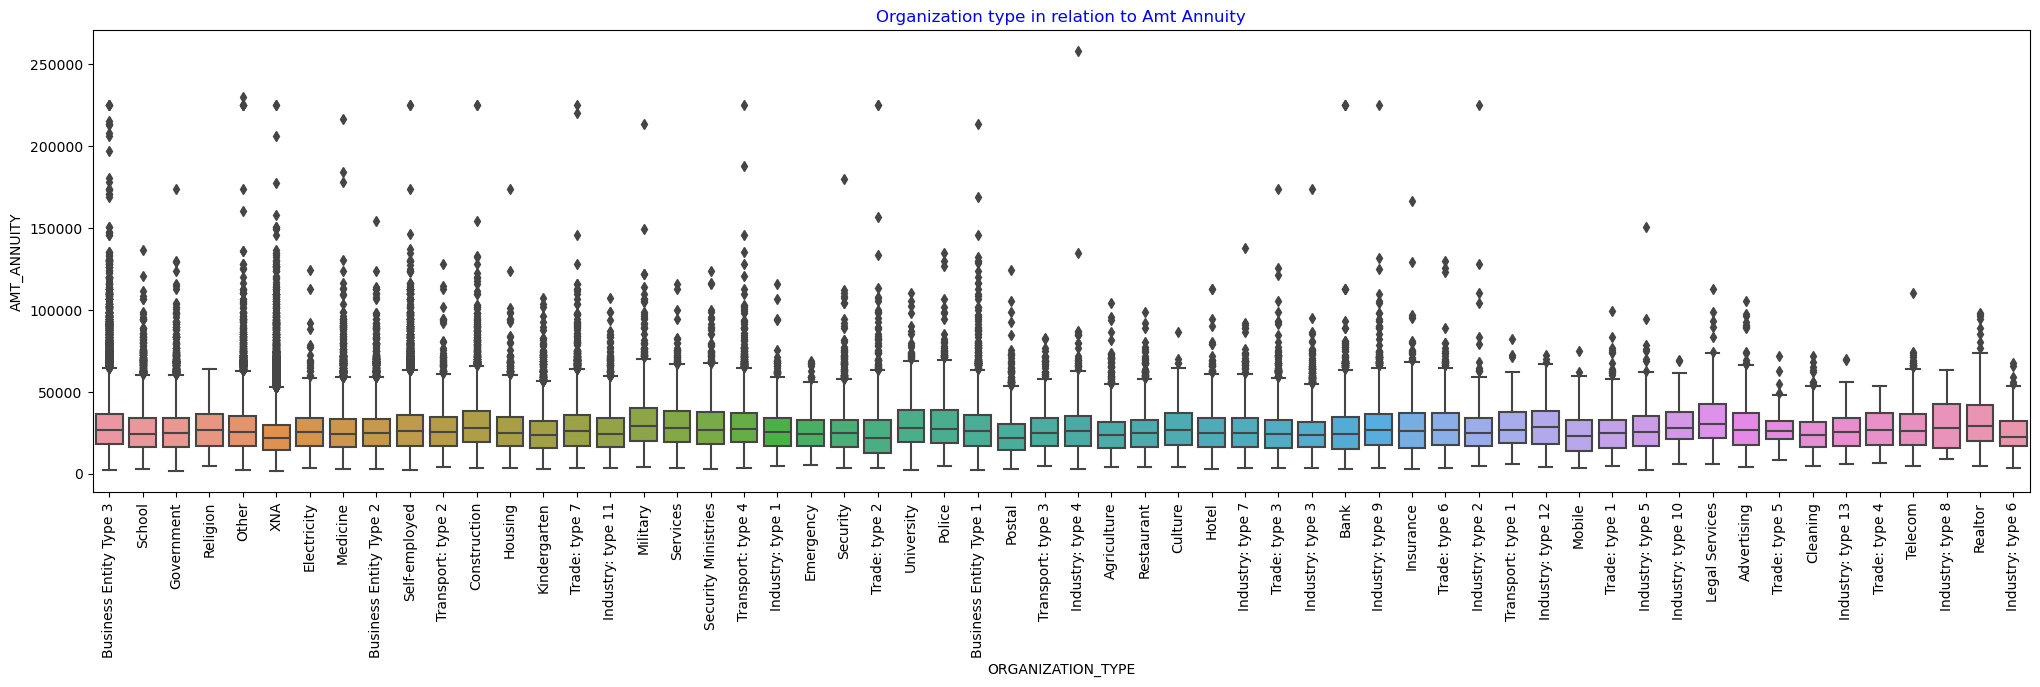

In [81]:
#Analysing Organization type in relation to Amt Annuity using box plot
plt.figure(figsize = (25,6))
sns.boxplot(data = data1, x = "ORGANIZATION_TYPE", y = "AMT_ANNUITY")
plt.title("Organization type in relation to Amt Annuity", color = "blue")
plt.xticks(rotation = 90)

plt.show()

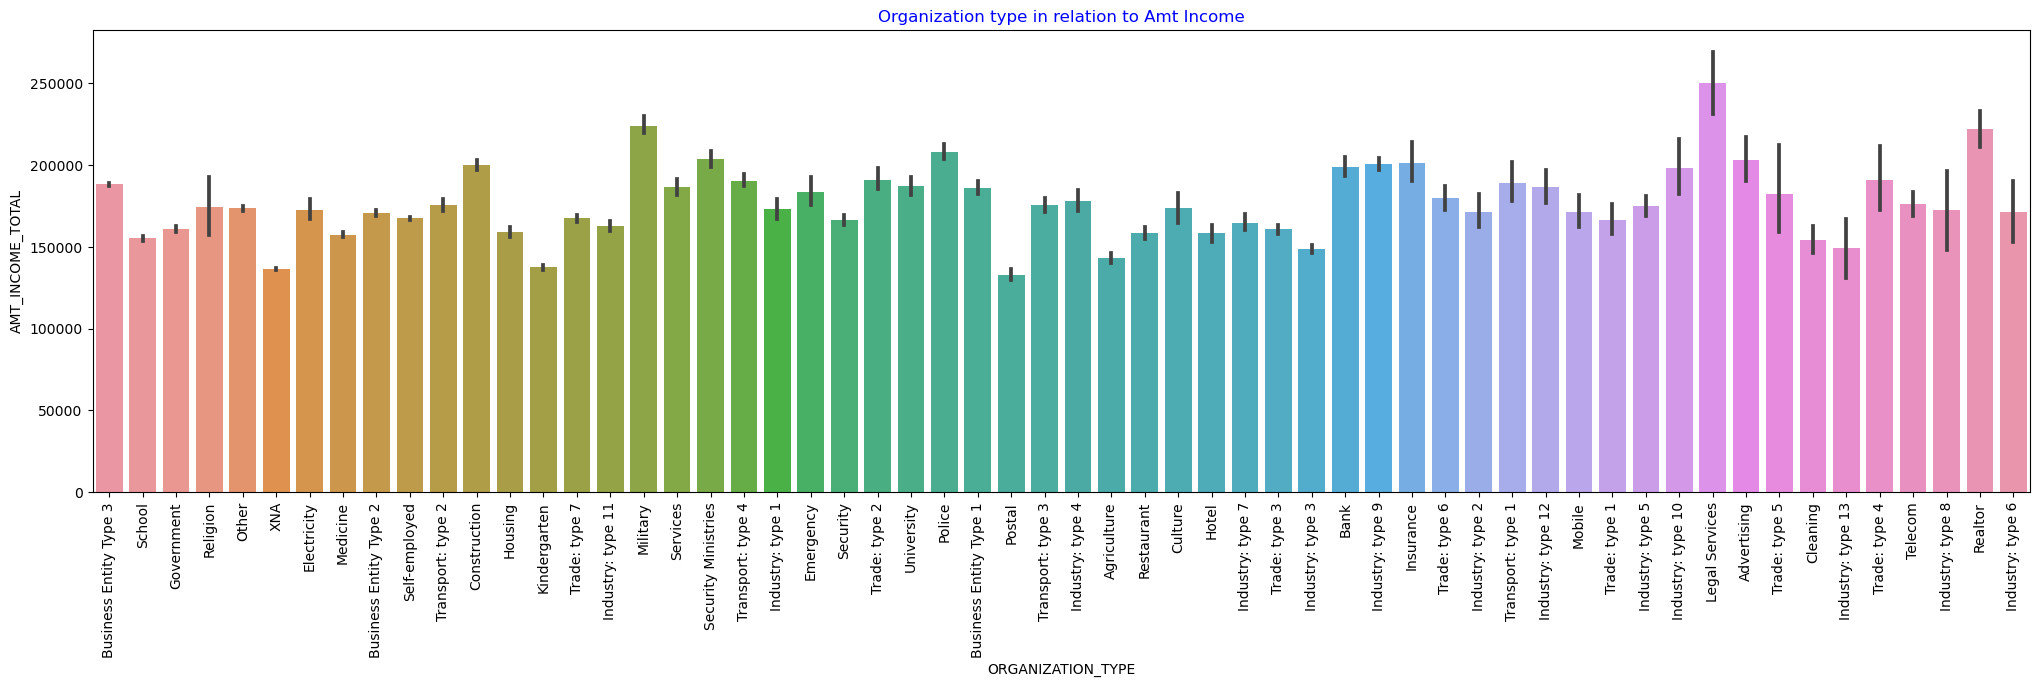

In [196]:
#Analysing Organization type in relation to Amt Annuity using box plot
plt.figure(figsize = (25,6))
sns.barplot(data = data1, x = "ORGANIZATION_TYPE", y = "AMT_INCOME_TOTAL")
plt.title("Organization type in relation to Amt Income", color = "blue")
plt.xticks(rotation = 90)

plt.show()

In [83]:
# Finding correlation between AMT_ANNUITY and AMT_CREDIT
correlation = data1["AMT_ANNUITY"].corr(data1["AMT_CREDIT"])
correlation
# this two variable have strong positive linear relationship 

0.769974432387946

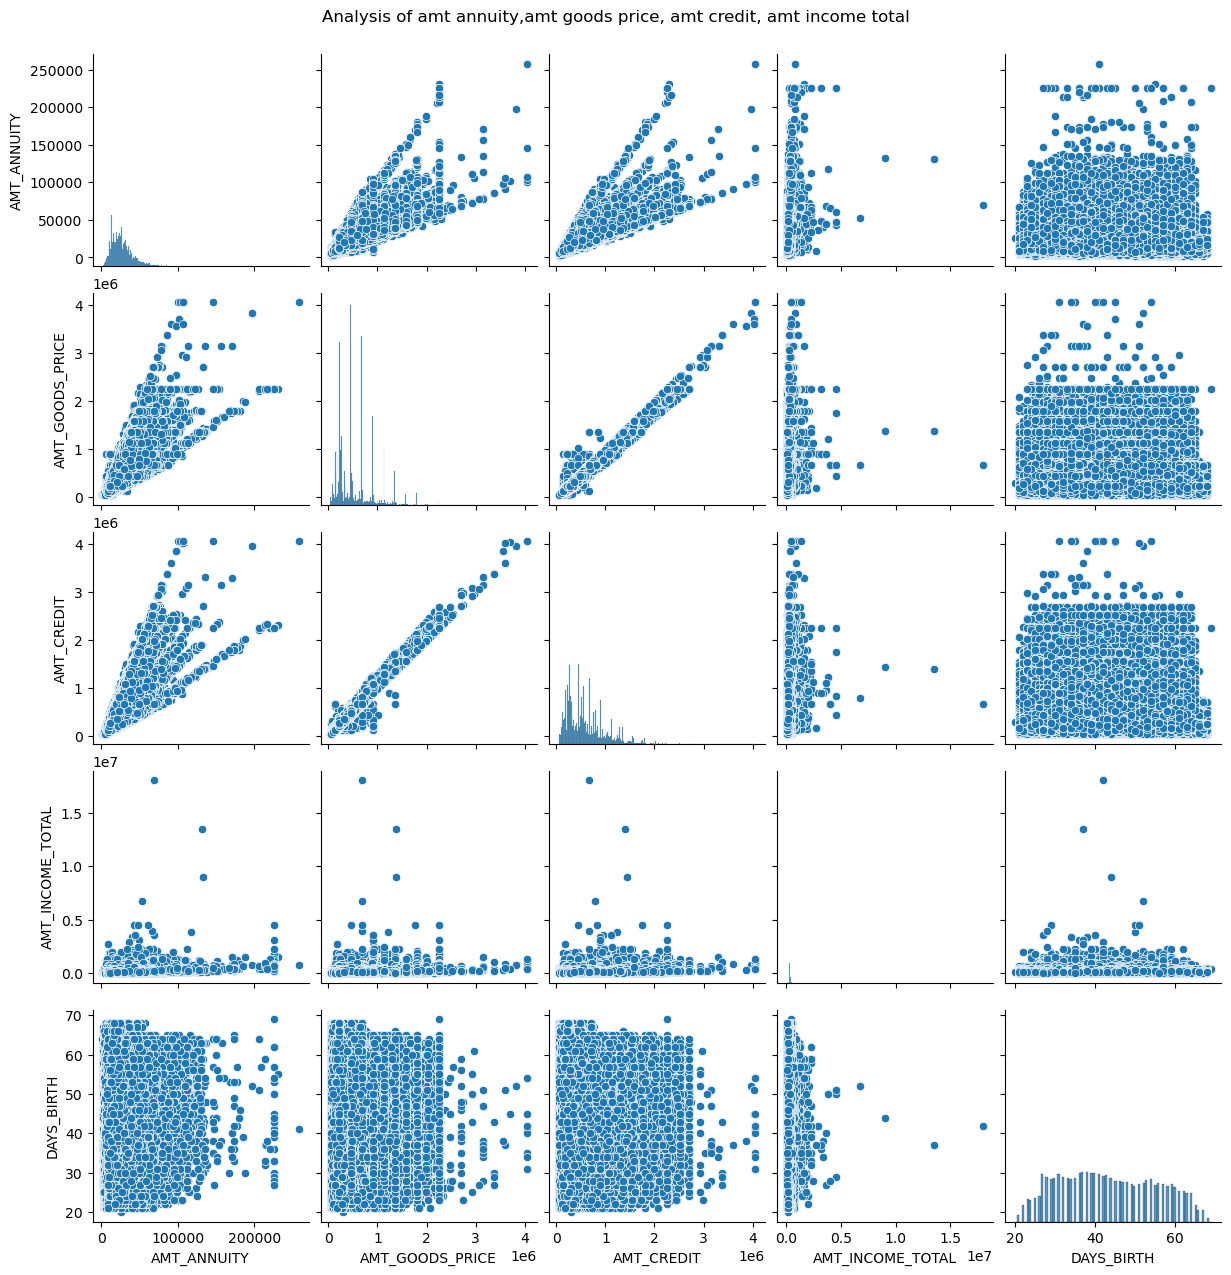

In [84]:
# analysis of all numerical column in the dataset
sns.pairplot(data = data1, vars = ["AMT_ANNUITY","AMT_GOODS_PRICE","AMT_CREDIT","AMT_INCOME_TOTAL","DAYS_BIRTH"])
plt.suptitle("Analysis of amt annuity,amt goods price, amt credit, amt income total", y=1.02)
plt.show()

- The correlation between an increase in the annuity amount and an increase in age is not very apparent in other words it is not   evident higher the amount annuty higher the age.

- AMT_ANNUITY and AMT_INCOME have very weak correlation but AMT_CREDIT(Credit amount of the loan) and AMT_GOODS_PRICE(it is the   price of the goods for which the loan is given) have strong linear correlation 

- Increase in good price and increase in credit amount increase in amount of annuity.





<Figure size 1500x800 with 0 Axes>

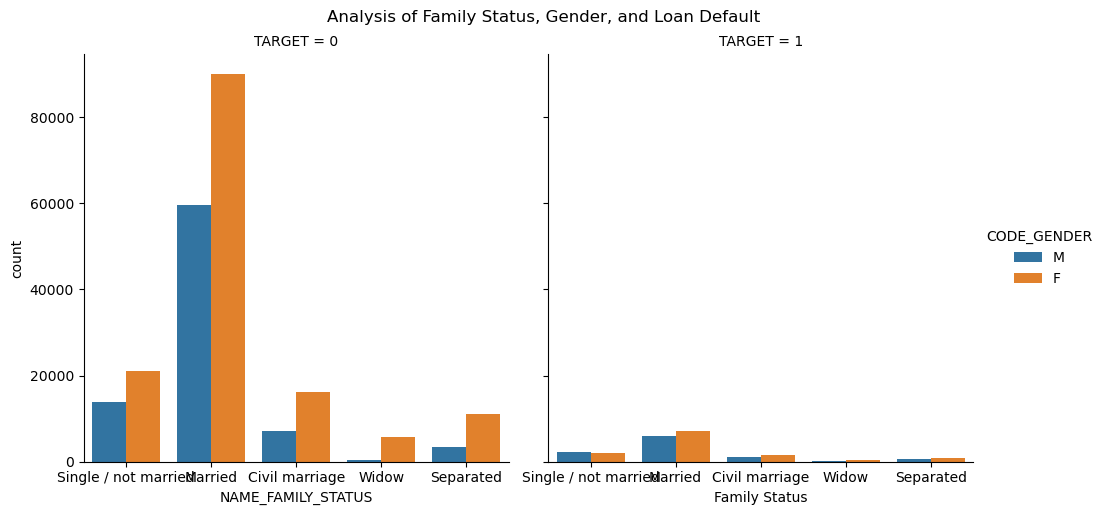

In [85]:
# Checking whch gender and which category of family status are more prone in defaulting the loans
plt.figure(figsize=(15, 8))
sns.catplot(x="NAME_FAMILY_STATUS", hue="CODE_GENDER", col="TARGET", data=Gender, kind="count")
plt.suptitle('Analysis of Family Status, Gender, and Loan Default', y= 1.02)
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()


In [86]:
# Segregate the age column into different beans
data1["age_bucket"] = pd.cut(data1.DAYS_BIRTH, [0,30,40,50,60,999], labels = ["<30","30-40","40-50","50-60","60+"])

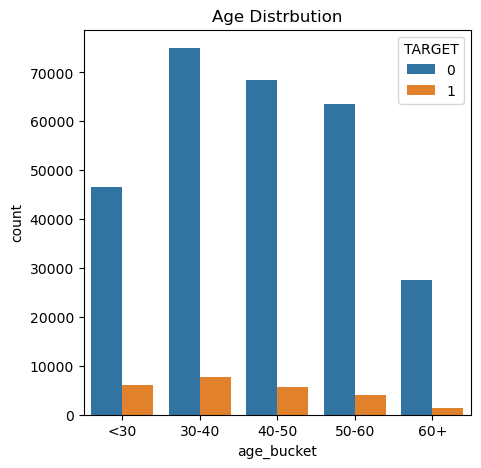

In [87]:
plt.figure(figsize =(5,5))
sns.countplot(x= "age_bucket", hue = "TARGET", data = data1)
plt.title("Age Distrbution")
plt.show()

#### Findind the correlation

In [88]:
data1[["AMT_ANNUITY","AMT_INCOME_TOTAL","DAYS_BIRTH"]].corr()

AMT_ANNUITY  AMT_INCOME_TOTAL  DAYS_BIRTH
AMT_ANNUITY          1.000000          0.417180   -0.009368
AMT_INCOME_TOTAL     0.417180          1.000000   -0.056371
DAYS_BIRTH          -0.009368         -0.056371    1.000000

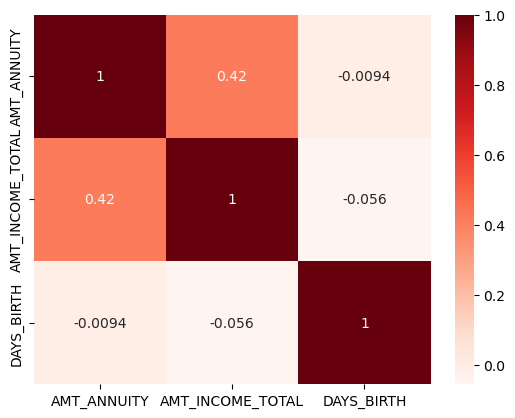

In [89]:
sns.heatmap(data1[["AMT_ANNUITY","AMT_INCOME_TOTAL","DAYS_BIRTH"]].corr(), annot = True, cmap = "Reds")
plt.show()

### What we infer from multivariate analysis:
- Females default on loans more frequently than men.
- Seconary educated clients are more frequently default on loan in comparison of other education types.
- Married people are taking more loans
- Individuals obtaining cash loans exhibit a higher tendency to default on their loan payments.
- Individuals who repay their loans on time tend to have higher incomes compared to those who do not.
- Secondary and higher educated people have higher income in comparison of other education types and we see in unvariated        anlysis also second educated people are more prone to take loan in comparison of other education types.
- Legal services are the one who are the earining higher income
- Business entity people are applying for more loans but there income is not high and there income is not low either
- Amount annuty and amount income is having strong positive correlation
- Age group 30- 40 are more prone to taking loans
- Amt_Annuity have weak correlation with AMT_Income_Total that we infer in above pair plot.

# segmented univariate analysis

In [90]:
# Dropping Unnecessary columns
data1.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"], axis = 1, inplace = True)
data1.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis = 1, inplace = True)

In [91]:
#segement the target variable between defaulters and non defaulters here 0 means non defaulters and 1 means defaulters
Target_data1 = data1[data1["TARGET"] == 0]

In [92]:
Target_data2 = data1[data1["TARGET"] == 1]

### Target_Data1

In [93]:
# Dropping Unnecessary columns
Target_data1.drop(["FLAG_DOCUMENT_9","DAYS_LAST_PHONE_CHANGE"],axis = 1,inplace = True)

In [94]:
Target_data1.shape

(280845, 46)

In [95]:
# Categorical columns
columns_categorical = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","CNT_CHILDREN","age_bucket","CNT_FAM_MEMBERS","REG_REGION_NOT_WORK_REGION","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","REGION_RATING_CLIENT","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [96]:
columns_categorical1 = columns_categorical[:12]

In [97]:
columns_categorical2 = columns_categorical[12:]

In [98]:
columns_categorical1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_CHILDREN',
 'age_bucket']

In [99]:
len(columns_categorical)

28

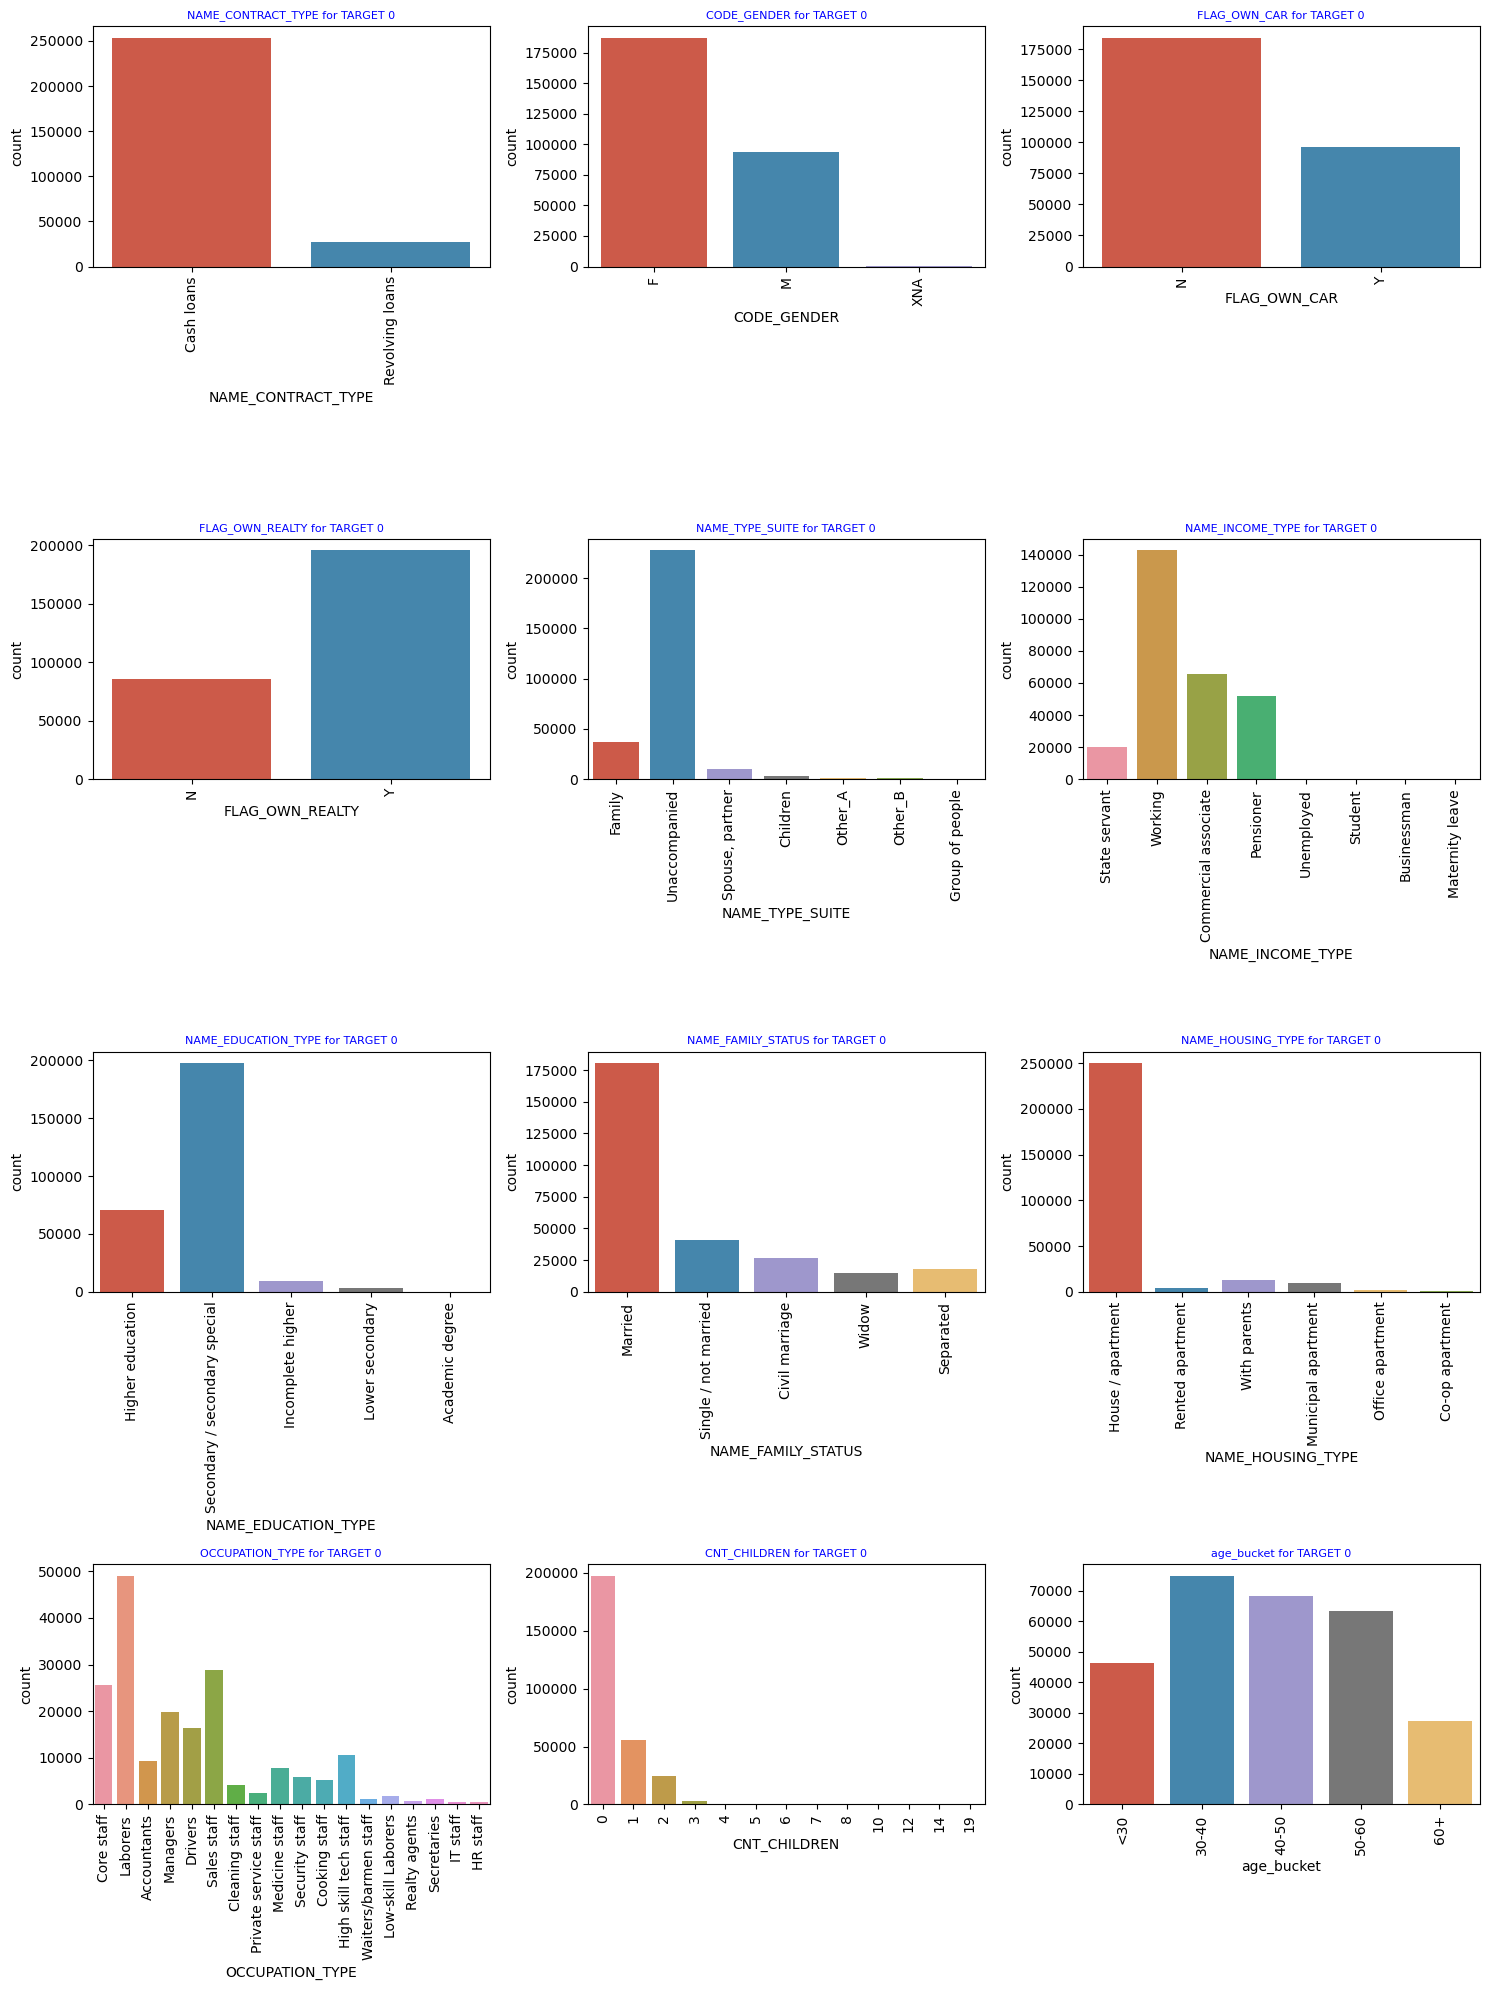

In [100]:
# Create subplots
fig, axes = plt.subplots(nrows= 4, ncols= 3, figsize=(15,20))
axes = axes.flatten()
for i, column in enumerate(columns_categorical1):
    plt.style.use("ggplot")
    sns.countplot(x=column, data=Target_data1, ax=axes[i])
    axes[i].set_title(f'{column} for TARGET 0',color = "blue", fontsize = 8)
    axes[i].tick_params(axis='x', rotation=90)
    
    
plt.tight_layout()
plt.show()

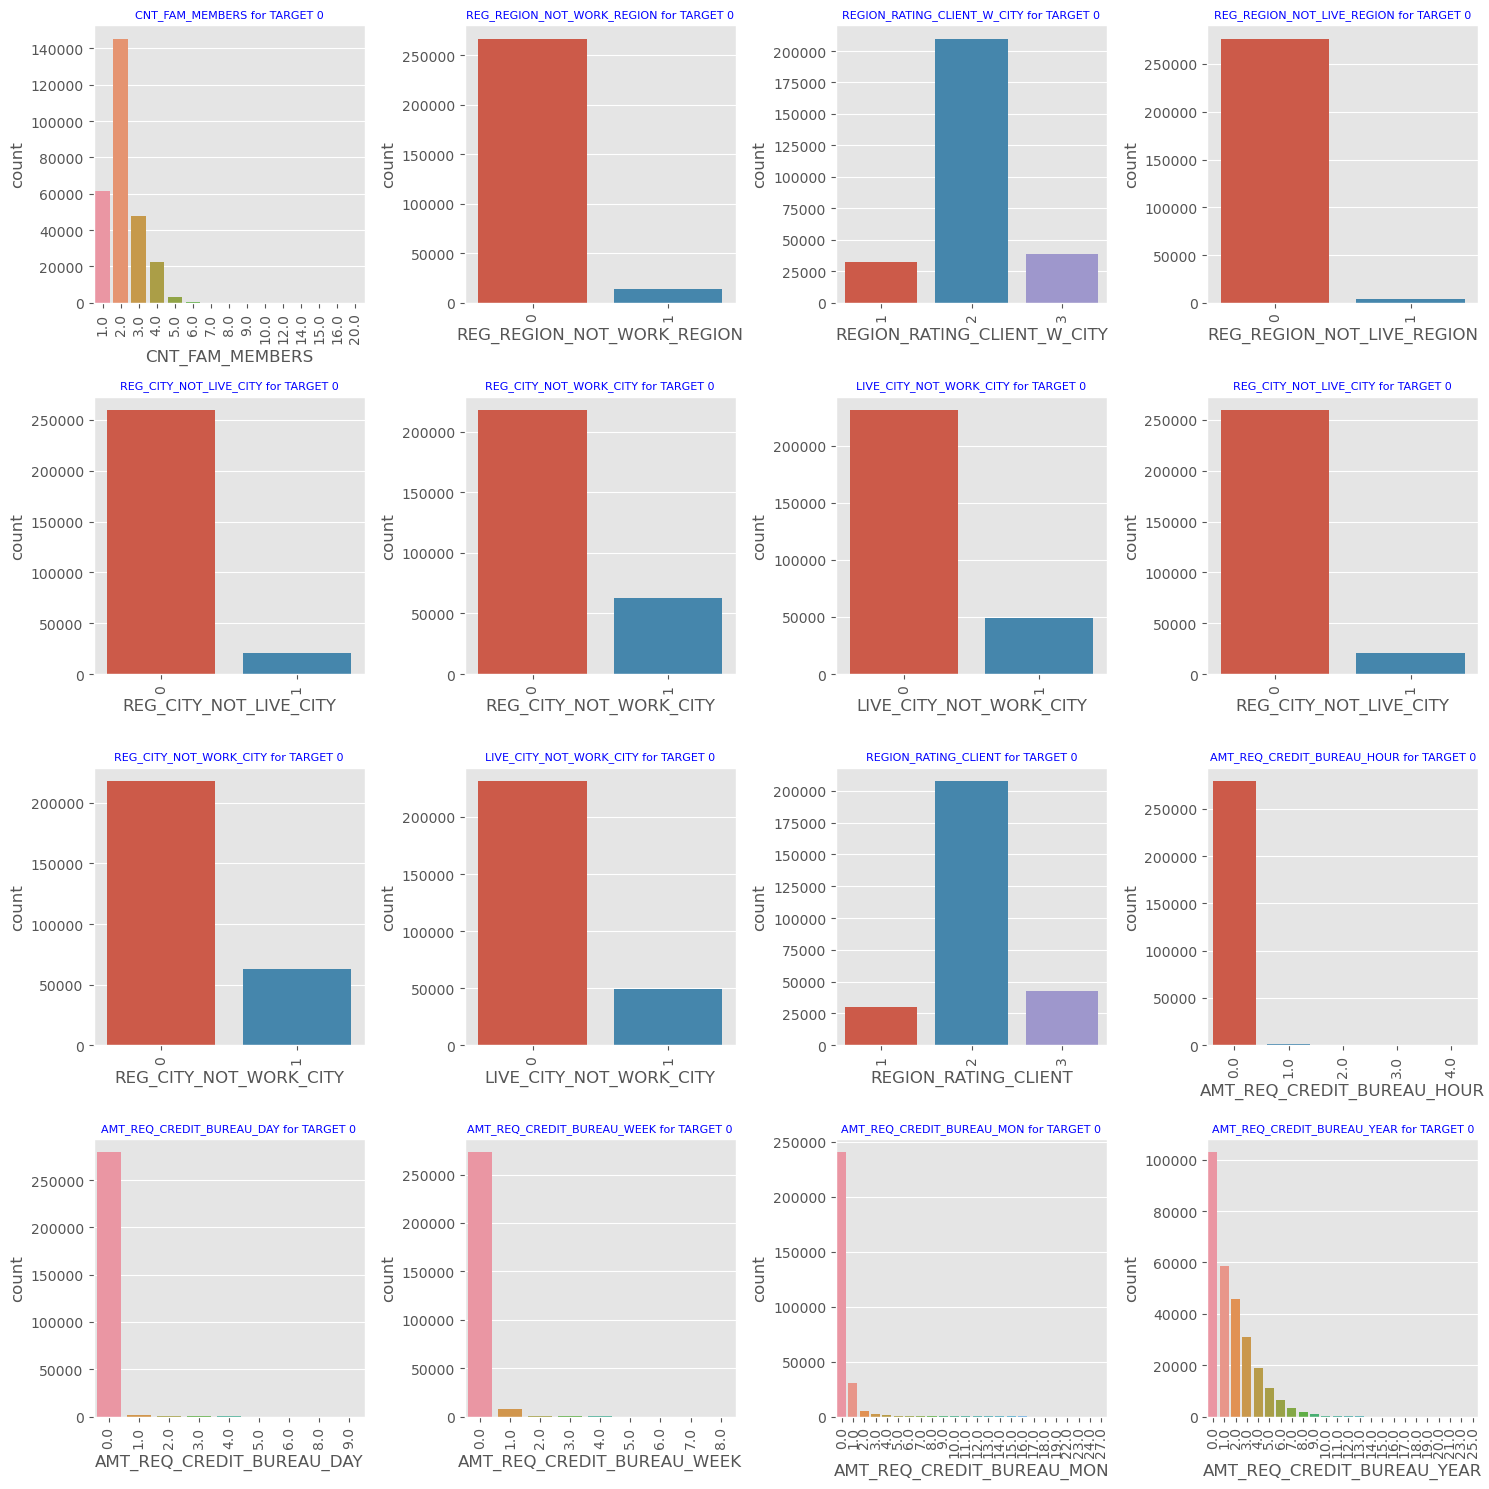

In [101]:
# Create subplots
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize=(15,15))
axes = axes.flatten()
for i, column in enumerate(columns_categorical2):
    plt.style.use("ggplot")
    sns.countplot(x=column, data=Target_data1, ax=axes[i])
    axes[i].set_title(f'{column} for TARGET 0',color = "blue", fontsize = 8)
    axes[i].tick_params(axis='x', rotation=90)
   
plt.tight_layout()
plt.show()

In [102]:
# This all are numerical columns
numerical_columns = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_BIRTH","EXT_SOURCE_2","EXT_SOURCE_3","DAYS_EMPLOYED"]

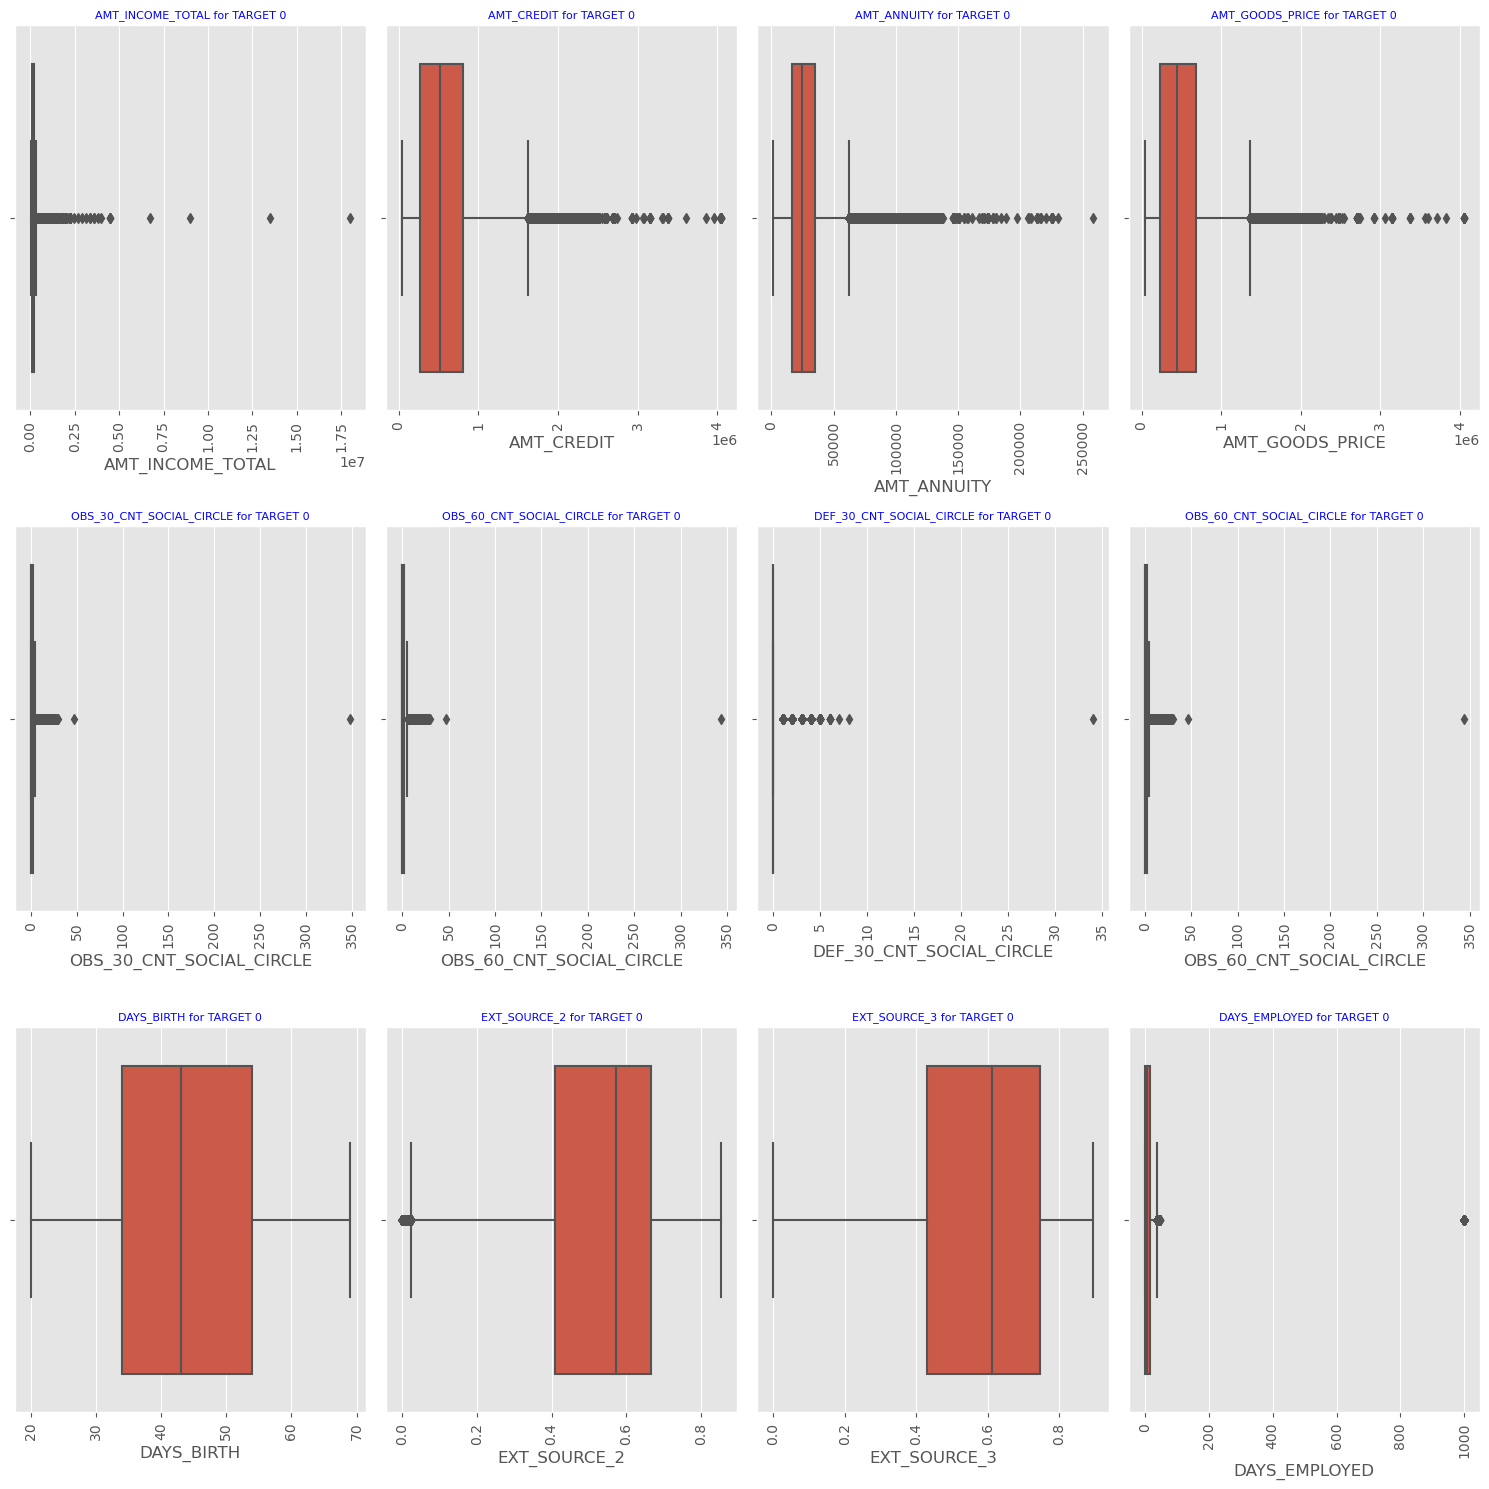

In [103]:
# Create subplots
fig, axes = plt.subplots(nrows= 3, ncols= 4, figsize=(15,15))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    plt.style.use("ggplot")
    sns.boxplot(x=column, data=Target_data1, ax=axes[i])
    axes[i].set_title(f'{column} for TARGET 0',color = "blue", fontsize = 8)
    axes[i].tick_params(axis='x', rotation=90)
   
plt.tight_layout()
plt.show()

### segregation of income column

In [104]:
Target_data1["income bucket"] = pd.qcut(Target_data1['AMT_INCOME_TOTAL'], q=[0, 0.25, 0.50, 0.75, 1], labels=["L", "M", "H", "VH"])


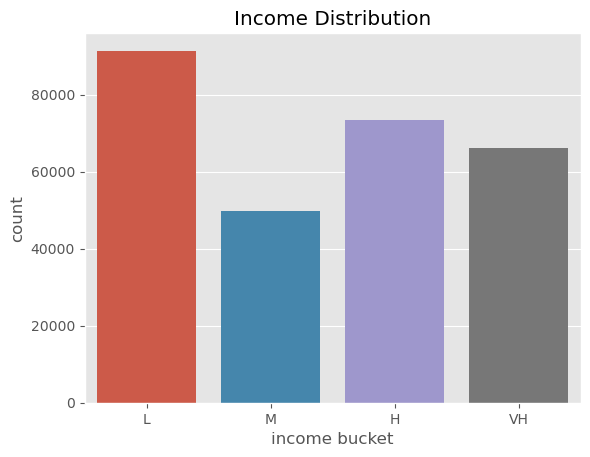

In [105]:
plt.style.use("ggplot")
sns.countplot(x="income bucket", data=Target_data1)
plt.title("Income Distribution")
plt.show()

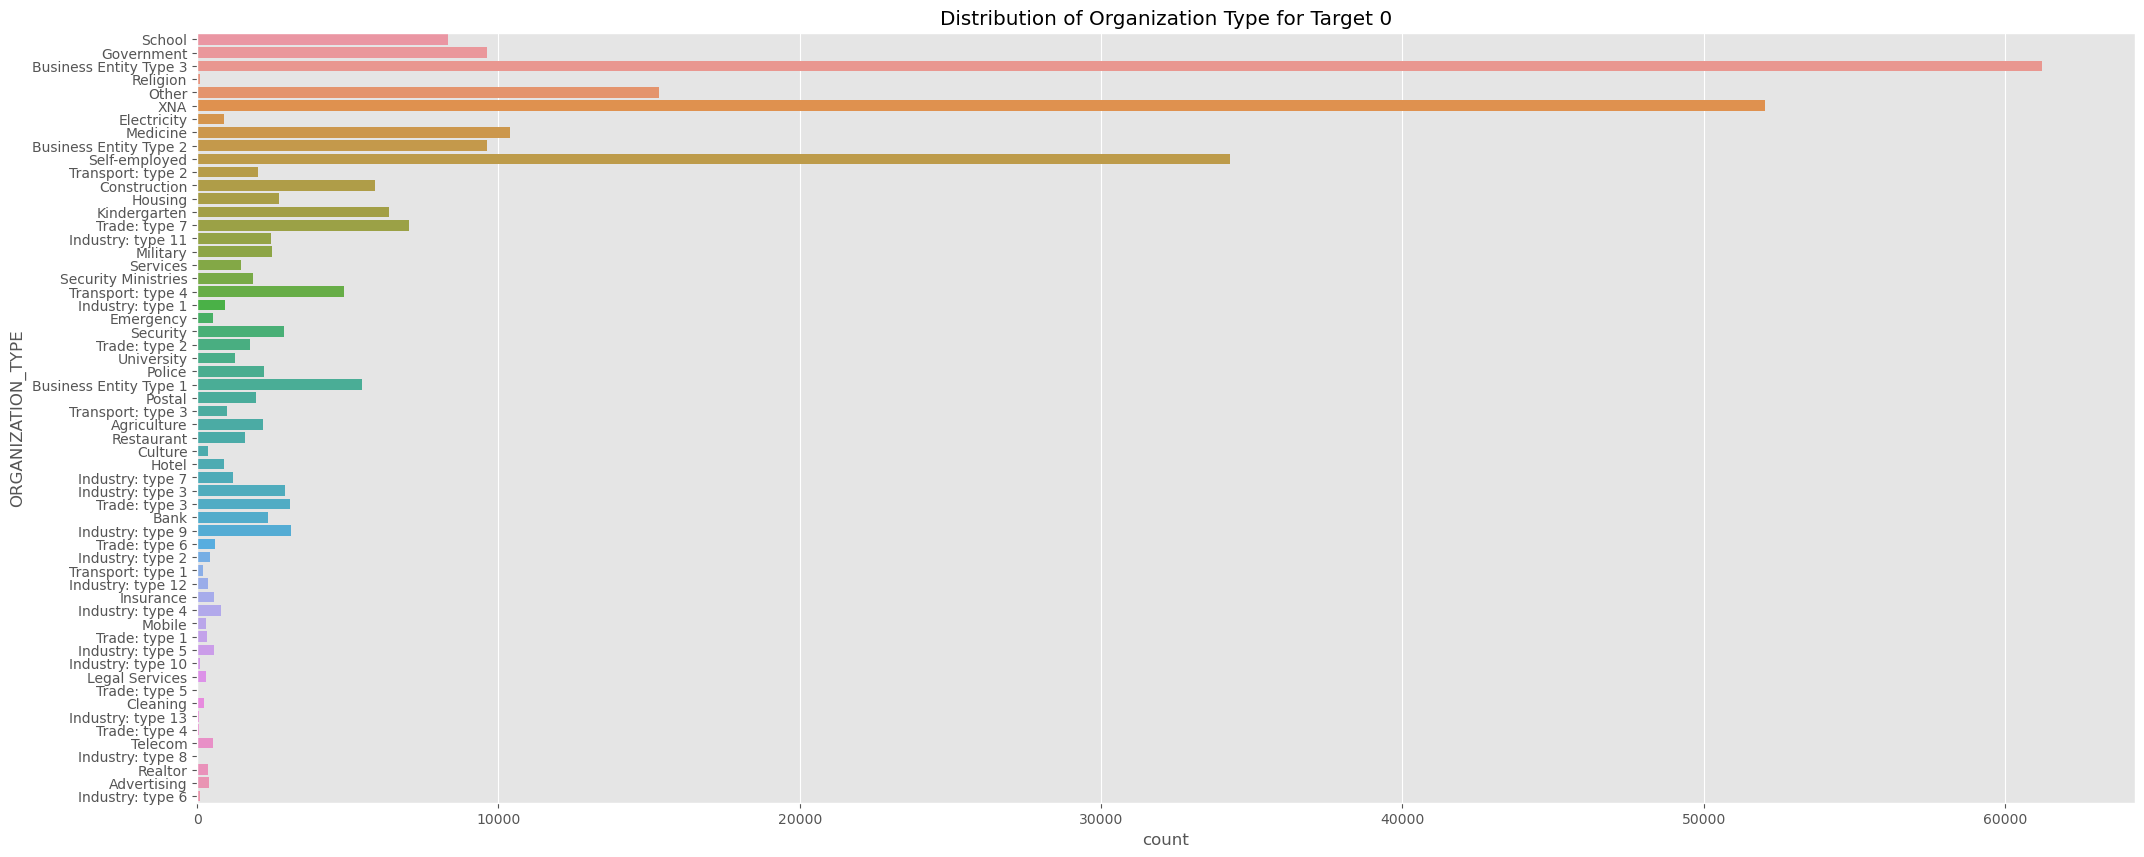

In [106]:
# Checking the distribution of Organization type for Target 0
plt.figure(figsize =(25,10))
plt.style.use("ggplot")
sns.countplot(y="ORGANIZATION_TYPE", data=Target_data1)
plt.title("Distribution of Organization Type for Target 0")
plt.show()

In [107]:
col2 = ["NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","NAME_INCOME_TYPE","CODE_GENDER"]

In [108]:
plt.style.use("default")

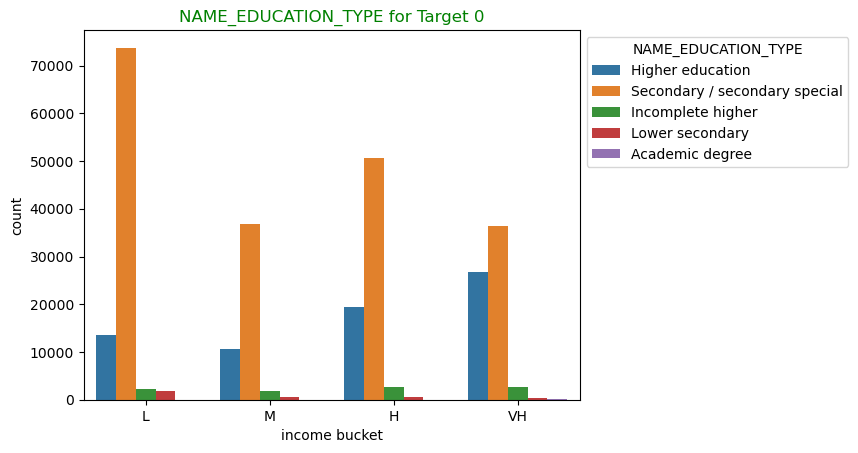

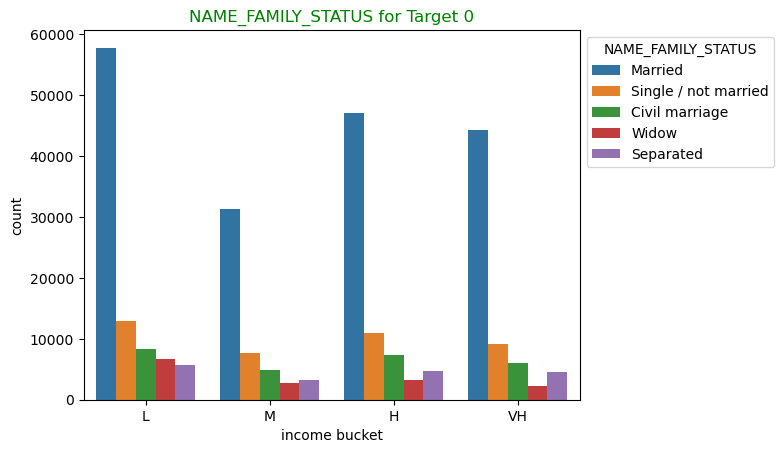

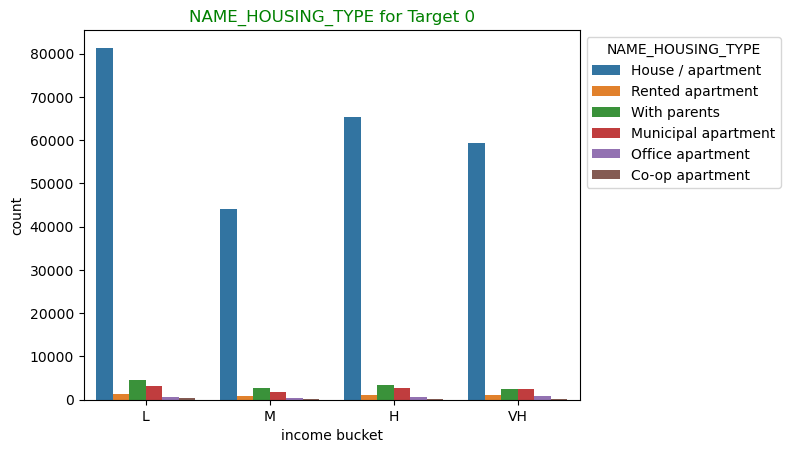

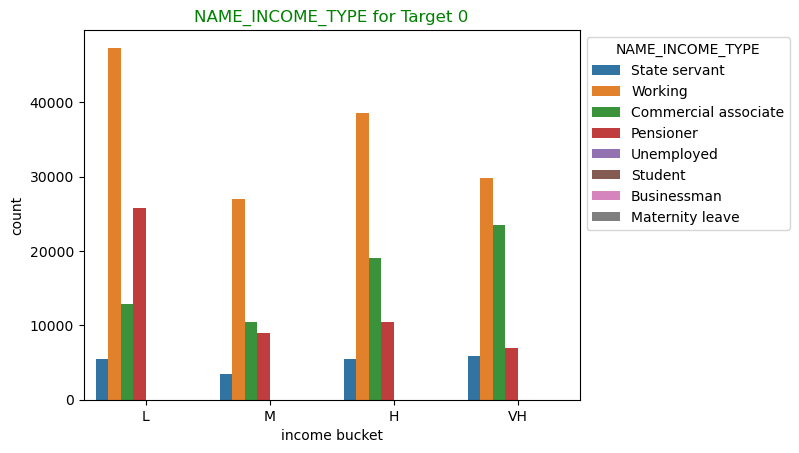

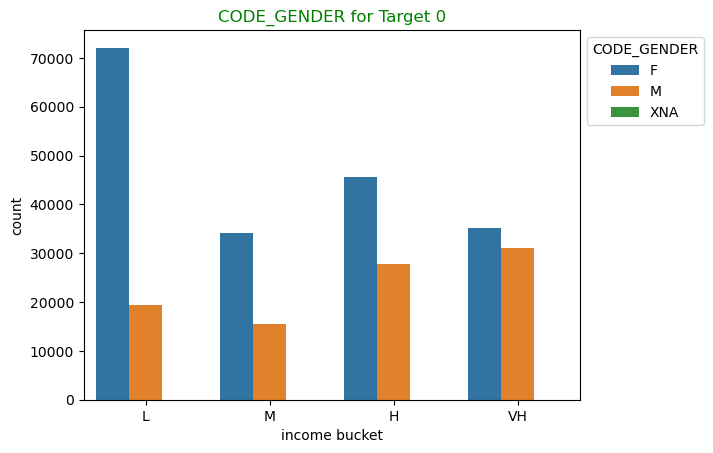

In [109]:
for i in col2:
    sns.countplot(x='income bucket', hue=i , data=Target_data1)
    plt.legend(title= i , loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f"{i} for Target 0", color = "green")
    plt.show()

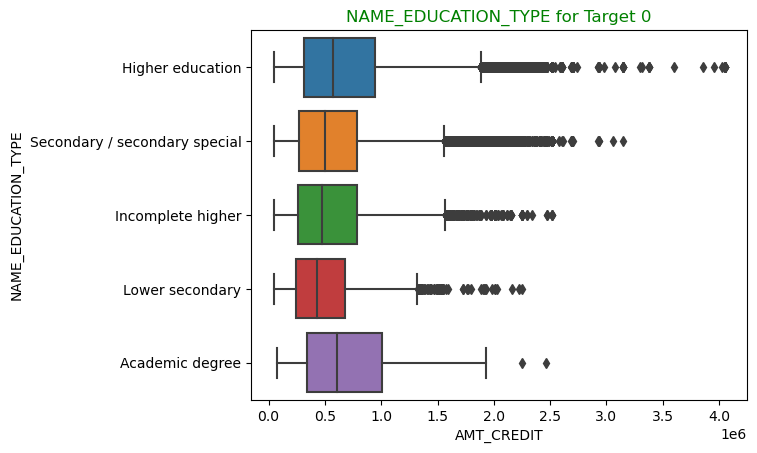

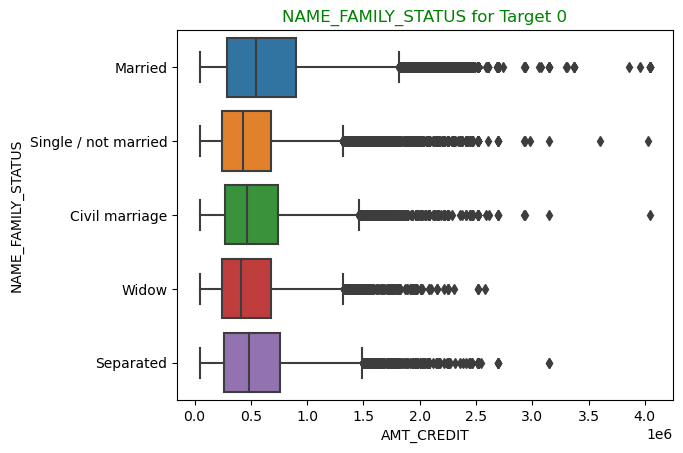

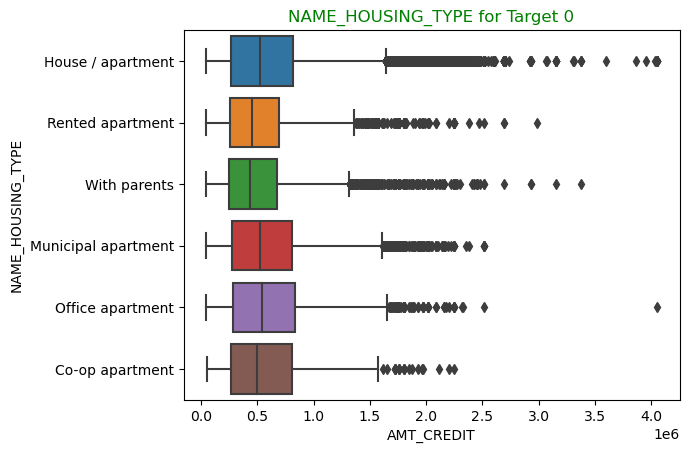

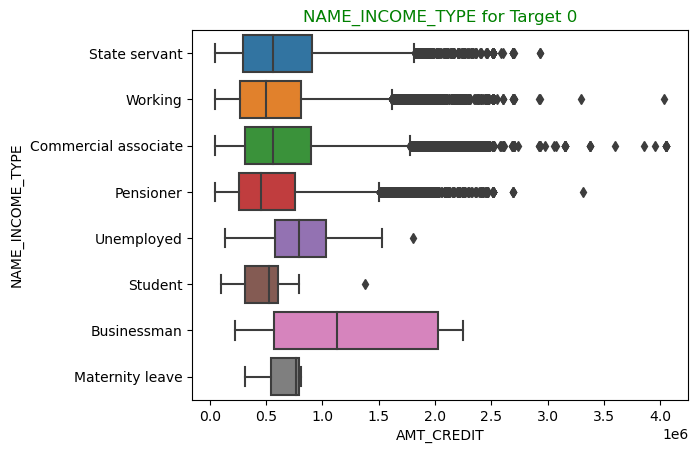

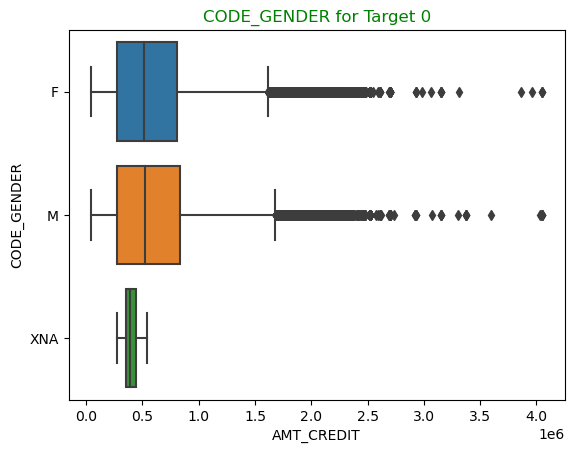

In [110]:
for i in col2:
    sns.boxplot(x='AMT_CREDIT', y= i , data=Target_data1)
    plt.title(f"{i} for Target 0", color = "green")
    plt.show()


### Top 10 Correlation with respect of Target 0

In [111]:
res = Target_data1[["CNT_CHILDREN","DAYS_BIRTH","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].corr()

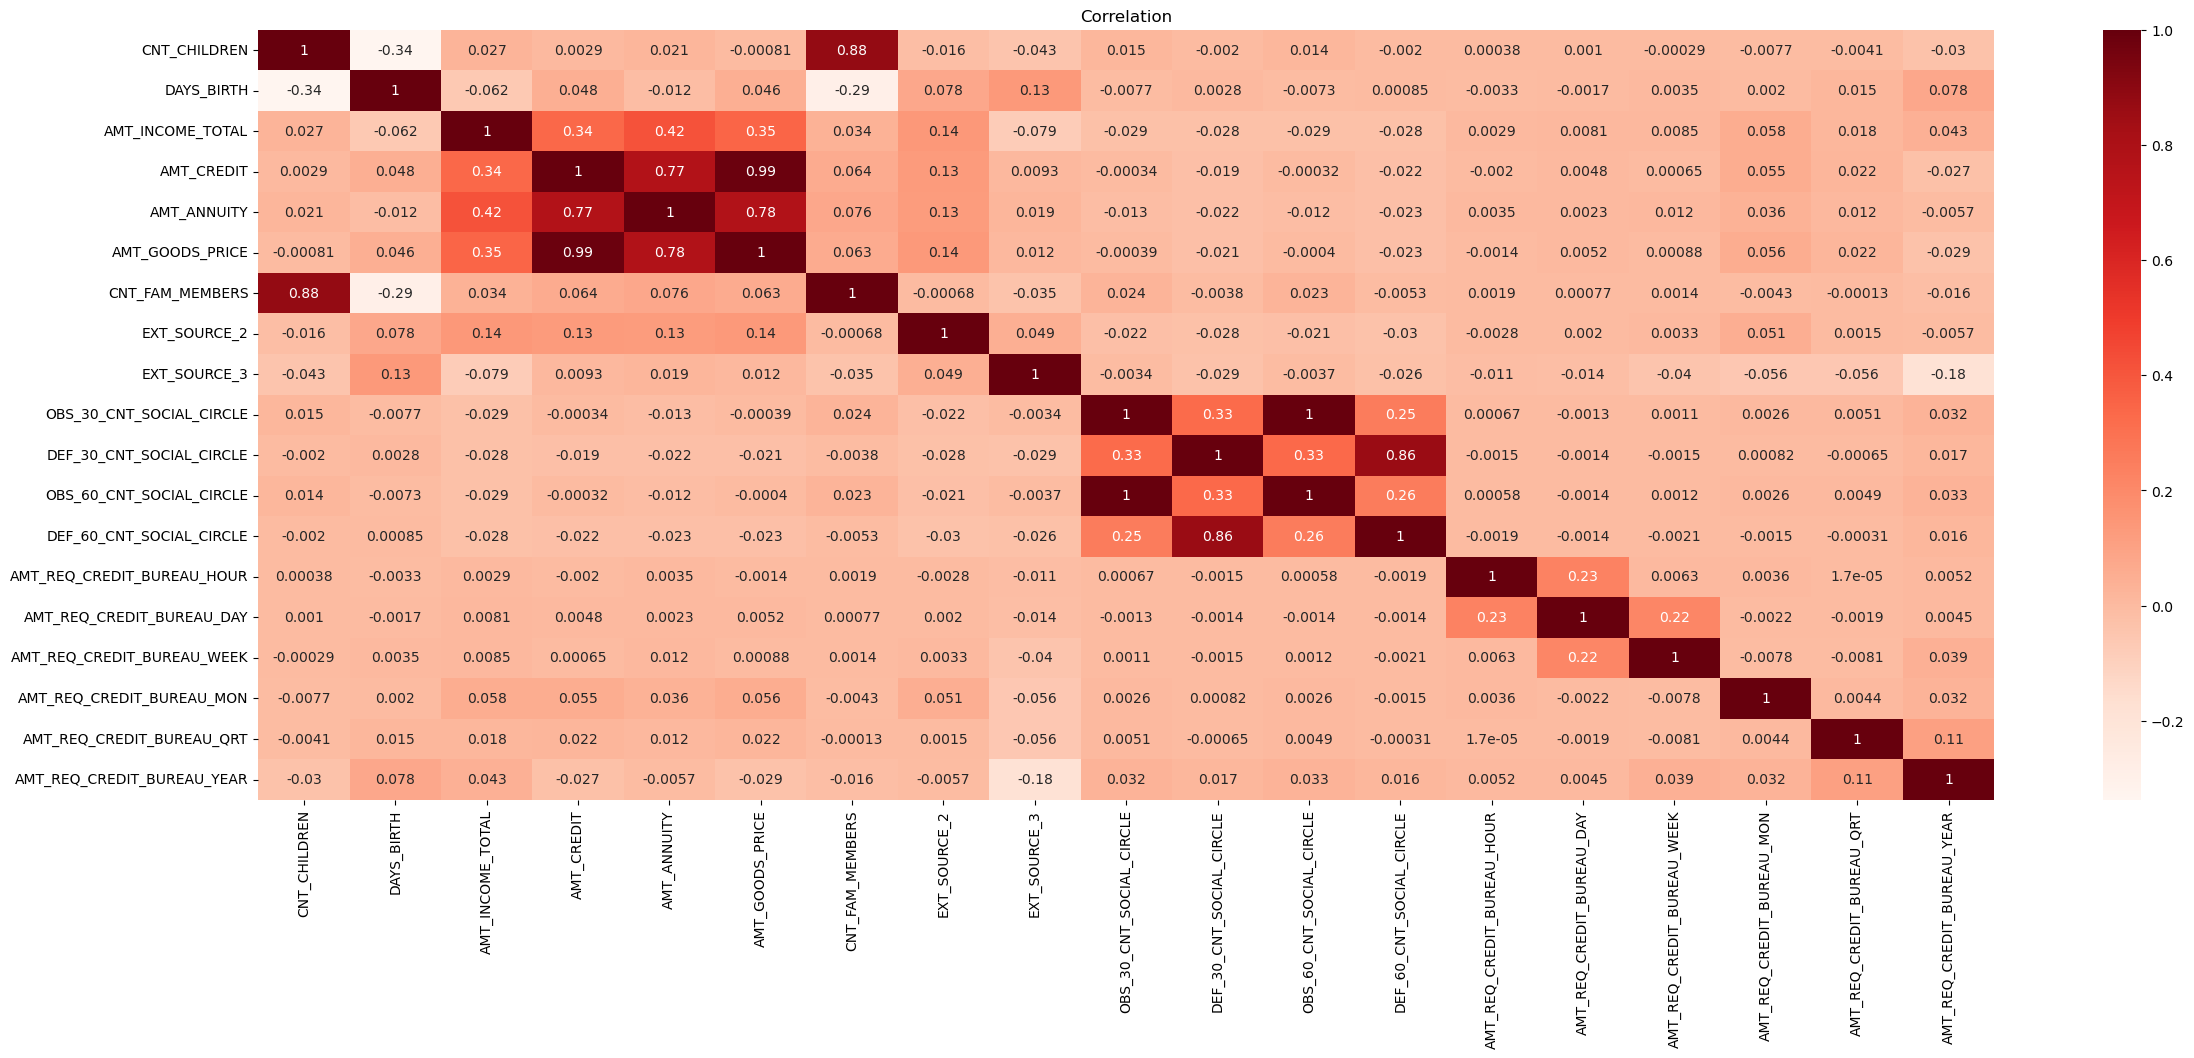

In [112]:
plt.figure(figsize = (28,10))
sns.heatmap(res, cmap = "Reds",annot = True)
plt.title("Correlation")
plt.show()

In [113]:
top_correlations = res.unstack().sort_values(ascending=False).drop_duplicates().iloc[1:11]


In [114]:
print(top_correlations)

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998515
AMT_GOODS_PRICE           AMT_CREDIT                  0.987262
CNT_CHILDREN              CNT_FAM_MEMBERS             0.878612
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.859498
AMT_GOODS_PRICE           AMT_ANNUITY                 0.776715
AMT_CREDIT                AMT_ANNUITY                 0.771167
AMT_INCOME_TOTAL          AMT_ANNUITY                 0.418268
                          AMT_GOODS_PRICE             0.348664
                          AMT_CREDIT                  0.341744
OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.331733
dtype: float64


- Individuals who make timely loan payments do not own a car.
- Working Professionals are more likely to pay loan on time.
- Occupation type "Laborer" are more apply for loans
- Individuals with a family size of 2 are mostly take loans.
- Those with zero inquiries to the Credit Bureau are more likely to repay loan.
- Individuals in the low-income bracket exhibit a higher tendency to meet their loan obligations on time.
- Applicants with a higher education level tend to request larger loan amount

### Target_data2

In [115]:
Target_data2.drop(["FLAG_DOCUMENT_9","DAYS_LAST_PHONE_CHANGE"],axis = 1,inplace = True)

In [116]:
columns_categorical_2 = ["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE","CNT_CHILDREN","age_bucket","CNT_FAM_MEMBERS","REG_REGION_NOT_WORK_REGION","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","REGION_RATING_CLIENT","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [117]:
columns_categorical_3 = columns_categorical_2[:12]
columns_categorical_4 = columns_categorical_2[12:]

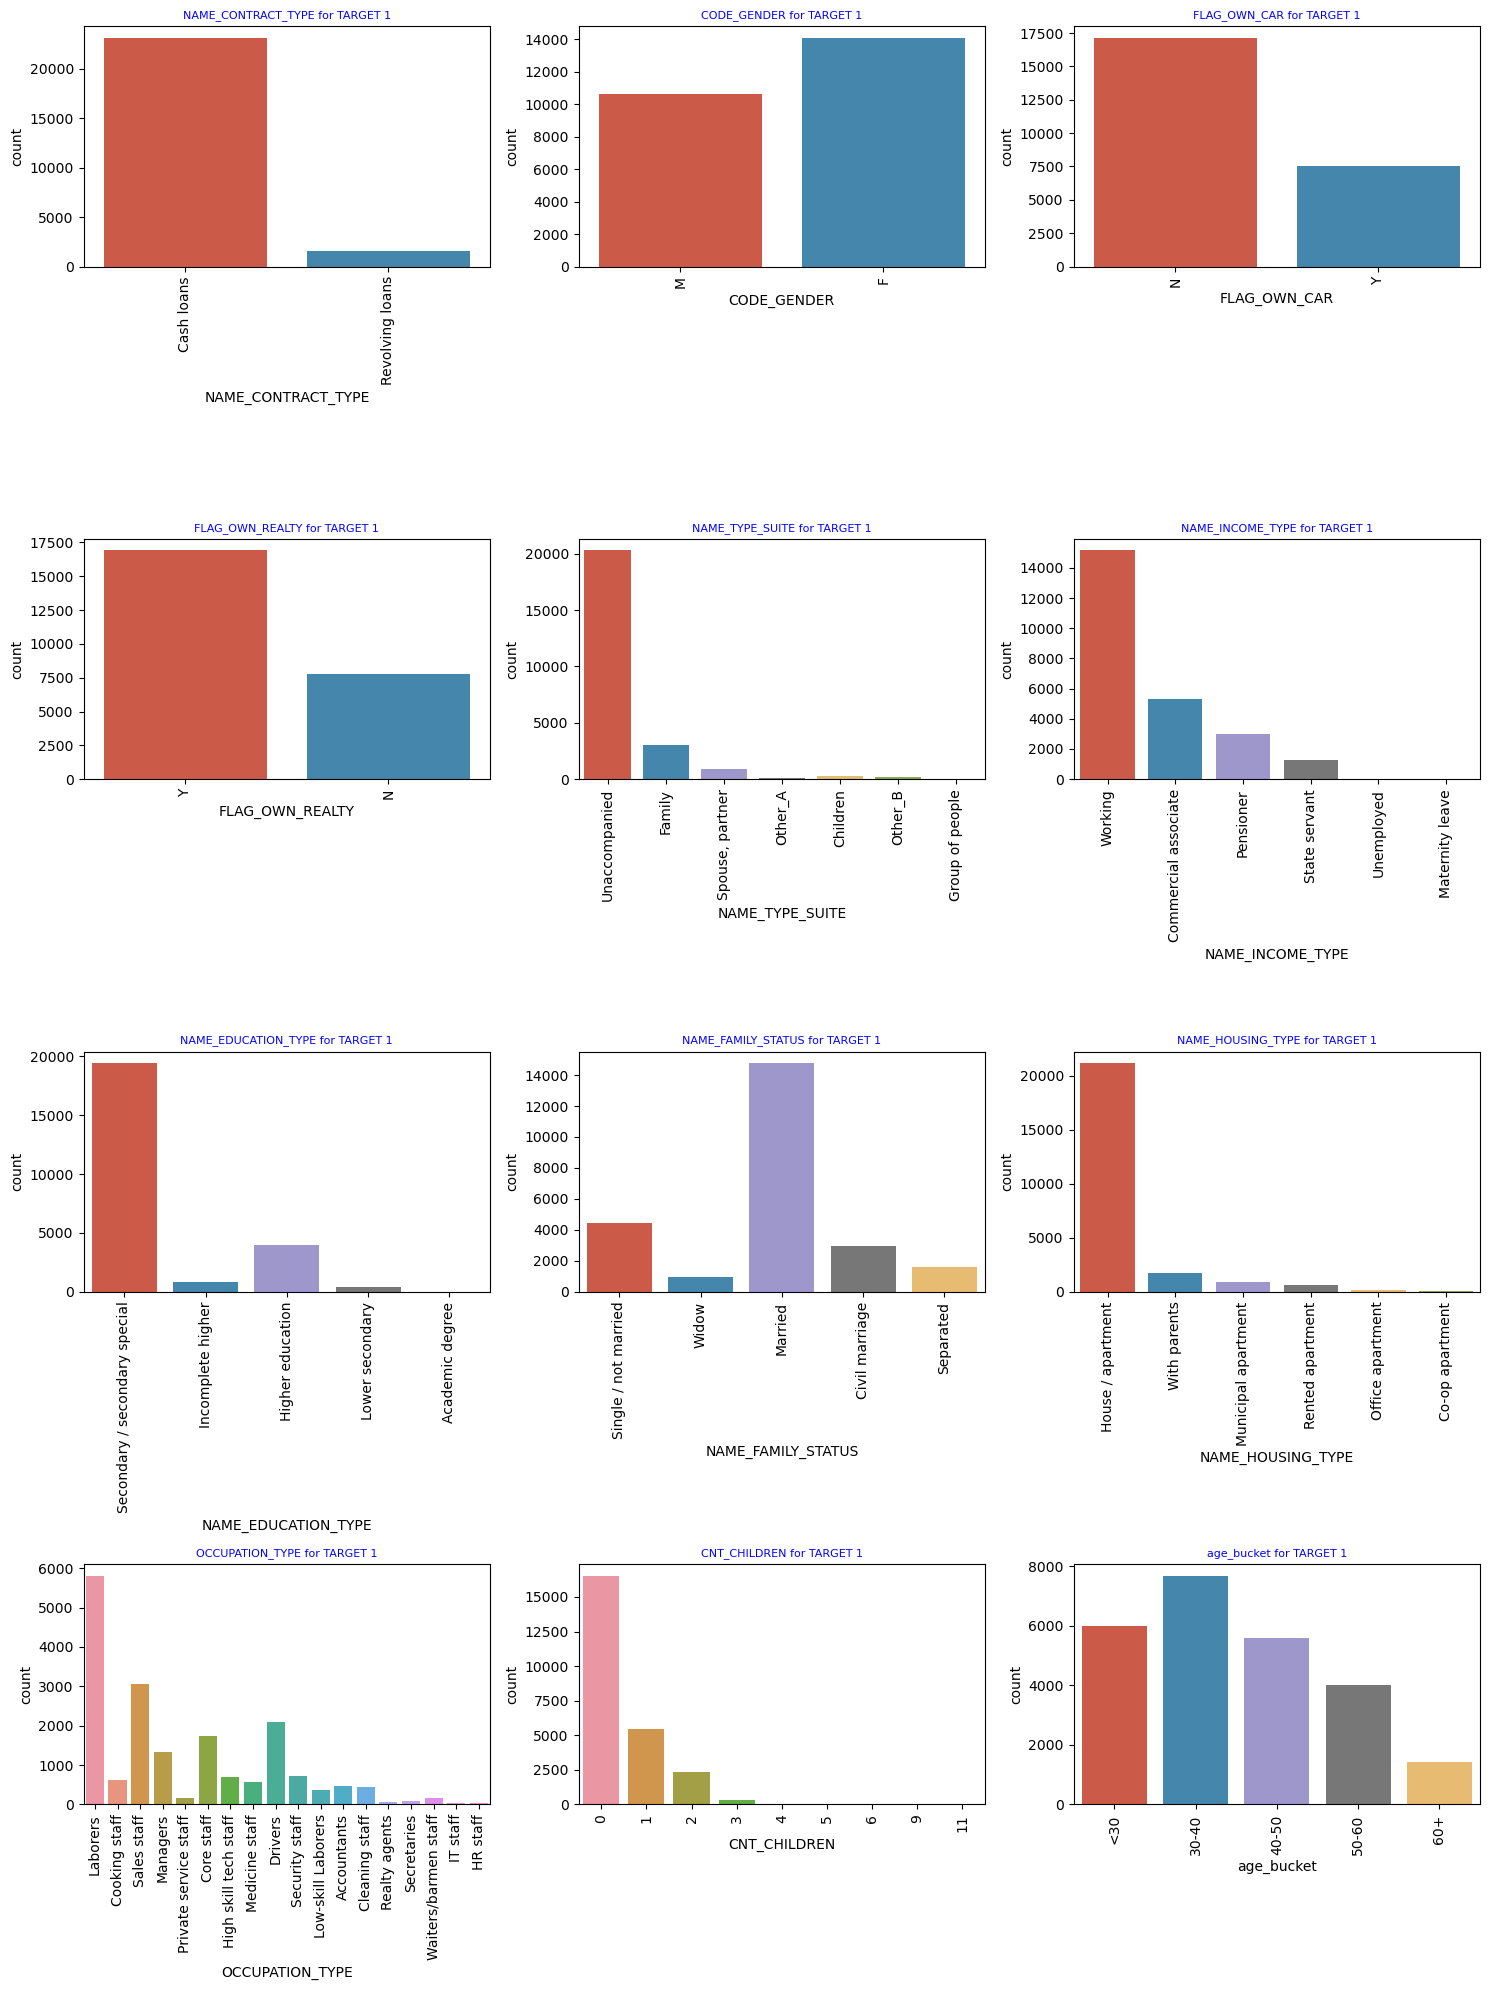

In [118]:
# Create subplots
fig, axes = plt.subplots(nrows= 4, ncols= 3, figsize=(15,20))
axes = axes.flatten()
for i, column in enumerate(columns_categorical_3):
    plt.style.use("ggplot")
    sns.countplot(x=column, data=Target_data2, ax=axes[i])
    axes[i].set_title(f'{column} for TARGET 1',color = "blue", fontsize = 8)
    axes[i].tick_params(axis='x', rotation=90)
    
    
plt.tight_layout()
plt.show()

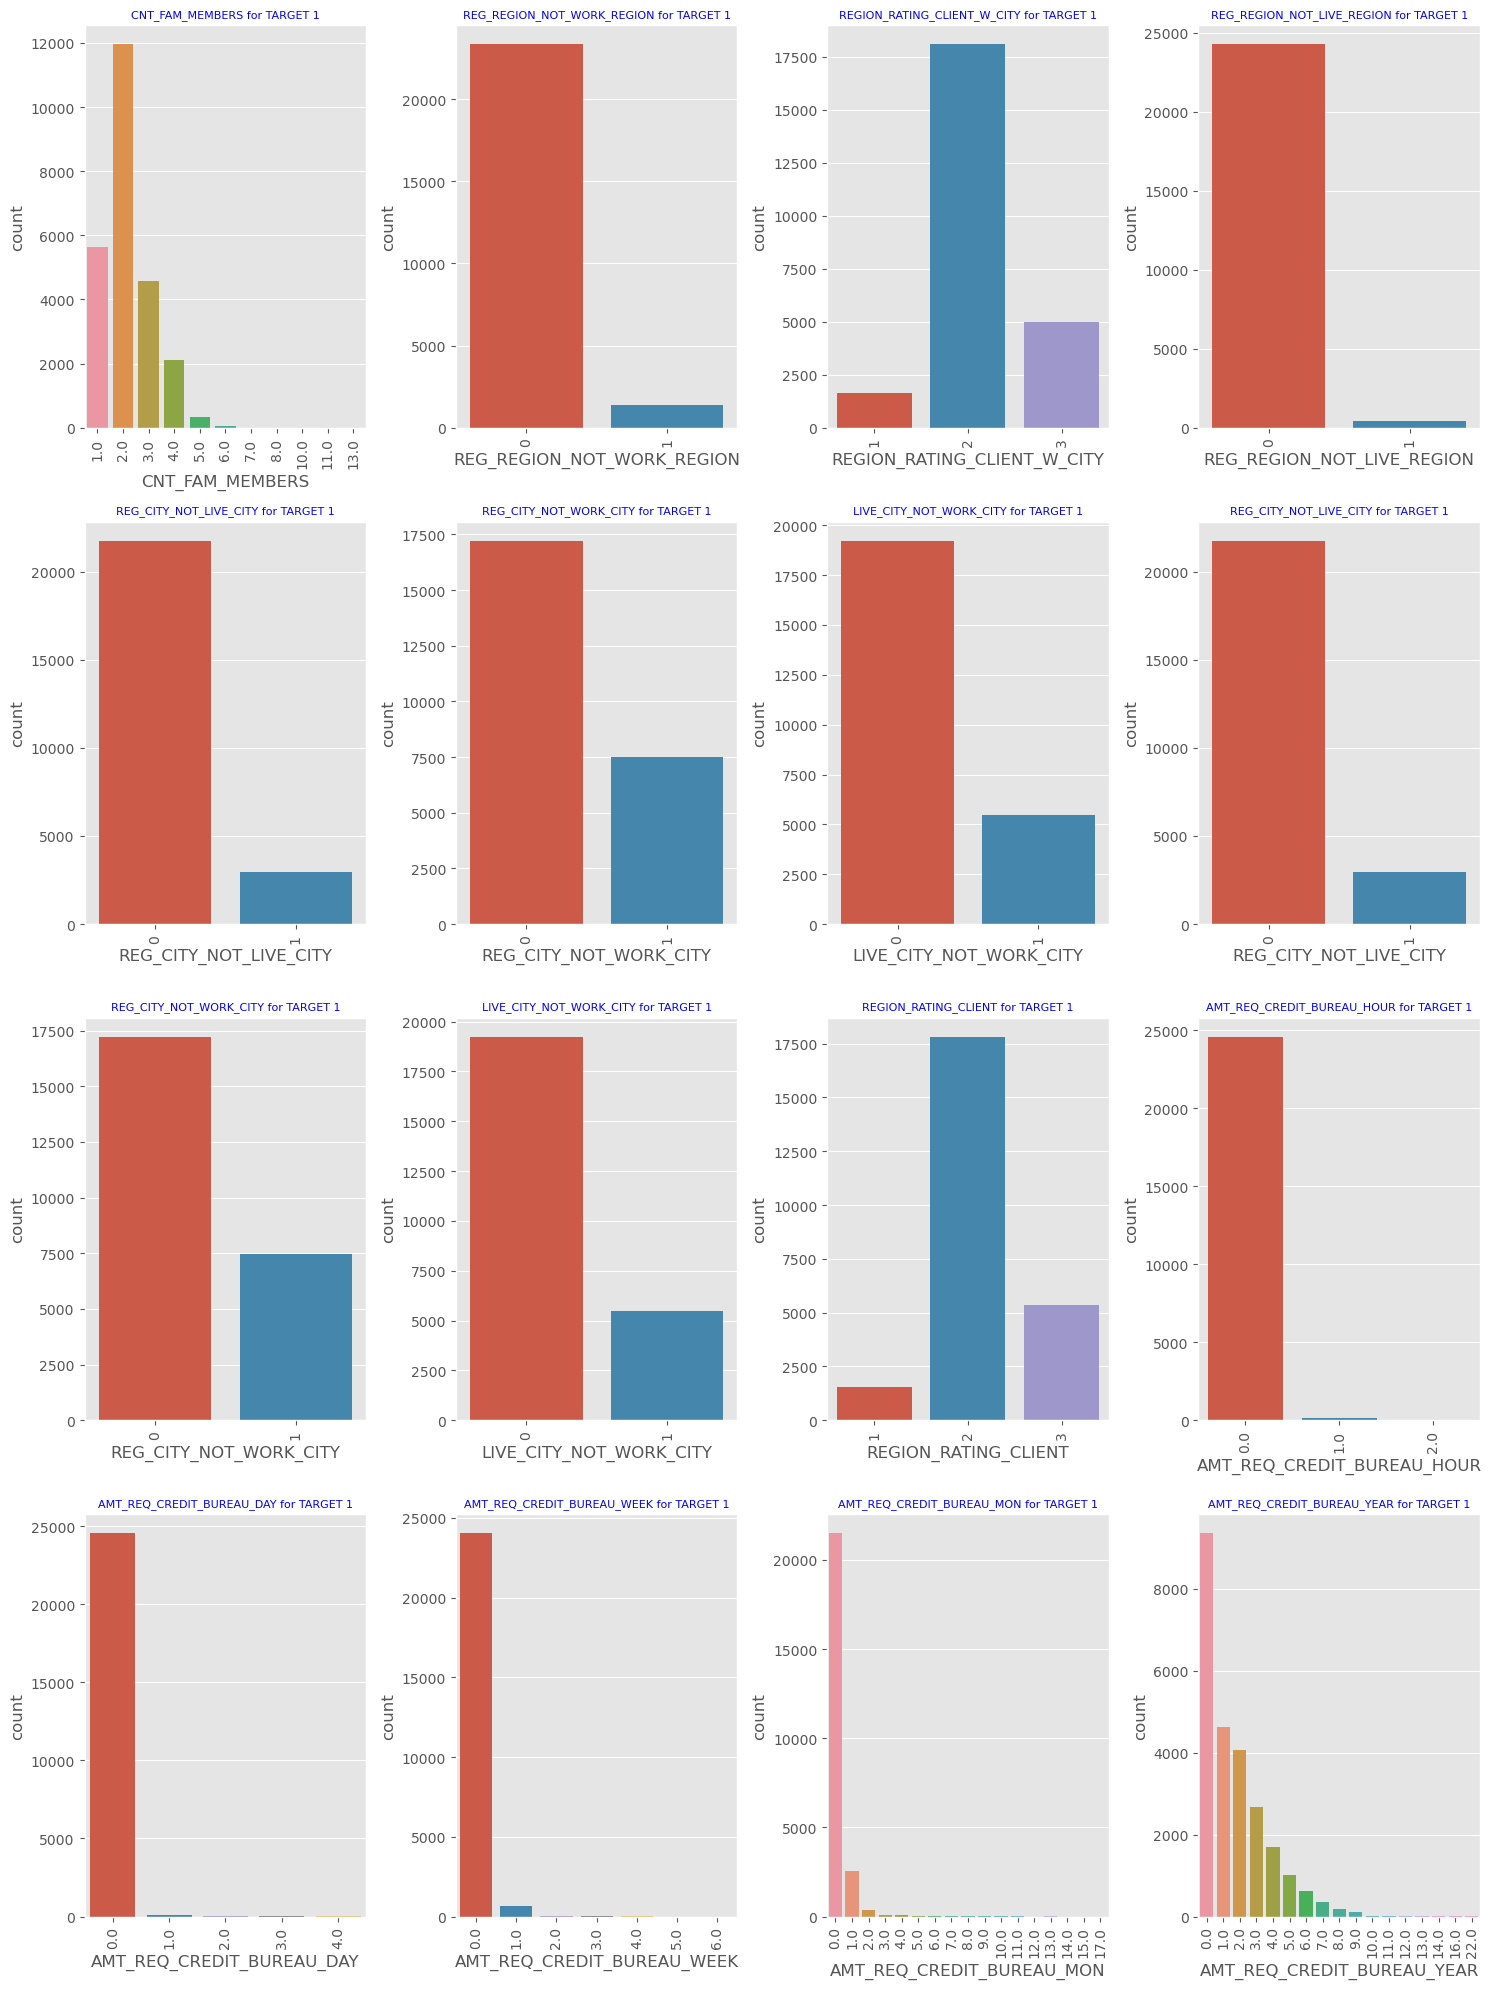

In [119]:
# Create subplots
fig, axes = plt.subplots(nrows= 4, ncols= 4, figsize=(15,20))
axes = axes.flatten()
for i, column in enumerate(columns_categorical_4):
    plt.style.use("ggplot")
    sns.countplot(x=column, data=Target_data2, ax=axes[i])
    axes[i].set_title(f'{column} for TARGET 1',color = "blue", fontsize = 8)
    axes[i].tick_params(axis='x', rotation=90)
    
    
plt.tight_layout()
plt.show()

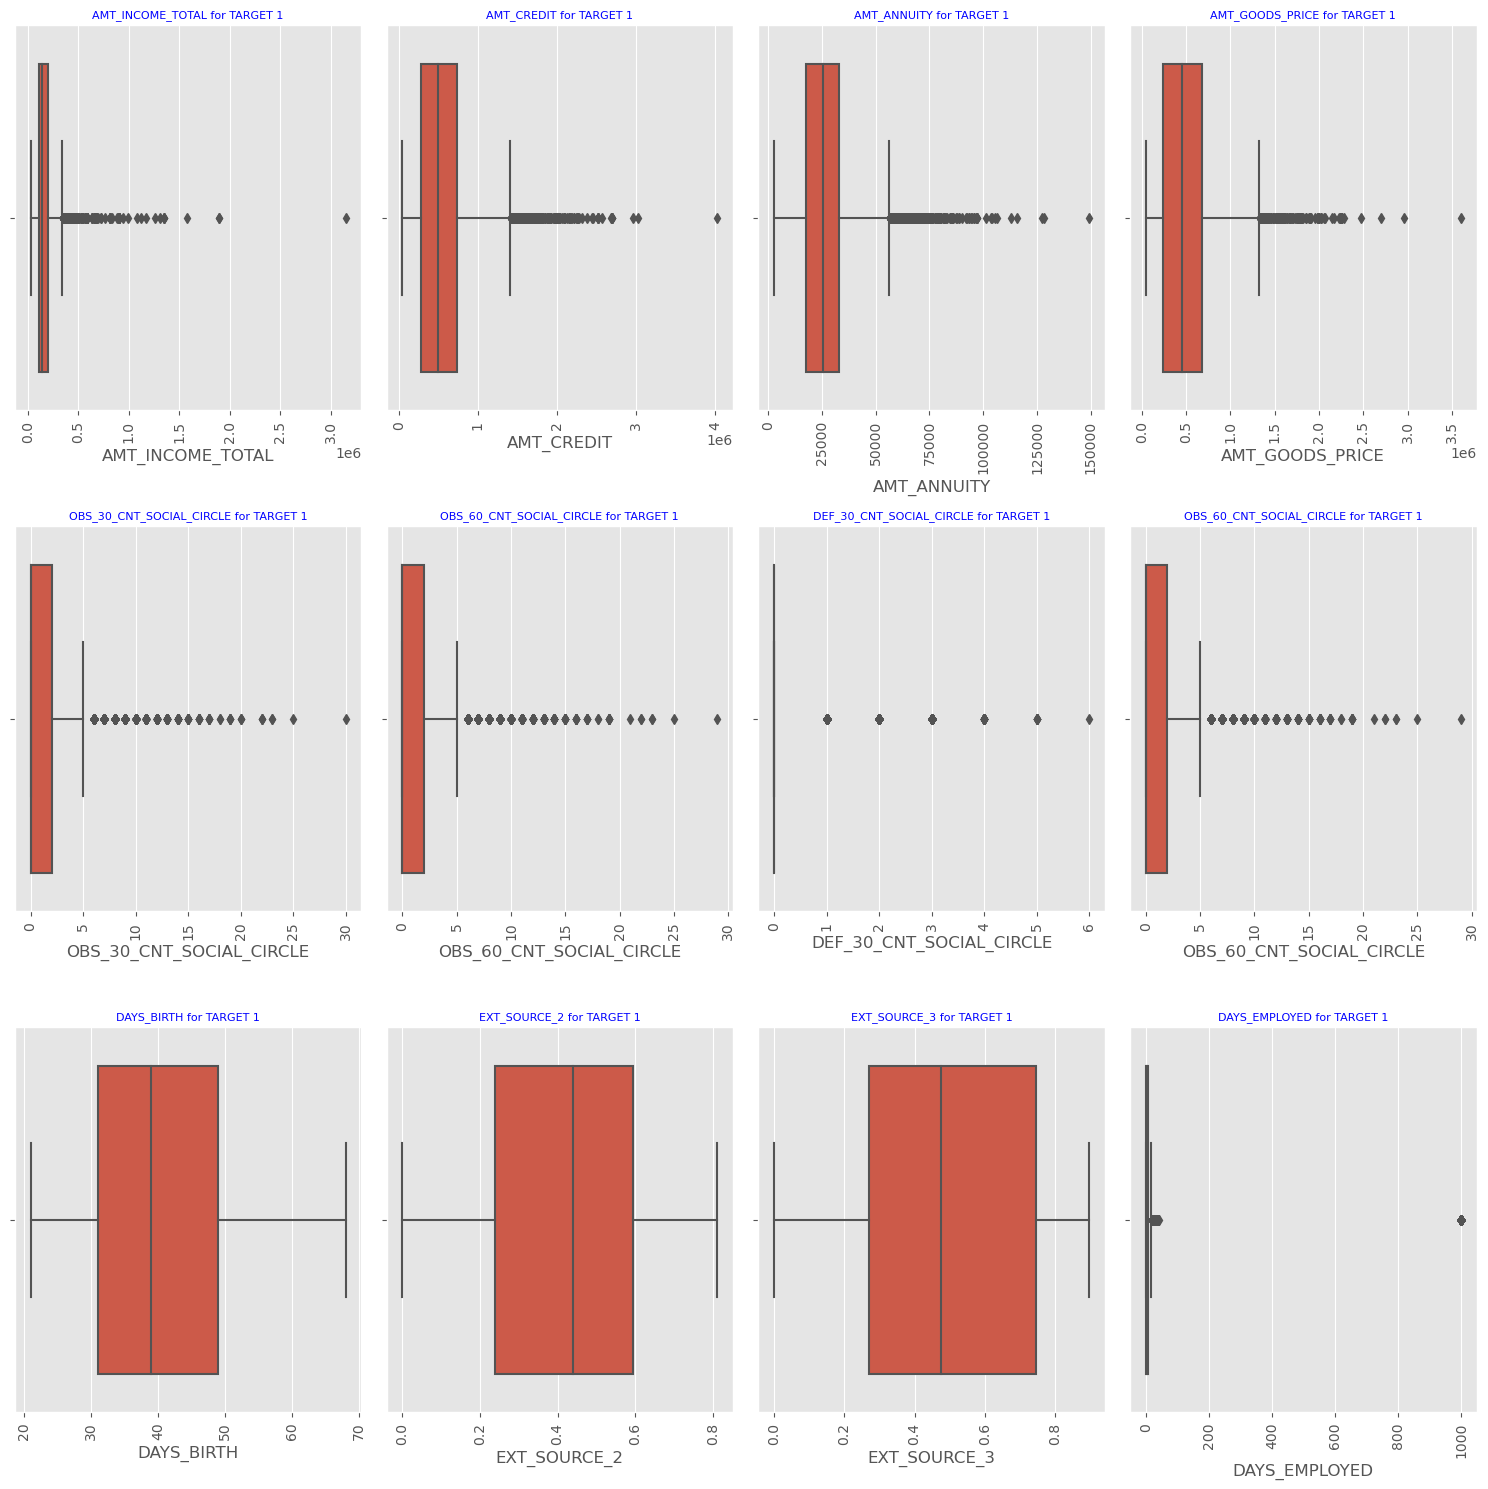

In [120]:
numerical_columns = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DAYS_BIRTH","EXT_SOURCE_2","EXT_SOURCE_3","DAYS_EMPLOYED"]
# Create subplots
fig, axes = plt.subplots(nrows= 3, ncols= 4, figsize=(15,15))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    plt.style.use("ggplot")
    sns.boxplot(x=column, data=Target_data2, ax=axes[i])
    axes[i].set_title(f'{column} for TARGET 1',color = "blue", fontsize = 8)
    axes[i].tick_params(axis='x', rotation=90)
   
plt.tight_layout()
plt.show()

#### Binning income for target 1

In [121]:
Target_data2["income bucket2"] = pd.qcut(Target_data2['AMT_INCOME_TOTAL'], q=[0, 0.25, 0.50, 0.75, 1], labels=["L", "M", "H", "VH"])

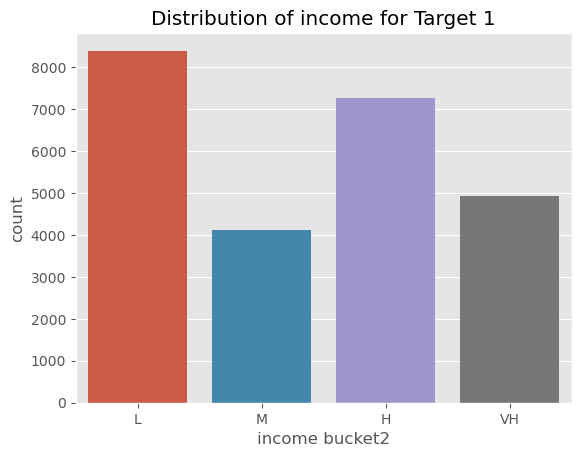

In [122]:
plt.style.use("ggplot")
sns.countplot(x="income bucket2", data=Target_data2)
plt.title("Distribution of income for Target 1")
plt.show()

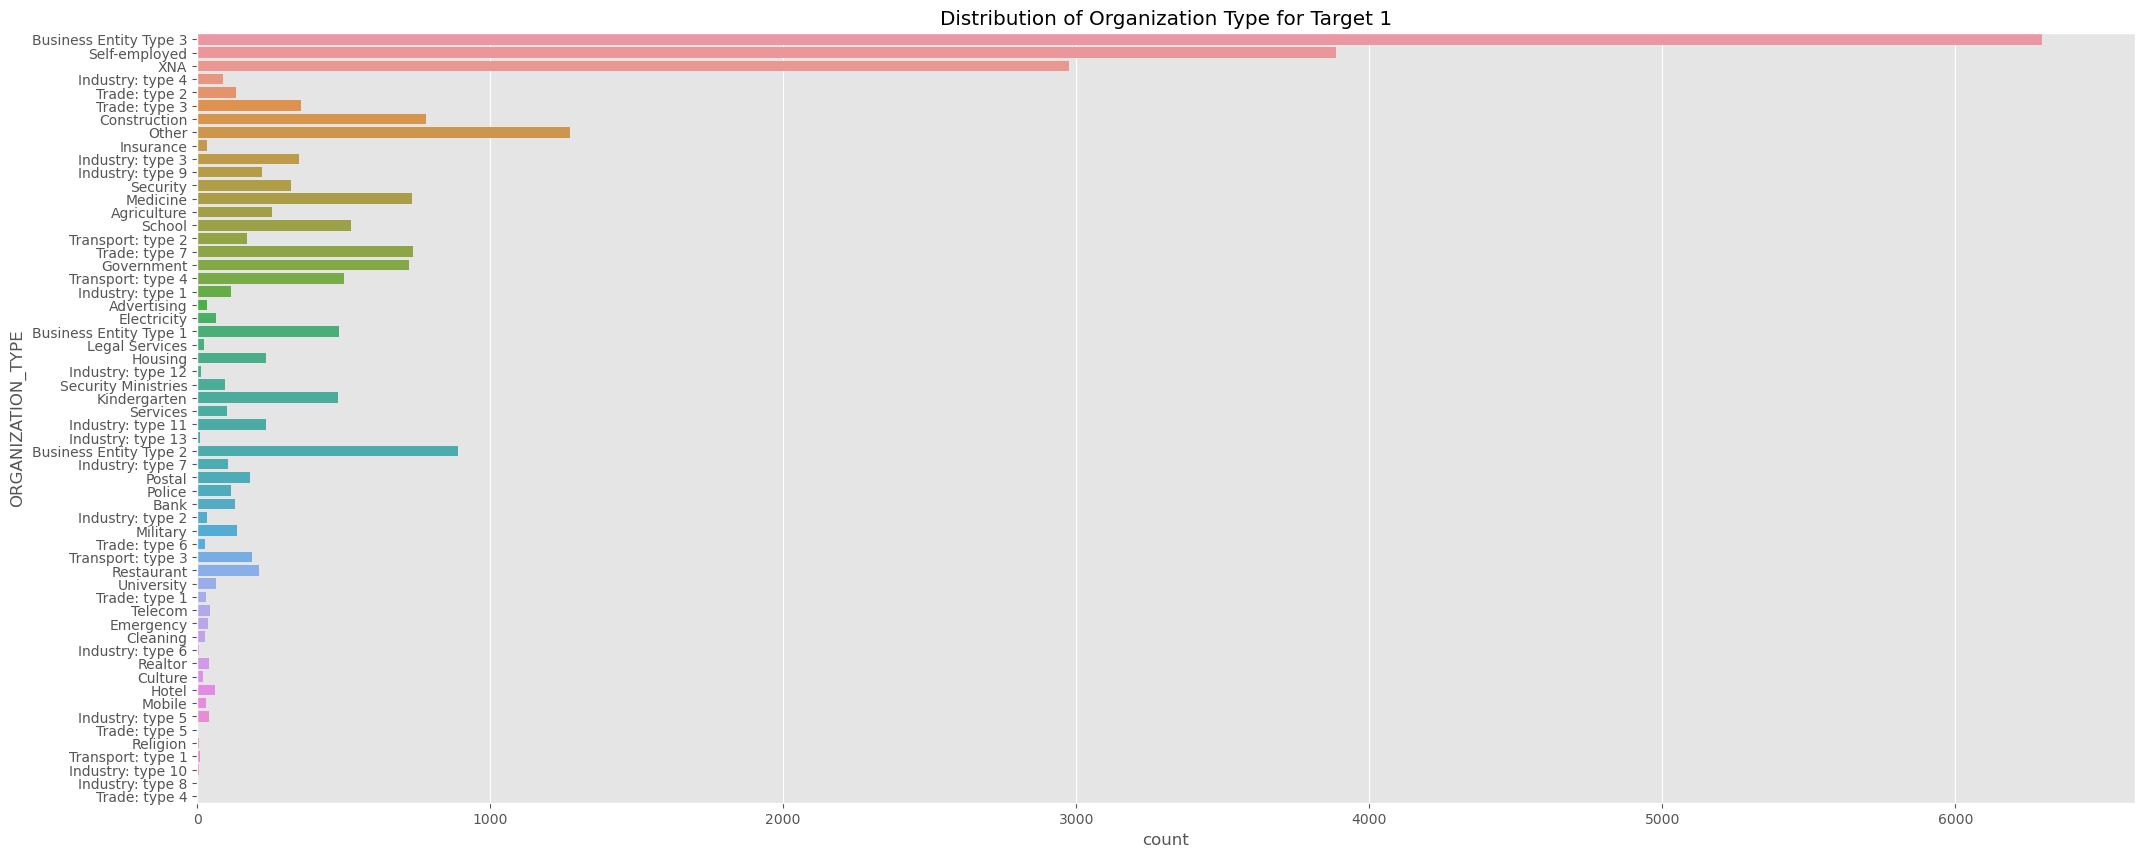

In [123]:
# Checking the distribution of Organization type for Target 1
plt.figure(figsize =(25,10))
plt.style.use("ggplot")
sns.countplot(y="ORGANIZATION_TYPE", data=Target_data2)
plt.title("Distribution of Organization Type for Target 1")
plt.show()

In [124]:
col3 = ["NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","NAME_INCOME_TYPE","CODE_GENDER"]


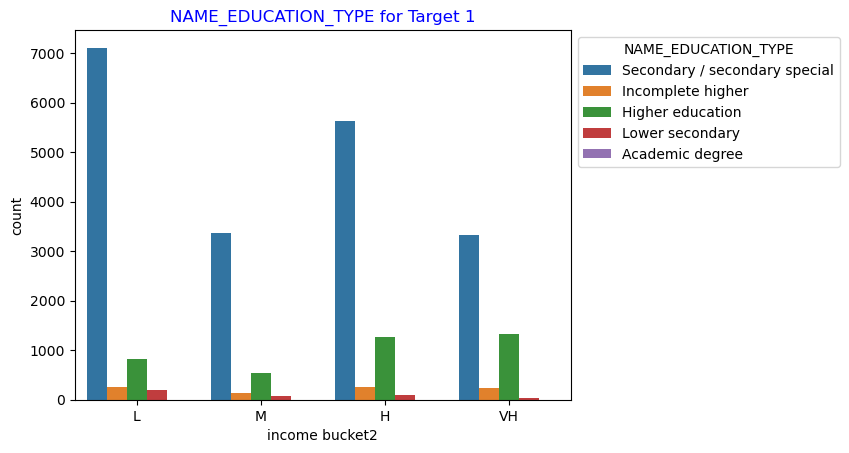

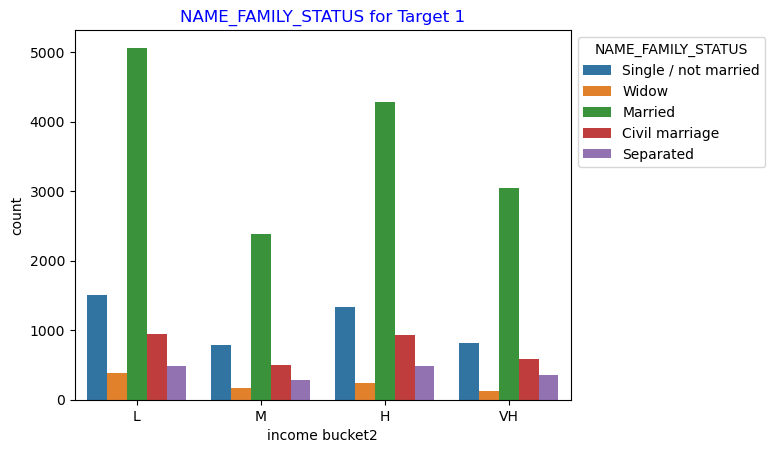

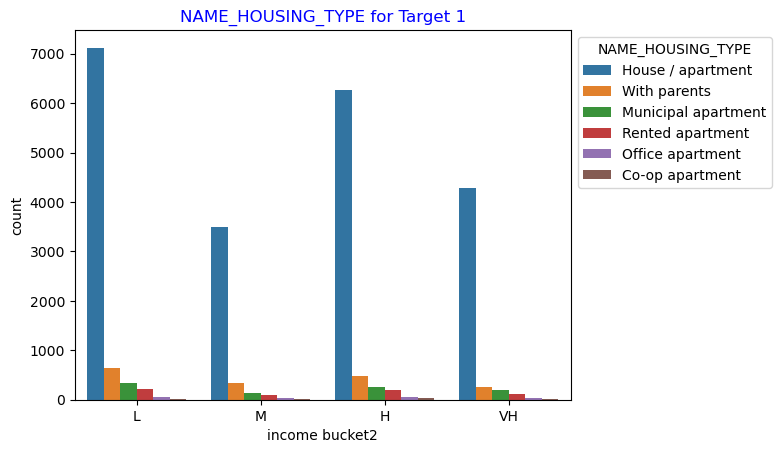

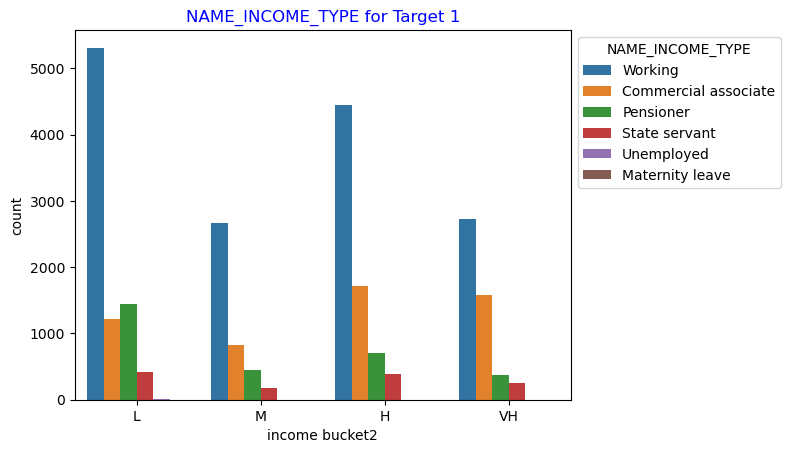

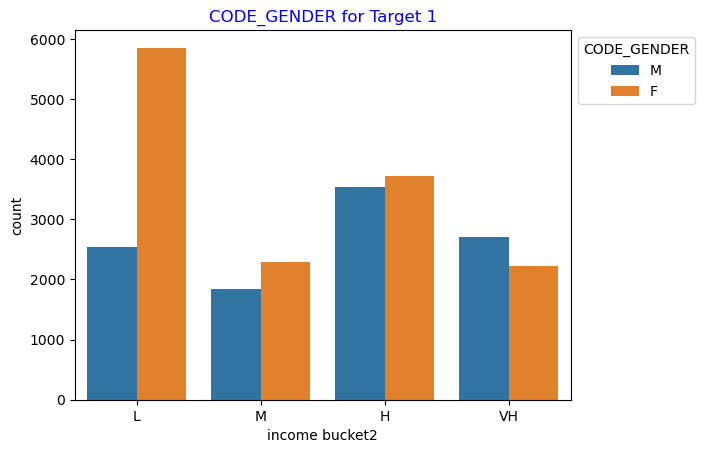

In [125]:
for i in col3:
    plt.style.use("default")
    sns.countplot(x='income bucket2', hue=i , data=Target_data2)
    plt.legend(title= i , loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f"{i} for Target 1", color = "blue")
    plt.show()

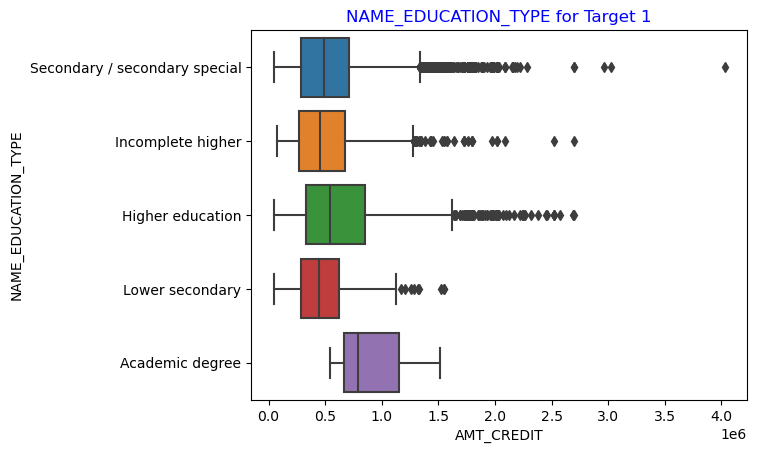

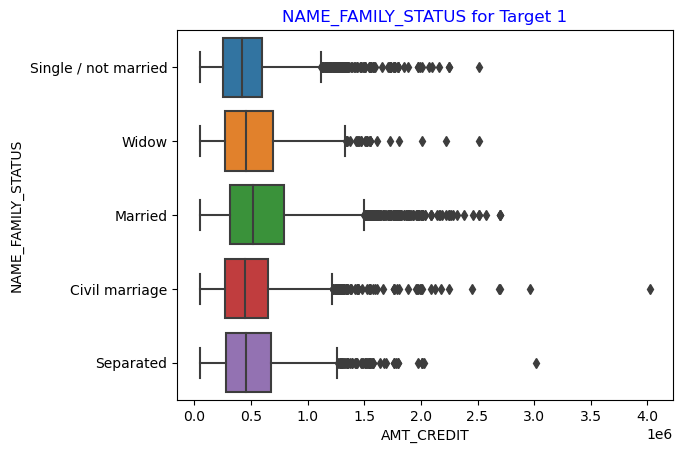

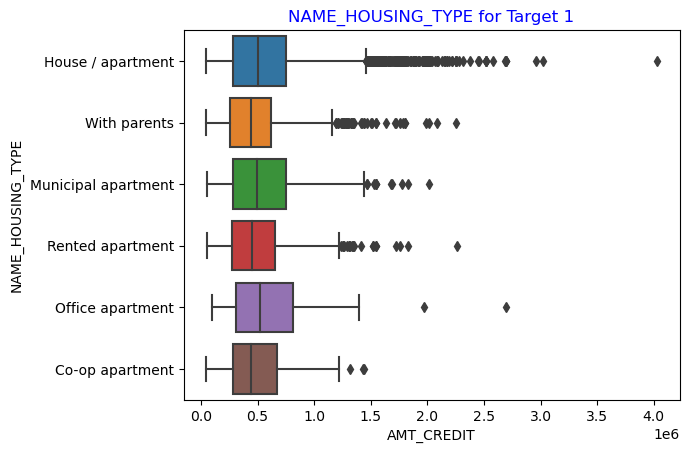

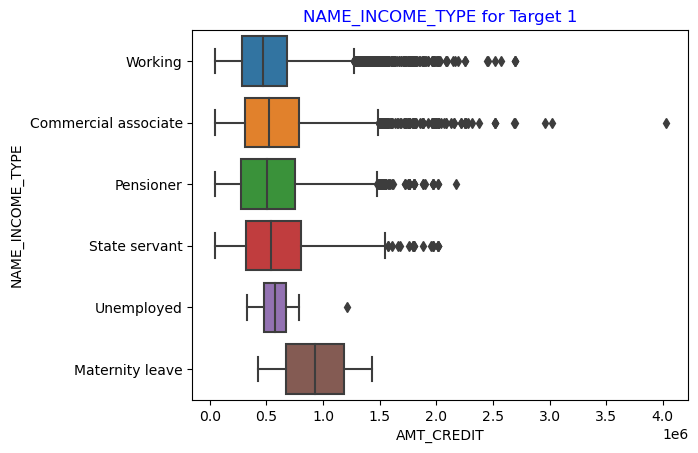

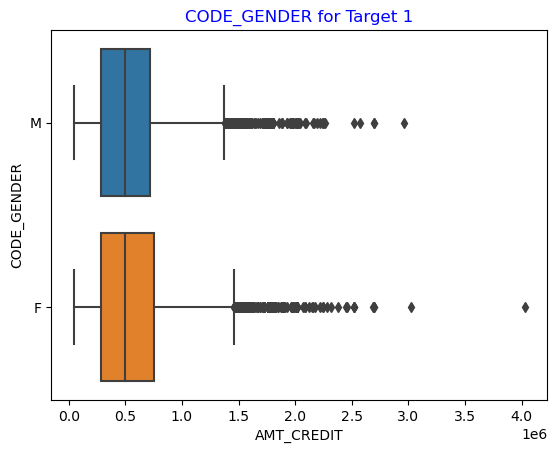

In [126]:
for i in col3:
    sns.boxplot(x='AMT_CREDIT', y= i , data=Target_data2)
    plt.title(f"{i} for Target 1", color = "blue")
    plt.show()


### Top 10 Correlation

In [127]:
res2 = Target_data2[["CNT_CHILDREN","DAYS_BIRTH","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","EXT_SOURCE_2","EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]].corr()

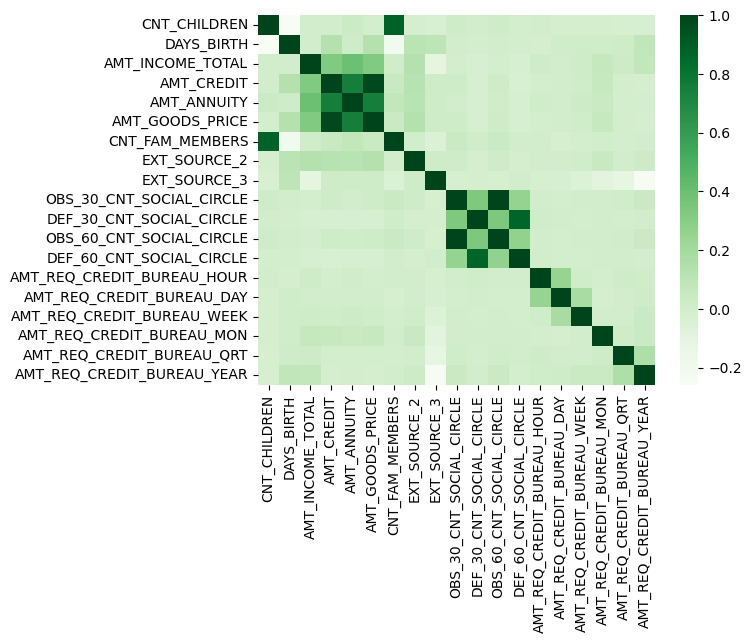

In [128]:
sns.heatmap(res2, cmap = "Greens")
plt.show()

In [129]:
top_correlations_1 = res2.unstack().sort_values(ascending=False).drop_duplicates().iloc[1:11]
print(top_correlations_1)

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998287
AMT_CREDIT                AMT_GOODS_PRICE             0.983070
CNT_FAM_MEMBERS           CNT_CHILDREN                0.885501
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.869782
AMT_GOODS_PRICE           AMT_ANNUITY                 0.752465
AMT_ANNUITY               AMT_CREDIT                  0.751740
                          AMT_INCOME_TOTAL            0.397269
OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.336997
DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.333666
AMT_INCOME_TOTAL          AMT_GOODS_PRICE             0.326146
dtype: float64


## Previous Application

In [130]:
# importing data
prev_app = pd.read_csv("file:///C:/Users/lenovo/Downloads/previous_application.csv")

In [131]:
#Checking the Shape of data
prev_app.shape

(1670214, 37)

## Dropping Null values

In [132]:
# Checking for null values percentage
(prev_app.isnull().sum()/prev_app.shape[0]) * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [133]:
# Dropping all the column having 40% or more than 40% null values
prev_app.drop(["AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","NAME_TYPE_SUITE","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"], axis = 1, inplace = True)

In [134]:
prev_app.shape

(1670214, 26)

In [135]:
prev_app.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START"], axis = 1 , inplace = True)

In [136]:
prev_app.shape

(1670214, 24)

## Checking Columns

In [137]:
(prev_app.CODE_REJECT_REASON.value_counts()/prev_app.shape[0]) * 100

XAP       81.013152
HC        10.491530
LIMIT      3.333705
SCO        2.243245
CLIENT     1.582791
SCOFR      0.767027
XNA        0.313972
VERIF      0.211650
SYSTEM     0.042929
Name: CODE_REJECT_REASON, dtype: float64

In [138]:
prev_app.NAME_CASH_LOAN_PURPOSE.value_counts()


XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [139]:
prev_app.NAME_CONTRACT_STATUS.value_counts()


Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [140]:
prev_app.DAYS_DECISION.value_counts()


-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [141]:
(prev_app.NAME_PAYMENT_TYPE.value_counts()/prev_app.shape[0]) * 100


Cash through the bank                        61.881412
XNA                                          37.563091
Non-cash from your account                    0.490536
Cashless from the account of the employer     0.064962
Name: NAME_PAYMENT_TYPE, dtype: float64

In [142]:
prev_app.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [143]:
(prev_app.NAME_GOODS_CATEGORY.value_counts()/prev_app.shape[0]) * 100

XNA                         56.927376
Mobile                      13.453845
Consumer Electronics         7.279067
Computers                    6.332662
Audio/Video                  5.953788
Furniture                    3.212522
Photo / Cinema Equipment     1.498072
Construction Materials       1.496515
Clothing and Accessories     1.410238
Auto Accessories             0.441919
Jewelry                      0.376598
Homewares                    0.300740
Medical Supplies             0.230090
Vehicles                     0.201771
Sport and Leisure            0.178480
Gardening                    0.159740
Other                        0.152915
Office Appliances            0.139683
Tourism                      0.099329
Medicine                     0.092802
Direct Sales                 0.026703
Fitness                      0.012513
Additional Service           0.007664
Education                    0.006406
Weapon                       0.004610
Insurance                    0.003832
Animals     

In [144]:
(prev_app.NAME_PORTFOLIO.value_counts()/prev_app.shape[0]) * 100

POS      41.372603
Cash     27.634962
XNA      22.286366
Cards     8.680624
Cars      0.025446
Name: NAME_PORTFOLIO, dtype: float64

In [145]:
(prev_app.NAME_PRODUCT_TYPE.value_counts()/prev_app.shape[0]) * 100

XNA        63.684414
x-sell     27.319074
walk-in     8.996512
Name: NAME_PRODUCT_TYPE, dtype: float64

In [146]:
(prev_app.NAME_SELLER_INDUSTRY.value_counts()/prev_app.shape[0]) * 100

XNA                     51.234153
Consumer electronics    23.845148
Connectivity            16.526565
Furniture                3.463568
Construction             1.783065
Clothing                 1.433888
Industry                 1.149194
Auto technology          0.298764
Jewelry                  0.162195
MLM partners             0.072745
Tourism                  0.030715
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [147]:
(prev_app.NAME_YIELD_GROUP.value_counts()/prev_app.shape[0]) * 100

XNA           30.966990
middle        23.082791
high          21.154834
low_normal    19.284655
low_action     5.510731
Name: NAME_YIELD_GROUP, dtype: float64

### XAP, XNA doesnot seem any real data so we treat them as null values drop all those column who have values like XAP, XNA 40% or more than 40%

In [148]:
# Dropping the columns
prev_app.drop(["NAME_SELLER_INDUSTRY","NAME_PRODUCT_TYPE","NAME_GOODS_CATEGORY","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_CASH_LOAN_PURPOSE"],axis = 1, inplace = True)

In [149]:
prev_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_CLIENT_TYPE                    0
NAME_PORTFOLIO                      0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [150]:
prev_app.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [151]:
# Dropping unnecessary columns
prev_app.drop(["FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"],axis = 1, inplace = True)
prev_app.drop(["SELLERPLACE_AREA"],axis = 1, inplace = True)

##### Checking Skewness of columns

In [152]:
a = prev_app.AMT_ANNUITY.skew() 
b = prev_app.AMT_GOODS_PRICE.skew() 
c = prev_app.CNT_PAYMENT.skew()   
print(f" a = {a} \n b = {b} \n c = {c}")

 a = 2.6925715126729455 
 b = 3.0736896781923937 
 c = 1.5314029823509057


#### As we see above this column are highly skewed and this columns are categorical also mode is best statistical measure to use in this case.


In [153]:
# Imputing column with mode
prev_app.AMT_ANNUITY.fillna(prev_app.AMT_ANNUITY.mode()[0],inplace = True)
prev_app.CNT_PAYMENT.fillna(prev_app.CNT_PAYMENT.mode()[0],inplace = True)
prev_app.AMT_GOODS_PRICE.fillna(prev_app.AMT_GOODS_PRICE.mode()[0],inplace = True)


In [154]:
prev_app.isna().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                1
AMT_GOODS_PRICE           0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_CLIENT_TYPE          0
NAME_PORTFOLIO            0
CHANNEL_TYPE              0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION     346
dtype: int64

In [155]:
prev_app1 = prev_app[~(prev_app["PRODUCT_COMBINATION"].isnull() | prev_app["AMT_CREDIT"].isnull())]

In [156]:
prev_app1.isnull().sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY             0
AMT_APPLICATION         0
AMT_CREDIT              0
AMT_GOODS_PRICE         0
NAME_CONTRACT_STATUS    0
DAYS_DECISION           0
NAME_CLIENT_TYPE        0
NAME_PORTFOLIO          0
CHANNEL_TYPE            0
CNT_PAYMENT             0
NAME_YIELD_GROUP        0
PRODUCT_COMBINATION     0
dtype: int64

In [157]:
prev_app1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   SK_ID_PREV            1669867 non-null  int64  
 1   SK_ID_CURR            1669867 non-null  int64  
 2   NAME_CONTRACT_TYPE    1669867 non-null  object 
 3   AMT_ANNUITY           1669867 non-null  float64
 4   AMT_APPLICATION       1669867 non-null  float64
 5   AMT_CREDIT            1669867 non-null  float64
 6   AMT_GOODS_PRICE       1669867 non-null  float64
 7   NAME_CONTRACT_STATUS  1669867 non-null  object 
 8   DAYS_DECISION         1669867 non-null  int64  
 9   NAME_CLIENT_TYPE      1669867 non-null  object 
 10  NAME_PORTFOLIO        1669867 non-null  object 
 11  CHANNEL_TYPE          1669867 non-null  object 
 12  CNT_PAYMENT           1669867 non-null  float64
 13  NAME_YIELD_GROUP      1669867 non-null  object 
 14  PRODUCT_COMBINATION   1669867 non-

In [158]:
prev_app1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0     17145.0          17145.0             Approved            -73   
1    679671.0         607500.0             Approved           -164   
2    136444.5         112500.0             Approved           -301   
3    470790.0         450000.0             Approved           -512   
4    404055.0         337500.0              Refused           -781   

  NAME_CLIENT_TYPE NAME_PORTFOLIO             CHANNEL_TYPE  CNT_PAYMENT  \
0         Repeater            POS             Country-wide         12.0   
1         Repeater           Cash           Contact center         36.0   
2         Repeater           Cash  Credit and cash offices         12.0   
3         Repeater           Cash  Credit and cash offices         12.0   
4         Repeater           Cash  Credit and cash offices         24.0   

  NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0           middle  POS mobile with interest  
1       low_action          Cash X-Sell: low  
2             high         Cash X-Sell: high  
3           middle       Cash X-Sell: middle  
4             high         Cash Street: high

### Univariate Analysis

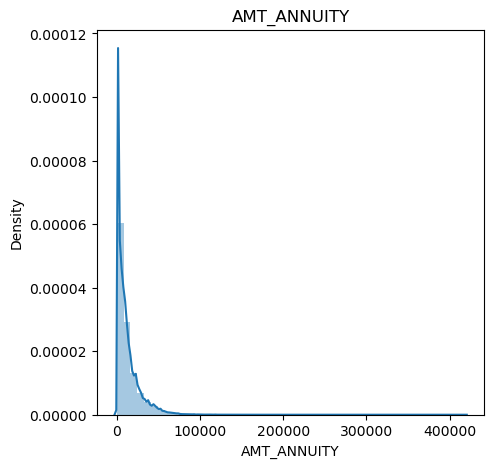

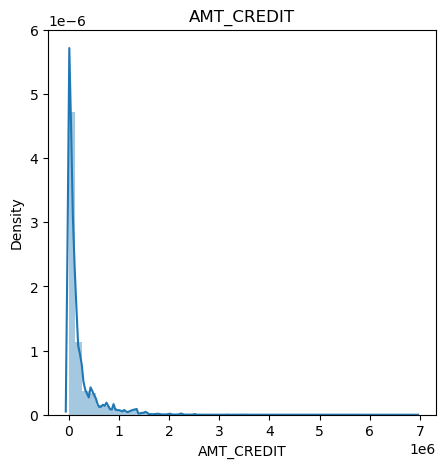

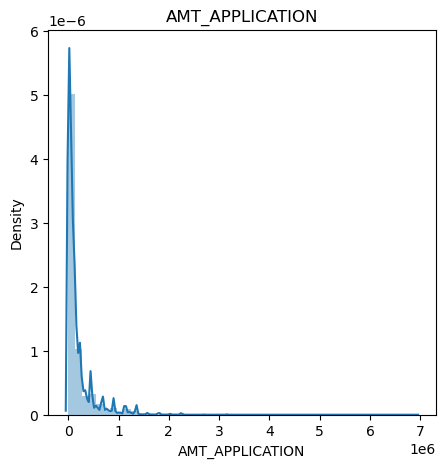

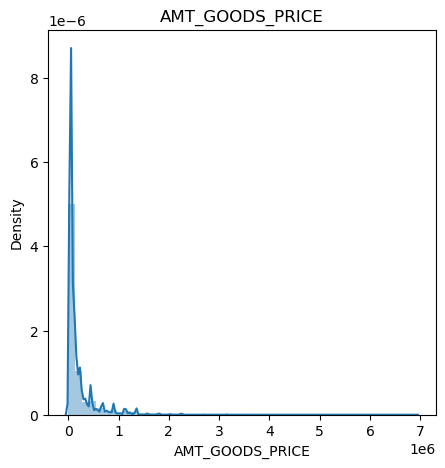

In [159]:
# checking all the numerical columns
col_1 = ["AMT_ANNUITY","AMT_CREDIT","AMT_APPLICATION","AMT_GOODS_PRICE"]
for i in col_1:
    plt.figure(figsize = (5,5))
    sns.distplot(x = prev_app1[i])
    plt.title(f'{i}')
    plt.xlabel(i)
    plt.show()

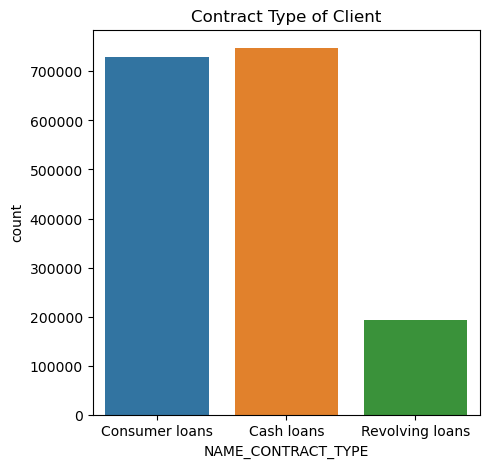

In [160]:
plt.figure(figsize = (5,5))
sns.countplot(x = "NAME_CONTRACT_TYPE" , data = prev_app1)
plt.title("Contract Type of Client")
plt.show()

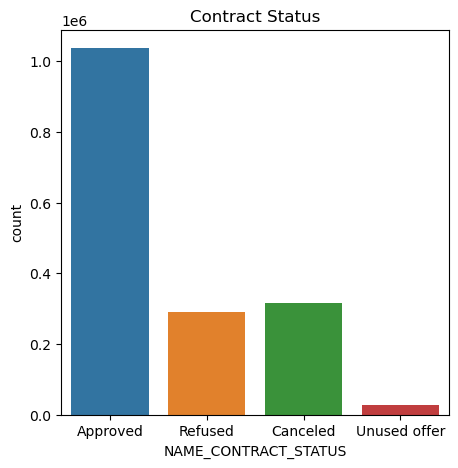

In [161]:
plt.figure(figsize = (5,5))
sns.countplot(x = "NAME_CONTRACT_STATUS" , data = prev_app1)
plt.title("Contract Status")
plt.show()

<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

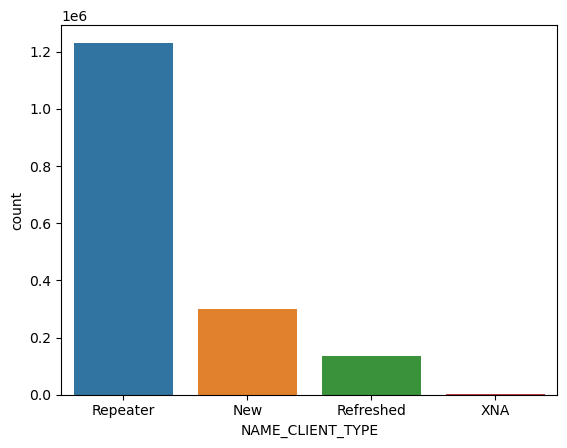

In [162]:
sns.countplot(x = "NAME_CLIENT_TYPE" , data = prev_app1)

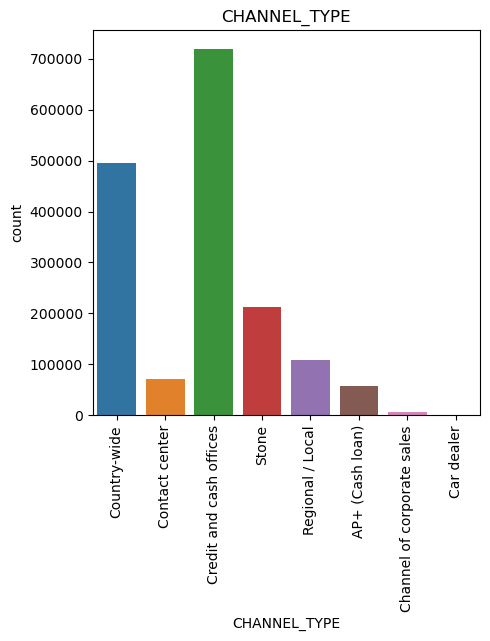

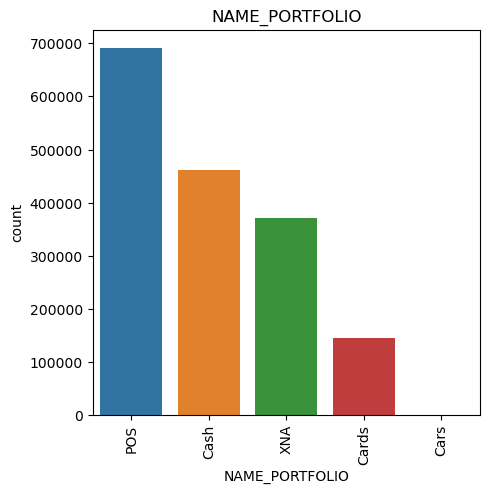

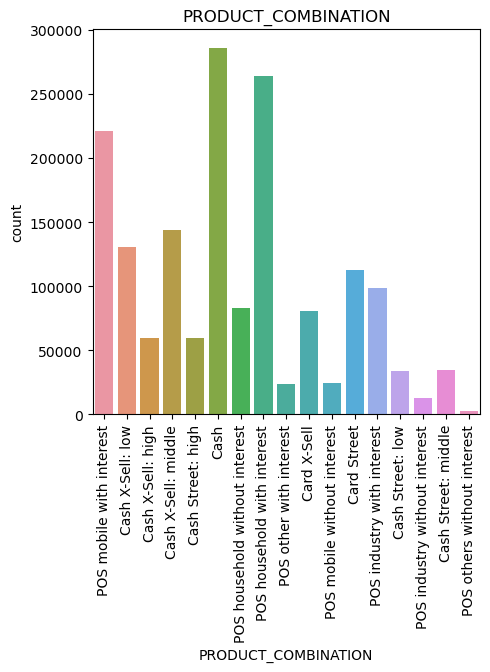

In [163]:
col_1 = ["CHANNEL_TYPE","NAME_PORTFOLIO","PRODUCT_COMBINATION"]
for i in col_1:
    plt.figure(figsize = (5,5))
    sns.countplot(x = prev_app1[i], data = prev_app1)
    plt.title(f'{i}')
    plt.xticks(rotation = 90)
    plt.show()

In [164]:
# In NAME_PORTFOLIO column there is lot of null values. We can impute null values with mode and mode is POS we can see it clearly from above countplot
prev_app1.NAME_PORTFOLIO = prev_app1.NAME_PORTFOLIO.str.replace("XNA","POS")

In [165]:
prev_app1.NAME_PORTFOLIO.value_counts()

POS      1062895
Cash      461563
Cards     144984
Cars         425
Name: NAME_PORTFOLIO, dtype: int64

In [166]:
# This colums are seem irrelevant so dropping this column
prev_app1.drop(["NAME_YIELD_GROUP"],axis = 1, inplace = True)
prev_app1.drop(["CNT_PAYMENT"],axis = 1, inplace = True)

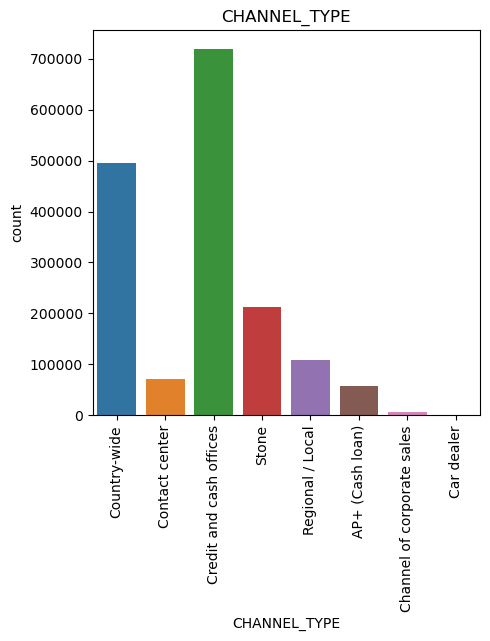

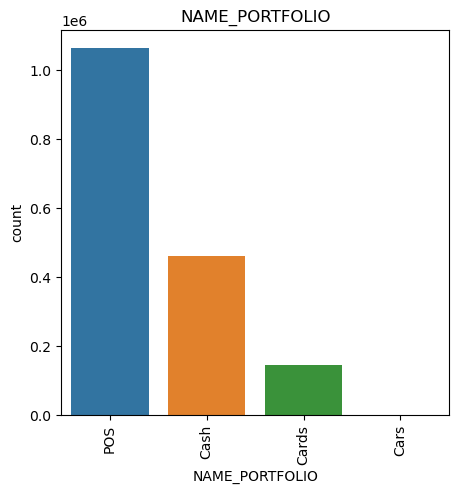

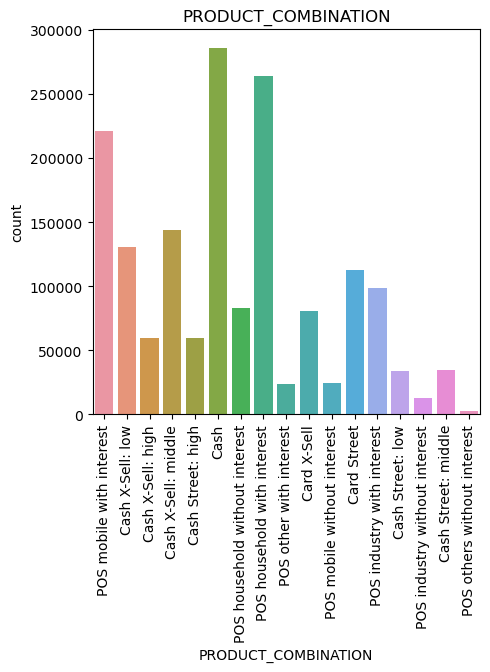

In [167]:
col_1 = ["CHANNEL_TYPE","NAME_PORTFOLIO","PRODUCT_COMBINATION"]
for i in col_1:
    plt.figure(figsize = (5,5))
    sns.countplot(x = prev_app1[i], data = prev_app1)
    plt.title(f'{i}')
    plt.xticks(rotation = 90)
    plt.show()

### What we infer from univariate analysis
- The majority of clients having annuities ranging from 0 to 100,000.
- Most clients hold credit amounts falling within the 0 to 10,00,000 range.
- A significant portion of clients are repeat customers.

### Bivariate Analysis and Multivariate Analysis

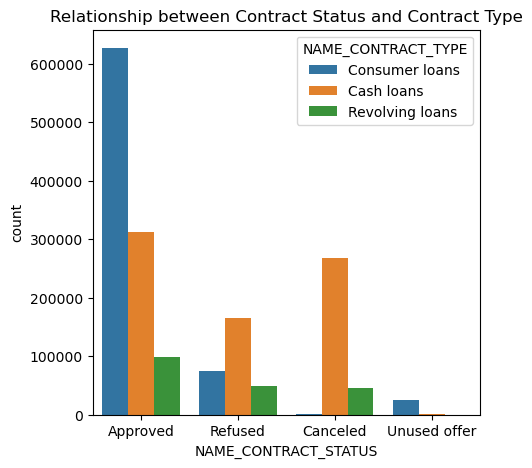

In [168]:
# Find Relationship between Contract Status and Contract Type
plt.style.use("default")
plt.figure(figsize = (5,5))
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_CONTRACT_TYPE", data = prev_app1)
plt.title("Relationship between Contract Status and Contract Type")
plt.show()

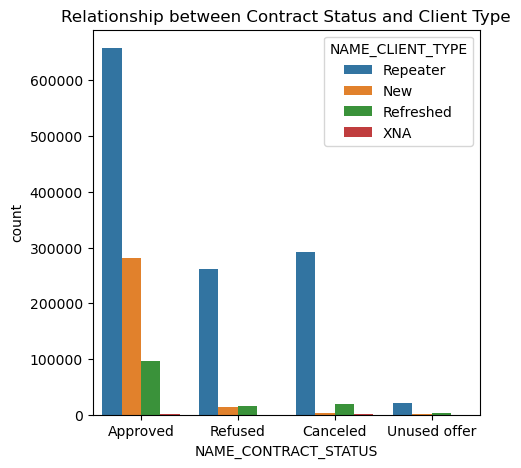

In [169]:
# Find Relationship between Contract Status and Client Type
plt.style.use("default")
plt.figure(figsize = (5,5))
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_CLIENT_TYPE", data = prev_app1)
plt.title("Relationship between Contract Status and Client Type")
plt.show()

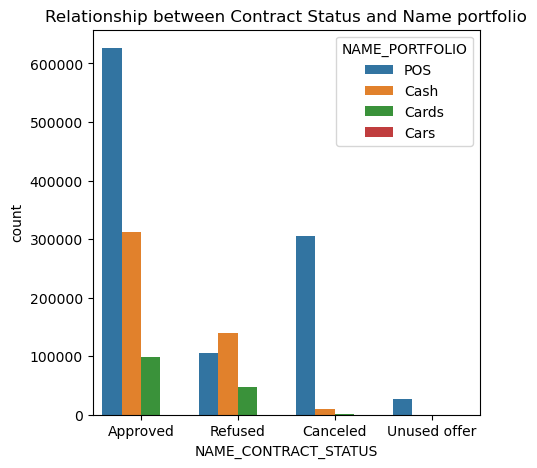

In [170]:
# Find Relationship between Contract Status and Name portfolio
plt.style.use("default")
plt.figure(figsize = (5,5))
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = "NAME_PORTFOLIO", data = prev_app1)
plt.title("Relationship between Contract Status and Name portfolio")
plt.show()


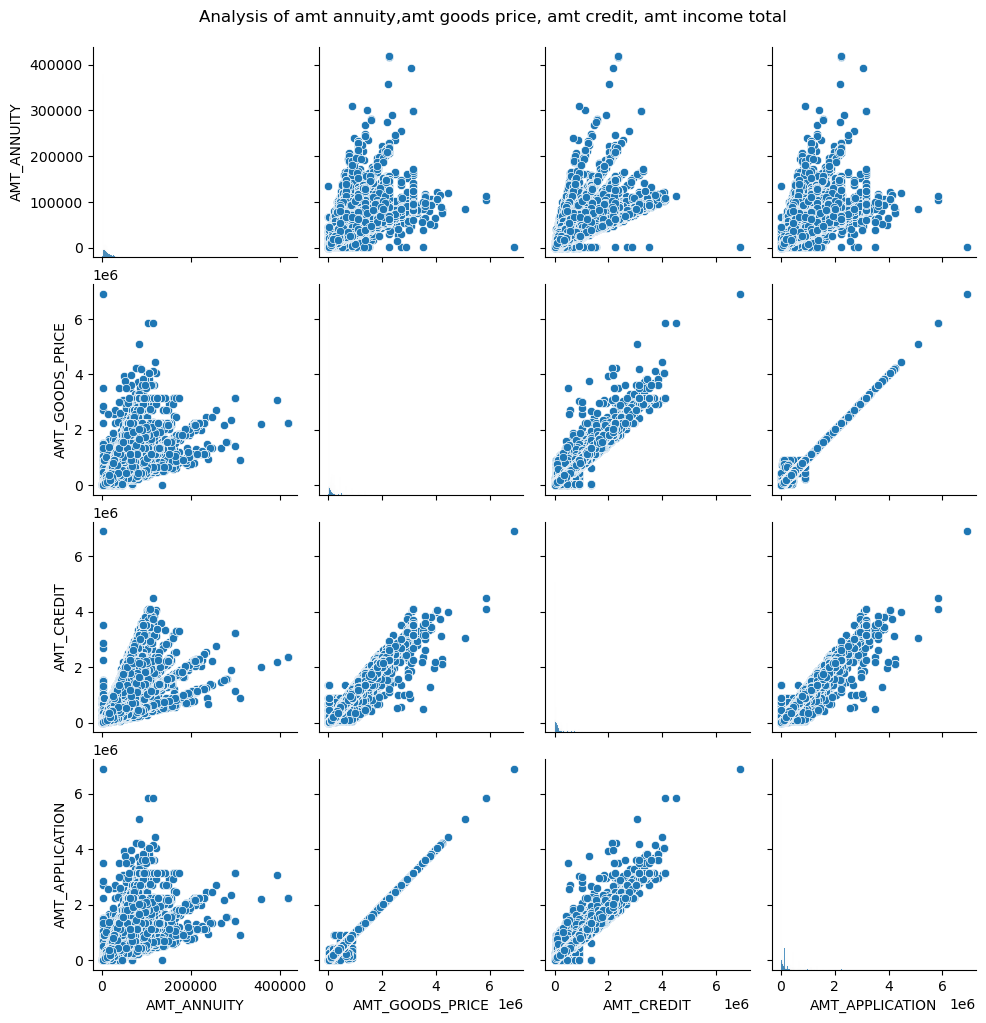

In [171]:
# analysis of all numerical column in the dataset
sns.pairplot(data = prev_app1, vars = ["AMT_ANNUITY","AMT_GOODS_PRICE","AMT_CREDIT","AMT_APPLICATION"])
plt.suptitle("Analysis of amt annuity,amt goods price, amt credit, amt income total", y=1.02)
plt.show()

In [172]:
# Checking the correlaton between this column
prev_app1[["AMT_ANNUITY","AMT_GOODS_PRICE","AMT_CREDIT","AMT_APPLICATION"]].corr()

AMT_ANNUITY  AMT_GOODS_PRICE  AMT_CREDIT  AMT_APPLICATION
AMT_ANNUITY         1.000000         0.820109    0.835383         0.827021
AMT_GOODS_PRICE     0.820109         1.000000    0.976989         0.997949
AMT_CREDIT          0.835383         0.976989    1.000000         0.975822
AMT_APPLICATION     0.827021         0.997949    0.975822         1.000000

#### All the columns["AMT_ANNUITY","AMT_GOODS_PRICE","AMT_CREDIT","AMT_APPLICATION"] have strong positive linear correlation with each other which is evident in above pair plot

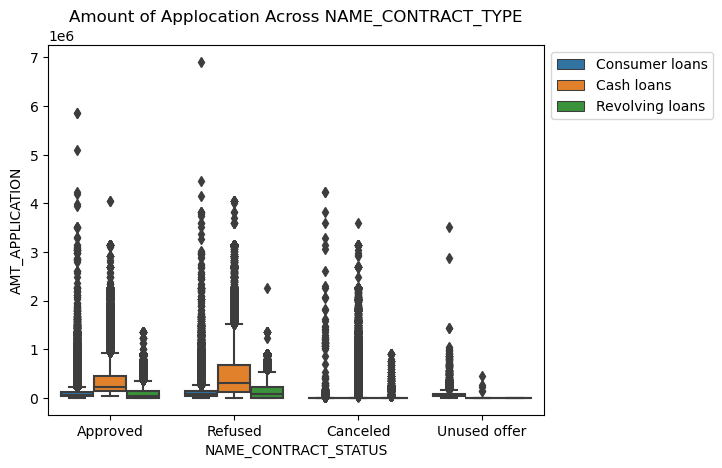

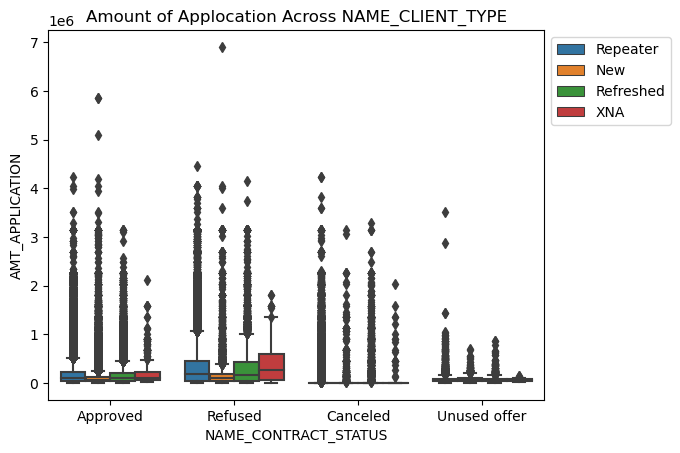

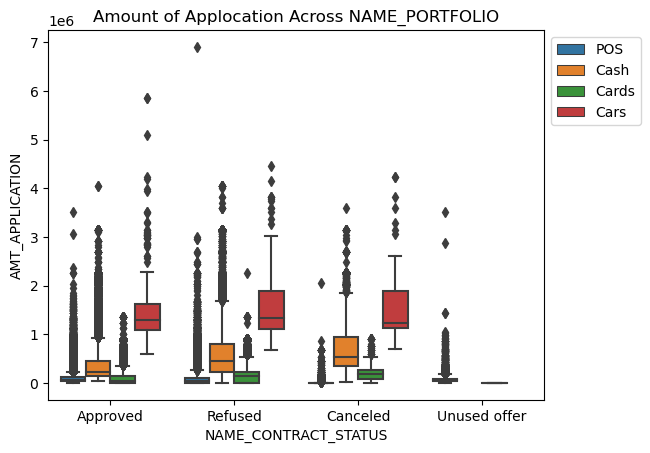

In [195]:
col_5 = ["NAME_CONTRACT_TYPE","NAME_CLIENT_TYPE","NAME_PORTFOLIO"]
for i in col_5:
    sns.boxplot(data= prev_app1, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION', hue= i)
    plt.title(f'Amount of Applocation Across {i}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


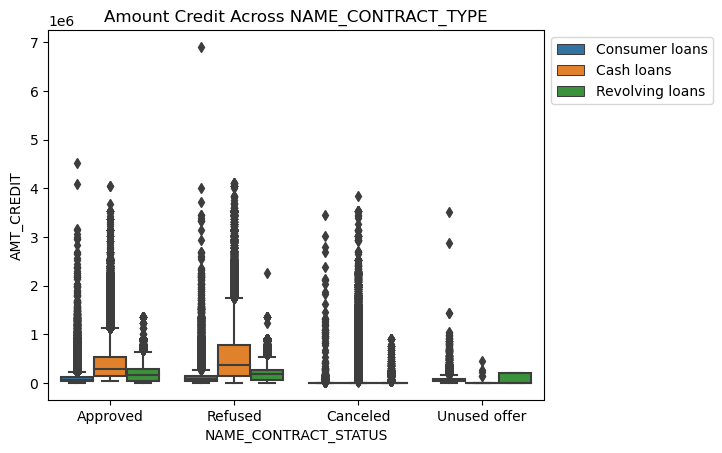

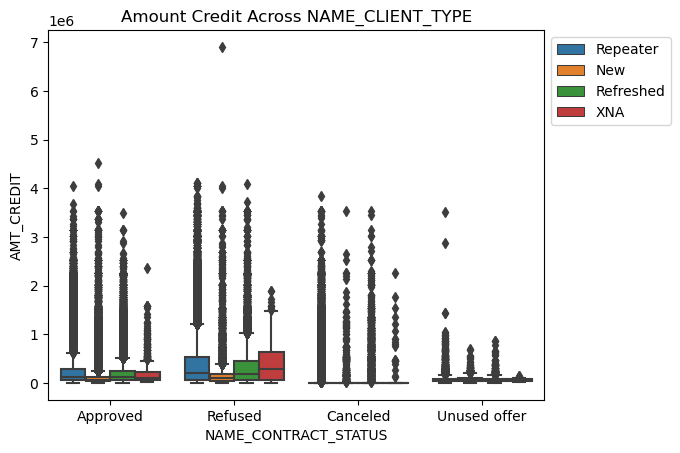

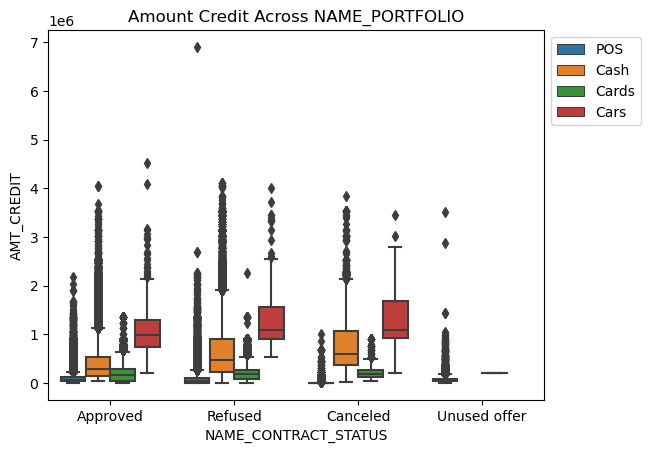

In [174]:
col_5 = ["NAME_CONTRACT_TYPE","NAME_CLIENT_TYPE","NAME_PORTFOLIO"]
for i in col_5:
    sns.boxplot(data= prev_app1, x='NAME_CONTRACT_STATUS', y='AMT_CREDIT', hue= i)
    plt.title(f'Amount Credit Across {i}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


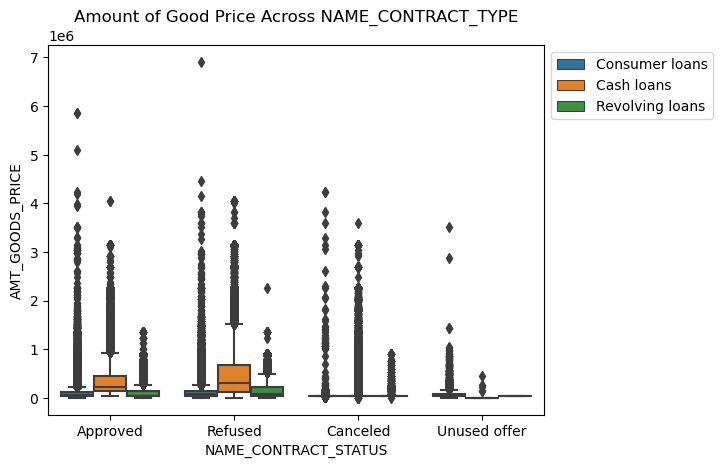

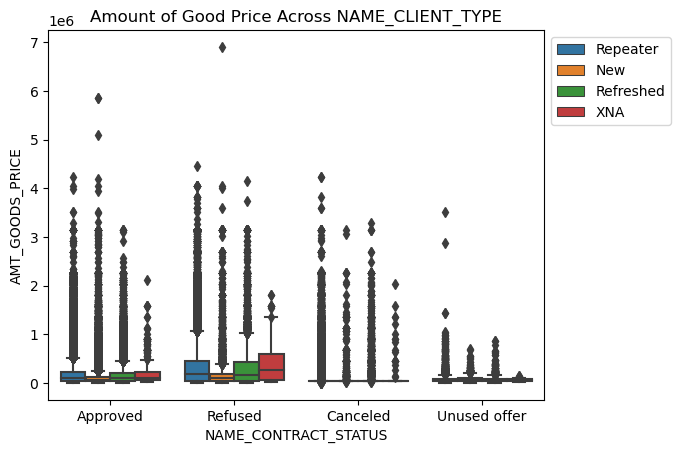

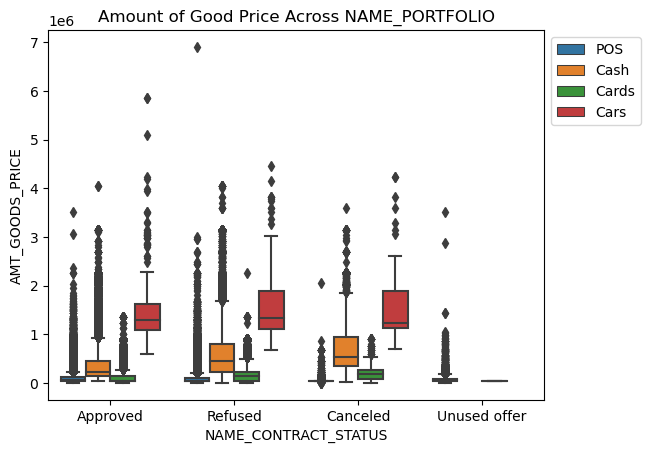

In [175]:
col_5 = ["NAME_CONTRACT_TYPE","NAME_CLIENT_TYPE","NAME_PORTFOLIO"]
for i in col_5:
    sns.boxplot(data= prev_app1, x='NAME_CONTRACT_STATUS', y='AMT_GOODS_PRICE', hue= i)
    plt.title(f'Amount of Good Price Across {i}')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()


### Top Correlation

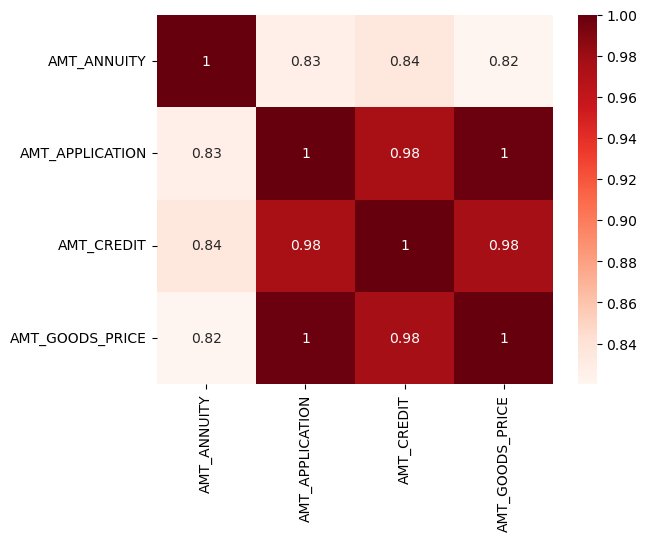

In [176]:
res = prev_app1[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]].corr()
sns.heatmap(res, annot = True, cmap = "Reds")
plt.show()

## What we infer from multivariate analysis
- The majority of consumer loans are approval.
- A considerable number of cash loans face rejection.
- A significant portion of cash loans are canceled.
- The majority of repeat loans are approved.
- Individuals seeking cash loans with higher credit amounts are more likely to face rejection.
- Applicants requesting loans for cars are experiencing refusals.





## Combining two dataframes

In [177]:
# combning the two dataframes
comb_df = data1.merge(prev_app1, how = "left", on = "SK_ID_CURR" )

In [178]:
comb_df.shape

(1423820, 60)

In [179]:
comb_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0          25              1                  9                5   
1          45              3                  3                0   
2          45              3                  3                0   
3          45              3                  3                0   
4          52              0                 11                6   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            1                     MONDAY   
3                            1                     MONDAY   
4                            2                     MONDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                       11                           0   
3                       11                           0   
4                        9                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0   

### Dividing the data between defaulters and non defaulters

In [180]:
Target_0 = comb_df[comb_df["TARGET"] == 0]

In [181]:
Target_1 = comb_df[comb_df["TARGET"] == 1]

In [182]:
Target_0.NAME_CONTRACT_STATUS.value_counts(normalize = True) *100

Approved        63.421579
Canceled        18.245513
Refused         16.715081
Unused offer     1.617827
Name: NAME_CONTRACT_STATUS, dtype: float64

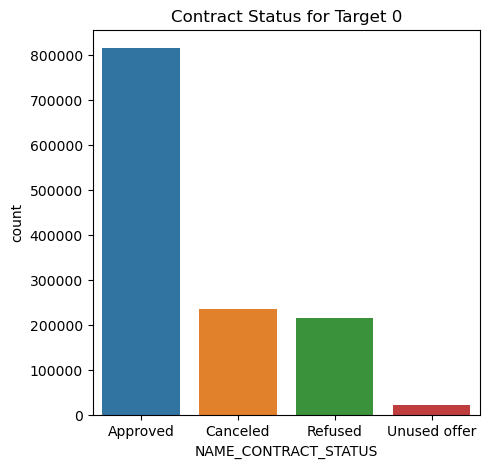

In [183]:
plt.figure(figsize = (5,5))
sns.countplot(x = "NAME_CONTRACT_STATUS" ,data = Target_0)
plt.title("Contract Status for Target 0")
plt.show()

In [184]:
Target_1.NAME_CONTRACT_STATUS.value_counts(normalize = True) *100

Approved        54.990439
Refused         24.035029
Canceled        19.440592
Unused offer     1.533941
Name: NAME_CONTRACT_STATUS, dtype: float64

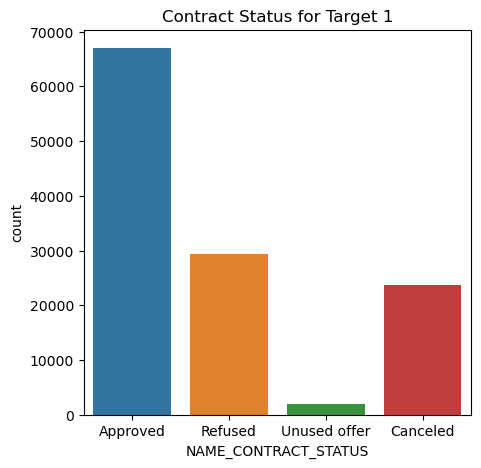

In [185]:
plt.figure(figsize = (5,5))
sns.countplot(x = "NAME_CONTRACT_STATUS" ,data = Target_1)
plt.title("Contract Status for Target 1")
plt.show()

In [186]:
comb_df.drop(["AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR",'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_9'], axis = 1, inplace = True)

In [187]:
comb_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'age_bucket',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'PRODUCT_COMBINATION'],
      dtype='object')

In [188]:
Target_1_Approved = Target_1[Target_1["NAME_CONTRACT_STATUS"] == "Approved"]

In [189]:
Target_1_Approved.shape

(67002, 60)

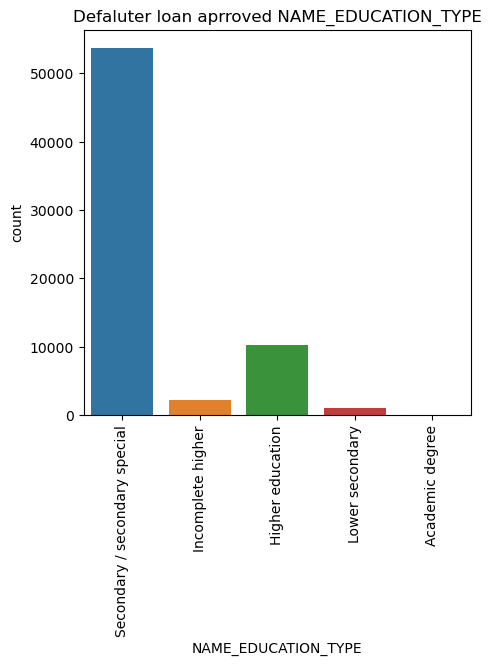

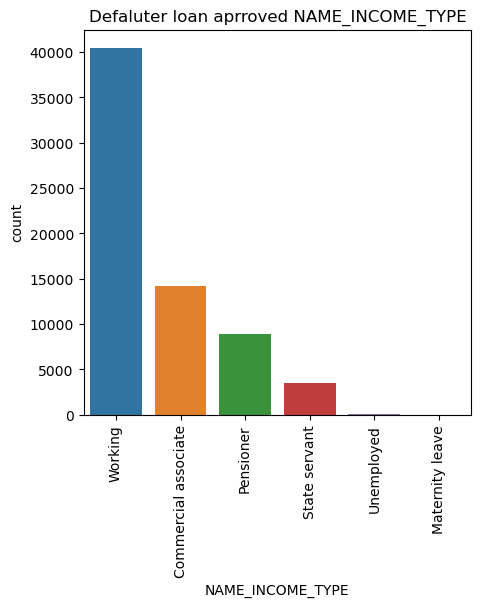

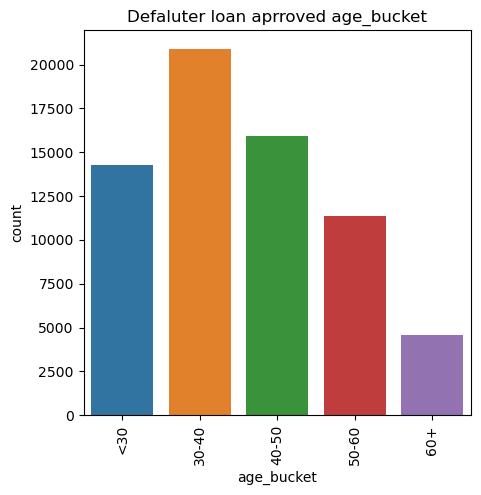

In [190]:
col_6 = ["NAME_EDUCATION_TYPE","NAME_INCOME_TYPE","age_bucket"]
for i in col_6:
    plt.figure(figsize =(5,5))
    sns.countplot(x = i, data = Target_1_Approved)
    plt.title(f"Defaluter loan aprroved {i}")
    plt.xticks(rotation = 90)
    plt.show()

In [191]:
res = Target_1.pivot_table(index = "OCCUPATION_TYPE", columns = "NAME_CONTRACT_STATUS", values = "AMT_CREDIT_x" )

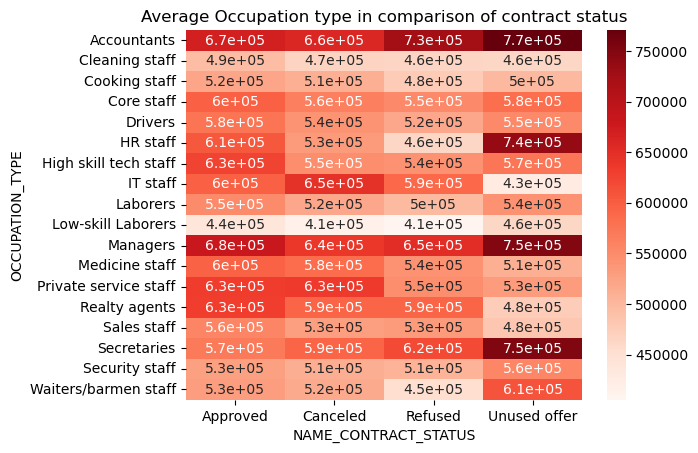

In [194]:
sns.heatmap(res,annot = True, cmap = "Reds")
plt.title("Average Occupation type in comparison of contract status")
plt.show()

## What we infer from combined dataframe
- 54.99% of loan are approved in case of defaulters
- education types secondary special have hgher rate of loan approved
- Working professional have higher rate of loan approved
- age group 30 -40 higher rate of loan approved
- Managers tend to request larger credit amounts but have a higher incidence of defaulting on loan payments.


## Final conclusion

- females are applying more for loans in compared to men
- age group between 30 to 40 are applying more for loans.
- married peoples are applying for more loan
- Individuals who apply for multiple loans typically have a family size of two and do not have any children.

##### From above all the conclusion ***
- probably Newly Married people age group between 30 to 40 are applying more for loan and having no child.